<a href="https://colab.research.google.com/github/ArthAgrawal/Deepfake-Audio-Detection/blob/main/Deepfake_Audio_Project_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install audiomentations

In [ ]:
import os
import matplotlib.pyplot as plt

directories = {
    'Bonafide': '/content/drive/MyDrive/ASV_Dataset/Bonafide',
    'Spoof-A01': '/content/drive/MyDrive/ASV_Dataset/Spoof/A01',
    'Spoof-A02': '/content/drive/MyDrive/ASV_Dataset/Spoof/A02',
    'Spoof-A03': '/content/drive/MyDrive/ASV_Dataset/Spoof/A03',
    'Spoof-A04': '/content/drive/MyDrive/ASV_Dataset/Spoof/A04',
    'Spoof-A05': '/content/drive/MyDrive/ASV_Dataset/Spoof/A05',
    'Spoof-A06': '/content/drive/MyDrive/ASV_Dataset/Spoof/A06',
}

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import librosa
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Defining audio augmentation pipeline
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),
])

def augment_audio(y, sr):
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    print("Augmentations applied.")
    return augmented_y


# Converting audio to Mel spectrogram
def audio_to_mel_spectrogram(file_path, sr=11000, n_mels=256, max_time_frames=256, apply_augmentation=True):

    try:
        y, original_sr = librosa.load(file_path, sr=sr)

        if apply_augmentation:
            y = augment_audio(y, sr)
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

        if mel_spectrogram.shape[1] > max_time_frames:
            mel_spectrogram = mel_spectrogram[:, :max_time_frames]
        else:
            pad_width = max_time_frames - mel_spectrogram.shape[1]
            mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')

        return mel_spectrogram
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

def load_data_from_folders(folders, labels, sr=11000, n_mels=256, max_time_frames=256, apply_augmentation=True):

    X, y = [], []
    for folder, label in zip(folders, labels):
        print(f"Processing {folder}...")
        files = os.listdir(folder)

        for file in tqdm(files):
            file_path = os.path.join(folder, file)
            mel_spectrogram = audio_to_mel_spectrogram(
                file_path, sr, n_mels, max_time_frames, apply_augmentation
            )
            if mel_spectrogram is not None:
                X.append(mel_spectrogram)
                y.append(label)
    return np.array(X), np.array(y)

bonafide_folder = '/content/drive/MyDrive/ASV_Dataset/Bonafide'
spoof_base_folder = '/content/drive/MyDrive/ASV_Dataset/Spoof'
spoof_classes = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

folders = [bonafide_folder] + [
    os.path.join(spoof_base_folder, spoof_class) for spoof_class in spoof_classes
]
labels = [0] + [i + 1 for i in range(len(spoof_classes))]

X, y = load_data_from_folders(folders, labels)

print(f"Loaded {len(X)} samples.")
print(f"Shape of feature data: {X.shape}, Shape of labels: {y.shape}")

Processing /content/drive/MyDrive/ASV_Dataset/Bonafide...


  0%|          | 0/2580 [00:00<?, ?it/s]

Augmentations applied.


  0%|          | 2/2580 [00:14<4:30:41,  6.30s/it]

Augmentations applied.


  0%|          | 3/2580 [00:15<2:45:08,  3.84s/it]

Augmentations applied.


  0%|          | 4/2580 [00:16<1:54:53,  2.68s/it]

Augmentations applied.


  0%|          | 5/2580 [00:17<1:26:07,  2.01s/it]

Augmentations applied.


  0%|          | 6/2580 [00:18<1:08:37,  1.60s/it]

Augmentations applied.


  0%|          | 7/2580 [00:19<57:55,  1.35s/it]  

Augmentations applied.


  0%|          | 8/2580 [00:20<52:22,  1.22s/it]

Augmentations applied.


  0%|          | 9/2580 [00:21<48:12,  1.13s/it]

Augmentations applied.


  0%|          | 10/2580 [00:21<45:13,  1.06s/it]

Augmentations applied.


  0%|          | 11/2580 [00:22<42:25,  1.01it/s]

Augmentations applied.


  0%|          | 12/2580 [00:23<40:36,  1.05it/s]

Augmentations applied.


  1%|          | 13/2580 [00:24<39:04,  1.09it/s]

Augmentations applied.


  1%|          | 14/2580 [00:25<35:25,  1.21it/s]

Augmentations applied.


  1%|          | 15/2580 [00:25<35:12,  1.21it/s]

Augmentations applied.


  1%|          | 16/2580 [00:26<32:04,  1.33it/s]

Augmentations applied.


  1%|          | 17/2580 [00:27<31:37,  1.35it/s]

Augmentations applied.


  1%|          | 18/2580 [00:27<30:50,  1.38it/s]

Augmentations applied.


  1%|          | 19/2580 [00:28<31:53,  1.34it/s]

Augmentations applied.


  1%|          | 20/2580 [00:29<35:22,  1.21it/s]

Augmentations applied.


  1%|          | 21/2580 [00:30<35:35,  1.20it/s]

Augmentations applied.


  1%|          | 22/2580 [00:31<36:11,  1.18it/s]

Augmentations applied.


  1%|          | 23/2580 [00:32<38:11,  1.12it/s]

Augmentations applied.


  1%|          | 24/2580 [00:33<34:56,  1.22it/s]

Augmentations applied.


  1%|          | 25/2580 [00:34<37:04,  1.15it/s]

Augmentations applied.


  1%|          | 26/2580 [00:59<5:53:59,  8.32s/it]

Augmentations applied.


  1%|          | 29/2580 [01:02<2:30:10,  3.53s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|          | 31/2580 [01:02<1:31:51,  2.16s/it]

Augmentations applied.
Augmentations applied.


  1%|▏         | 33/2580 [01:02<58:12,  1.37s/it]  

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 38/2580 [01:03<21:13,  2.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 40/2580 [01:03<15:16,  2.77it/s]

Augmentations applied.
Augmentations applied.


  2%|▏         | 45/2580 [01:03<07:39,  5.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 50/2580 [01:03<04:37,  9.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 54/2580 [01:04<04:14,  9.94it/s]

Augmentations applied.
Augmentations applied.


  2%|▏         | 58/2580 [01:04<04:20,  9.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 63/2580 [01:04<03:01, 13.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 65/2580 [01:05<02:54, 14.40it/s]

Augmentations applied.
Augmentations applied.


  3%|▎         | 70/2580 [01:05<02:29, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 76/2580 [01:05<02:06, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 83/2580 [01:05<01:50, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 86/2580 [01:06<02:04, 20.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 93/2580 [01:06<01:44, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 99/2580 [01:06<01:35, 26.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 107/2580 [01:06<01:22, 29.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 111/2580 [01:06<01:28, 27.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 118/2580 [01:07<01:32, 26.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 128/2580 [01:07<01:22, 29.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 132/2580 [01:07<01:27, 28.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 138/2580 [01:07<01:29, 27.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 144/2580 [01:08<01:36, 25.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 147/2580 [01:08<01:37, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 154/2580 [01:08<01:31, 26.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 164/2580 [01:08<01:19, 30.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 168/2580 [01:09<01:32, 26.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 174/2580 [01:09<01:37, 24.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 180/2580 [01:09<01:32, 25.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 186/2580 [01:09<01:31, 26.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 192/2580 [01:09<01:31, 26.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 199/2580 [01:10<01:25, 27.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 208/2580 [01:10<01:11, 33.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 212/2580 [01:10<01:17, 30.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 216/2580 [01:10<01:26, 27.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 223/2580 [01:10<01:24, 27.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 230/2580 [01:11<01:18, 30.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 234/2580 [01:11<01:20, 29.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 241/2580 [01:11<01:23, 27.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 247/2580 [01:11<01:35, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 253/2580 [01:12<01:30, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 257/2580 [01:12<01:24, 27.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 265/2580 [01:12<01:13, 31.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 273/2580 [01:12<01:17, 29.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 277/2580 [01:12<01:20, 28.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 285/2580 [01:13<01:21, 28.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 292/2580 [01:13<01:16, 29.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 299/2580 [01:13<01:21, 28.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 306/2580 [01:13<01:16, 29.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 310/2580 [01:14<01:24, 26.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 316/2580 [01:14<01:25, 26.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 323/2580 [01:14<01:22, 27.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 330/2580 [01:14<01:19, 28.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 336/2580 [01:15<01:22, 27.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 343/2580 [01:15<01:24, 26.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 346/2580 [01:15<01:25, 26.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 353/2580 [01:15<01:32, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 356/2580 [01:15<01:39, 22.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 362/2580 [01:16<01:44, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 365/2580 [01:16<01:35, 23.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 372/2580 [01:16<01:37, 22.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 375/2580 [01:16<01:50, 20.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 378/2580 [01:16<01:57, 18.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 385/2580 [01:17<01:43, 21.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 392/2580 [01:17<01:28, 24.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 399/2580 [01:17<01:21, 26.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 402/2580 [01:17<01:33, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 405/2580 [01:18<01:51, 19.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 408/2580 [01:18<02:10, 16.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 412/2580 [01:18<02:33, 14.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 416/2580 [01:18<01:59, 18.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 422/2580 [01:19<01:41, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 428/2580 [01:19<01:37, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 435/2580 [01:19<01:31, 23.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 438/2580 [01:19<01:46, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 444/2580 [01:20<01:42, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 447/2580 [01:20<01:41, 21.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 453/2580 [01:20<01:34, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 460/2580 [01:20<01:34, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 463/2580 [01:20<01:32, 22.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 469/2580 [01:21<01:32, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 475/2580 [01:21<01:37, 21.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 481/2580 [01:21<01:34, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 484/2580 [01:21<01:53, 18.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 491/2580 [01:22<01:32, 22.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 499/2580 [01:22<01:19, 26.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 502/2580 [01:22<01:18, 26.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 510/2580 [01:22<01:24, 24.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 513/2580 [01:23<01:36, 21.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 519/2580 [01:23<01:27, 23.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 522/2580 [01:23<01:23, 24.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 528/2580 [01:23<01:34, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 536/2580 [01:24<01:13, 27.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 543/2580 [01:24<01:15, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 546/2580 [01:24<01:19, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 552/2580 [01:24<01:24, 24.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 559/2580 [01:25<01:25, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 565/2580 [01:25<01:30, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 570/2580 [01:25<01:50, 18.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 572/2580 [01:25<01:53, 17.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 578/2580 [01:26<01:42, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 585/2580 [01:26<01:41, 19.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 588/2580 [01:26<01:35, 20.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 595/2580 [01:26<01:17, 25.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 601/2580 [01:27<01:23, 23.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 607/2580 [01:27<01:19, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 613/2580 [01:27<01:16, 25.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 619/2580 [01:27<01:21, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 622/2580 [01:27<01:20, 24.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 625/2580 [01:28<01:33, 20.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 631/2580 [01:28<01:35, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 634/2580 [01:28<01:37, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 640/2580 [01:28<01:43, 18.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 643/2580 [01:29<01:47, 17.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 651/2580 [01:29<01:16, 25.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 654/2580 [01:29<01:20, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 661/2580 [01:29<01:19, 24.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 668/2580 [01:30<01:14, 25.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 675/2580 [01:30<01:09, 27.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 678/2580 [01:30<01:16, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 684/2580 [01:30<01:25, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 690/2580 [01:31<01:23, 22.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 696/2580 [01:31<01:20, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 702/2580 [01:31<01:19, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 705/2580 [01:31<01:15, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 711/2580 [01:31<01:18, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 721/2580 [01:32<01:07, 27.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 727/2580 [01:32<01:10, 26.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 733/2580 [01:32<01:35, 19.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 739/2580 [01:33<01:28, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 746/2580 [01:33<01:11, 25.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 753/2580 [01:33<01:02, 29.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 762/2580 [01:33<00:51, 35.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 766/2580 [01:34<00:57, 31.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 770/2580 [01:34<01:02, 28.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 778/2580 [01:34<01:08, 26.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 781/2580 [01:34<01:11, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 788/2580 [01:34<01:10, 25.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 795/2580 [01:35<01:09, 25.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 798/2580 [01:35<01:18, 22.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 804/2580 [01:35<01:15, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 810/2580 [01:35<01:19, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 816/2580 [01:36<01:13, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 822/2580 [01:36<01:11, 24.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 829/2580 [01:36<01:07, 25.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 833/2580 [01:36<01:00, 28.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 841/2580 [01:36<00:57, 30.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 845/2580 [01:37<01:19, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 853/2580 [01:37<01:11, 24.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 856/2580 [01:37<01:15, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 862/2580 [01:37<01:18, 22.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 868/2580 [01:38<01:17, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 872/2580 [01:38<01:09, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 878/2580 [01:38<01:09, 24.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 881/2580 [01:38<01:12, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 887/2580 [01:39<01:22, 20.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 894/2580 [01:39<01:07, 25.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 900/2580 [01:39<01:09, 24.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 903/2580 [01:39<01:09, 24.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 911/2580 [01:39<01:05, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 917/2580 [01:40<01:09, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 923/2580 [01:40<01:05, 25.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 930/2580 [01:40<01:01, 26.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 933/2580 [01:40<01:08, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 940/2580 [01:41<01:06, 24.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 945/2580 [01:41<01:03, 25.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 952/2580 [01:41<01:03, 25.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 959/2580 [01:41<00:57, 28.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 965/2580 [01:42<01:00, 26.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 968/2580 [01:42<01:00, 26.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 976/2580 [01:42<00:52, 30.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 985/2580 [01:42<00:44, 35.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 993/2580 [01:42<00:48, 32.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 997/2580 [01:43<00:56, 27.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1005/2580 [01:43<00:59, 26.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1008/2580 [01:43<01:00, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1014/2580 [01:43<00:59, 26.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1017/2580 [01:43<01:01, 25.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1023/2580 [01:44<01:28, 17.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1029/2580 [01:44<01:13, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1035/2580 [01:44<01:06, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1041/2580 [01:44<01:01, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1044/2580 [01:45<01:05, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1052/2580 [01:45<00:58, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1059/2580 [01:45<00:55, 27.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1062/2580 [01:45<00:58, 25.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1069/2580 [01:46<00:59, 25.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1072/2580 [01:46<00:59, 25.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1078/2580 [01:46<01:10, 21.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1084/2580 [01:46<01:03, 23.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1090/2580 [01:47<01:07, 22.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1093/2580 [01:47<01:14, 20.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1096/2580 [01:47<01:18, 18.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1102/2580 [01:47<01:15, 19.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1109/2580 [01:47<01:05, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1116/2580 [01:48<00:55, 26.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1120/2580 [01:48<00:52, 27.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1126/2580 [01:48<00:56, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1132/2580 [01:48<00:56, 25.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1136/2580 [01:49<00:56, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1144/2580 [01:49<00:52, 27.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1150/2580 [01:49<00:53, 26.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1156/2580 [01:49<00:55, 25.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1163/2580 [01:50<00:55, 25.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1169/2580 [01:50<00:54, 25.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1173/2580 [01:50<00:57, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1179/2580 [01:50<00:59, 23.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1185/2580 [01:50<01:00, 22.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1192/2580 [01:51<00:54, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1199/2580 [01:51<00:50, 27.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1202/2580 [01:51<00:49, 27.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1208/2580 [01:51<01:02, 21.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1211/2580 [01:52<01:03, 21.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1217/2580 [01:52<01:03, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1227/2580 [01:52<00:54, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1230/2580 [01:52<01:00, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1233/2580 [01:52<00:58, 23.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1239/2580 [01:53<00:57, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1245/2580 [01:53<00:56, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1248/2580 [01:53<00:56, 23.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1254/2580 [01:53<01:04, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1257/2580 [01:54<01:03, 20.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1266/2580 [01:54<00:56, 23.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1272/2580 [01:54<00:55, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1275/2580 [01:54<01:00, 21.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1282/2580 [01:55<01:02, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1290/2580 [01:55<00:48, 26.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1293/2580 [01:55<00:50, 25.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1296/2580 [01:55<00:56, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1302/2580 [01:56<00:57, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1305/2580 [01:56<01:10, 17.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1310/2580 [01:56<01:03, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1317/2580 [01:56<00:57, 22.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1323/2580 [01:57<00:58, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1329/2580 [01:57<00:53, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1332/2580 [01:57<00:55, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1339/2580 [01:57<00:48, 25.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1347/2580 [01:58<00:43, 28.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1351/2580 [01:58<00:40, 30.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1355/2580 [01:58<00:46, 26.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1361/2580 [01:58<00:54, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1367/2580 [01:58<00:55, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1370/2580 [01:59<00:59, 20.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1376/2580 [01:59<00:55, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1379/2580 [01:59<00:57, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 1386/2580 [01:59<00:44, 26.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 1389/2580 [01:59<00:51, 22.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 1395/2580 [02:00<00:50, 23.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 1401/2580 [02:00<00:48, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 1407/2580 [02:00<00:46, 25.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 1414/2580 [02:00<00:42, 27.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 1420/2580 [02:01<00:48, 23.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 1424/2580 [02:01<00:42, 27.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 1431/2580 [02:01<00:42, 26.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 1439/2580 [02:01<00:43, 26.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 1443/2580 [02:01<00:43, 26.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 1450/2580 [02:02<00:39, 28.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 1457/2580 [02:02<00:36, 30.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 1465/2580 [02:02<00:36, 30.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 1469/2580 [02:02<00:36, 30.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 1473/2580 [02:02<00:37, 29.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 1480/2580 [02:03<00:43, 25.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 1488/2580 [02:03<00:35, 30.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 1492/2580 [02:03<00:41, 26.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 1498/2580 [02:03<00:45, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 1504/2580 [02:04<00:46, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 1510/2580 [02:04<00:44, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 1513/2580 [02:04<00:49, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 1519/2580 [02:04<00:45, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 1525/2580 [02:05<00:43, 24.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 1528/2580 [02:05<00:45, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 1534/2580 [02:05<00:45, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 1541/2580 [02:05<00:44, 23.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 1547/2580 [02:06<00:41, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 1554/2580 [02:06<00:38, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 1564/2580 [02:06<00:28, 35.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 1568/2580 [02:06<00:29, 33.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 1576/2580 [02:07<00:33, 29.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 1580/2580 [02:07<00:35, 27.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 1587/2580 [02:07<00:37, 26.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 1597/2580 [02:07<00:30, 32.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 1601/2580 [02:07<00:32, 29.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 1605/2580 [02:08<00:35, 27.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 1611/2580 [02:08<00:38, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 1617/2580 [02:08<00:38, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 1623/2580 [02:08<00:40, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 1630/2580 [02:09<00:34, 27.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 1634/2580 [02:09<00:34, 27.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 1641/2580 [02:09<00:35, 26.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 1647/2580 [02:09<00:33, 27.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 1650/2580 [02:09<00:41, 22.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 1657/2580 [02:10<00:49, 18.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 1660/2580 [02:10<00:46, 19.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 1666/2580 [02:10<00:45, 20.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 1669/2580 [02:10<00:42, 21.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 1677/2580 [02:11<00:35, 25.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 1684/2580 [02:11<00:34, 26.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 1691/2580 [02:11<00:30, 29.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 1694/2580 [02:11<00:37, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 1700/2580 [02:11<00:35, 24.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 1706/2580 [02:12<00:35, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 1712/2580 [02:12<00:34, 24.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 1718/2580 [02:12<00:35, 24.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 1725/2580 [02:12<00:33, 25.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 1729/2580 [02:13<00:32, 25.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 1735/2580 [02:13<00:34, 24.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 1738/2580 [02:13<00:37, 22.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 1744/2580 [02:13<00:39, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 1748/2580 [02:13<00:34, 23.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 1755/2580 [02:14<00:30, 27.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 1761/2580 [02:14<00:30, 27.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 1769/2580 [02:14<00:29, 27.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 1773/2580 [02:14<00:31, 25.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 1779/2580 [02:15<00:31, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 1786/2580 [02:15<00:29, 27.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 1792/2580 [02:15<00:30, 25.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 1800/2580 [02:15<00:26, 29.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 1804/2580 [02:16<00:26, 29.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 1810/2580 [02:16<00:29, 25.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 1819/2580 [02:16<00:24, 30.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 1827/2580 [02:16<00:25, 29.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 1834/2580 [02:17<00:25, 28.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 1837/2580 [02:17<00:27, 27.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 1844/2580 [02:17<00:28, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 1850/2580 [02:17<00:28, 25.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 1858/2580 [02:18<00:29, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 1862/2580 [02:18<00:27, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 1870/2580 [02:18<00:27, 26.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 1873/2580 [02:18<00:27, 25.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 1880/2580 [02:18<00:27, 25.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 1886/2580 [02:19<00:26, 25.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 1892/2580 [02:19<00:26, 25.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 1896/2580 [02:19<00:24, 27.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 1902/2580 [02:19<00:28, 23.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 1909/2580 [02:19<00:25, 26.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 1915/2580 [02:20<00:27, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 1922/2580 [02:20<00:24, 26.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 1926/2580 [02:20<00:24, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 1932/2580 [02:20<00:26, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 1941/2580 [02:21<00:20, 31.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 1945/2580 [02:21<00:24, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 1951/2580 [02:21<00:26, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 1956/2580 [02:21<00:21, 28.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 1964/2580 [02:22<00:22, 27.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 1971/2580 [02:22<00:22, 27.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 1977/2580 [02:22<00:21, 27.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 1984/2580 [02:22<00:21, 27.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 1987/2580 [02:22<00:24, 24.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 1993/2580 [02:23<00:25, 23.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 1999/2580 [02:23<00:27, 21.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2005/2580 [02:24<00:34, 16.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2009/2580 [02:24<00:32, 17.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2015/2580 [02:24<00:25, 21.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2021/2580 [02:24<00:25, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2027/2580 [02:24<00:23, 23.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2033/2580 [02:25<00:23, 23.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2040/2580 [02:25<00:22, 24.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2046/2580 [02:25<00:20, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2049/2580 [02:25<00:21, 24.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 2057/2580 [02:26<00:18, 27.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 2060/2580 [02:26<00:20, 25.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 2066/2580 [02:26<00:24, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 2069/2580 [02:26<00:23, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 2078/2580 [02:27<00:21, 22.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 2081/2580 [02:27<00:21, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 2089/2580 [02:27<00:21, 22.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 2092/2580 [02:27<00:21, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 2099/2580 [02:28<00:19, 24.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 2106/2580 [02:28<00:18, 25.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 2109/2580 [02:28<00:19, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 2116/2580 [02:28<00:17, 26.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 2124/2580 [02:28<00:16, 27.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 2127/2580 [02:29<00:16, 28.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 2134/2580 [02:29<00:16, 26.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 2141/2580 [02:29<00:15, 28.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 2149/2580 [02:29<00:14, 30.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 2153/2580 [02:30<00:15, 26.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 2159/2580 [02:30<00:15, 26.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 2165/2580 [02:30<00:16, 25.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 2173/2580 [02:30<00:14, 28.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 2178/2580 [02:30<00:12, 32.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 2186/2580 [02:31<00:11, 33.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 2194/2580 [02:31<00:13, 29.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 2198/2580 [02:31<00:14, 27.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 2204/2580 [02:31<00:15, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 2207/2580 [02:31<00:15, 23.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 2214/2580 [02:32<00:14, 25.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 2220/2580 [02:32<00:15, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 2223/2580 [02:32<00:15, 23.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 2231/2580 [02:32<00:12, 27.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 2237/2580 [02:33<00:13, 24.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 2244/2580 [02:33<00:12, 27.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 2251/2580 [02:33<00:12, 27.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 2257/2580 [02:33<00:12, 26.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 2264/2580 [02:34<00:10, 29.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 2268/2580 [02:34<00:10, 29.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 2275/2580 [02:34<00:12, 25.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 2281/2580 [02:34<00:12, 23.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 2288/2580 [02:35<00:10, 27.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 2294/2580 [02:35<00:11, 24.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 2297/2580 [02:35<00:11, 24.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 2306/2580 [02:35<00:10, 25.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 2312/2580 [02:36<00:10, 25.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 2321/2580 [02:36<00:08, 30.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 2325/2580 [02:36<00:08, 28.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 2333/2580 [02:36<00:07, 31.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 2341/2580 [02:36<00:07, 31.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 2345/2580 [02:37<00:08, 28.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 2351/2580 [02:37<00:09, 25.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 2358/2580 [02:37<00:09, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 2361/2580 [02:37<00:09, 24.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 2365/2580 [02:37<00:08, 25.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 2371/2580 [02:38<00:09, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 2378/2580 [02:38<00:09, 22.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 2381/2580 [02:38<00:08, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 2389/2580 [02:39<00:07, 24.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 2395/2580 [02:39<00:07, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 2398/2580 [02:39<00:08, 22.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 2404/2580 [02:39<00:07, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 2407/2580 [02:39<00:08, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 2413/2580 [02:40<00:07, 22.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 2416/2580 [02:40<00:07, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 2419/2580 [02:40<00:08, 19.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 2425/2580 [02:40<00:07, 20.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 2433/2580 [02:41<00:05, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 2439/2580 [02:41<00:05, 23.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 2446/2580 [02:41<00:04, 27.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 2454/2580 [02:41<00:04, 29.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 2458/2580 [02:41<00:03, 32.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 2466/2580 [02:42<00:03, 28.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 2472/2580 [02:42<00:04, 26.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 2475/2580 [02:42<00:04, 24.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 2481/2580 [02:42<00:04, 23.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 2488/2580 [02:43<00:03, 25.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 2495/2580 [02:43<00:03, 28.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 2503/2580 [02:43<00:02, 31.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 2507/2580 [02:43<00:02, 31.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 2515/2580 [02:43<00:01, 33.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 2523/2580 [02:44<00:02, 27.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 2526/2580 [02:44<00:02, 26.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 2536/2580 [02:44<00:01, 31.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 2540/2580 [02:44<00:01, 31.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 2548/2580 [02:45<00:01, 31.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 2556/2580 [02:45<00:00, 30.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 2560/2580 [02:45<00:00, 24.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 2563/2580 [02:45<00:00, 24.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 2570/2580 [02:45<00:00, 23.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 2577/2580 [02:46<00:00, 25.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 2580/2580 [02:46<00:00, 15.51it/s]


Augmentations applied.
Augmentations applied.
Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A01...


  0%|          | 1/3800 [00:00<56:02,  1.13it/s]

Augmentations applied.


  0%|          | 2/3800 [00:01<56:16,  1.12it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<58:09,  1.09it/s]

Augmentations applied.


  0%|          | 4/3800 [00:03<59:32,  1.06it/s]

Augmentations applied.


  0%|          | 5/3800 [00:04<55:37,  1.14it/s]

Augmentations applied.


  0%|          | 6/3800 [00:05<53:43,  1.18it/s]

Augmentations applied.


  0%|          | 7/3800 [00:06<51:32,  1.23it/s]

Augmentations applied.


  0%|          | 8/3800 [00:06<52:09,  1.21it/s]

Augmentations applied.


  0%|          | 9/3800 [00:07<51:08,  1.24it/s]

Augmentations applied.


  0%|          | 10/3800 [00:08<50:25,  1.25it/s]

Augmentations applied.


  0%|          | 11/3800 [00:09<50:08,  1.26it/s]

Augmentations applied.


  0%|          | 12/3800 [00:09<45:53,  1.38it/s]

Augmentations applied.


  0%|          | 13/3800 [00:10<43:58,  1.44it/s]

Augmentations applied.


  0%|          | 14/3800 [00:11<47:16,  1.33it/s]

Augmentations applied.


  0%|          | 15/3800 [00:12<49:53,  1.26it/s]

Augmentations applied.


  0%|          | 16/3800 [00:12<50:13,  1.26it/s]

Augmentations applied.


  0%|          | 17/3800 [00:13<49:19,  1.28it/s]

Augmentations applied.


  0%|          | 18/3800 [00:14<54:35,  1.15it/s]

Augmentations applied.


  0%|          | 19/3800 [00:15<55:22,  1.14it/s]

Augmentations applied.


  1%|          | 20/3800 [00:16<55:48,  1.13it/s]

Augmentations applied.


  1%|          | 21/3800 [00:17<54:00,  1.17it/s]

Augmentations applied.


  1%|          | 22/3800 [00:18<54:08,  1.16it/s]

Augmentations applied.


  1%|          | 23/3800 [00:18<52:04,  1.21it/s]

Augmentations applied.


  1%|          | 24/3800 [00:19<51:32,  1.22it/s]

Augmentations applied.


  1%|          | 25/3800 [00:20<55:04,  1.14it/s]

Augmentations applied.


  1%|          | 26/3800 [00:21<54:19,  1.16it/s]

Augmentations applied.


  1%|          | 27/3800 [00:22<50:25,  1.25it/s]

Augmentations applied.


  1%|          | 28/3800 [00:23<55:26,  1.13it/s]

Augmentations applied.


  1%|          | 29/3800 [00:24<55:40,  1.13it/s]

Augmentations applied.


  1%|          | 30/3800 [00:25<54:56,  1.14it/s]

Augmentations applied.


  1%|          | 31/3800 [00:25<54:52,  1.14it/s]

Augmentations applied.


  1%|          | 32/3800 [00:26<53:35,  1.17it/s]

Augmentations applied.


  1%|          | 33/3800 [00:27<50:30,  1.24it/s]

Augmentations applied.


  1%|          | 34/3800 [00:28<51:33,  1.22it/s]

Augmentations applied.


  1%|          | 35/3800 [00:28<47:29,  1.32it/s]

Augmentations applied.


  1%|          | 36/3800 [00:29<49:41,  1.26it/s]

Augmentations applied.


  1%|          | 37/3800 [00:30<46:06,  1.36it/s]

Augmentations applied.


  1%|          | 38/3800 [00:31<44:08,  1.42it/s]

Augmentations applied.


  1%|          | 39/3800 [00:31<41:42,  1.50it/s]

Augmentations applied.


  1%|          | 40/3800 [00:55<7:56:17,  7.60s/it]

Augmentations applied.


  1%|          | 44/3800 [01:12<4:43:59,  4.54s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 49/3800 [01:12<1:52:18,  1.80s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 51/3800 [01:12<1:19:46,  1.28s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 55/3800 [01:12<41:26,  1.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 60/3800 [01:13<19:25,  3.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 65/3800 [01:13<10:31,  5.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 70/3800 [01:13<06:45,  9.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 76/3800 [01:13<05:03, 12.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 82/3800 [01:14<03:45, 16.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 86/3800 [01:14<03:15, 18.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 92/3800 [01:14<03:08, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▎         | 95/3800 [01:14<03:11, 19.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 102/3800 [01:14<02:30, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 110/3800 [01:15<02:01, 30.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 118/3800 [01:15<02:03, 29.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 122/3800 [01:15<02:02, 29.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 130/3800 [01:15<02:03, 29.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 137/3800 [01:16<02:09, 28.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 141/3800 [01:16<01:57, 31.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 149/3800 [01:16<02:14, 27.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 153/3800 [01:16<02:30, 24.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 159/3800 [01:17<02:50, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 166/3800 [01:17<02:24, 25.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 169/3800 [01:17<02:23, 25.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 176/3800 [01:17<02:05, 28.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 185/3800 [01:17<01:46, 33.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 193/3800 [01:18<02:10, 27.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 197/3800 [01:18<02:02, 29.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 205/3800 [01:18<02:00, 29.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 209/3800 [01:18<01:58, 30.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 219/3800 [01:19<02:18, 25.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 223/3800 [01:19<02:13, 26.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 231/3800 [01:19<01:59, 29.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 238/3800 [01:19<02:08, 27.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 241/3800 [01:19<02:19, 25.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 248/3800 [01:20<02:13, 26.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 252/3800 [01:20<02:01, 29.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 259/3800 [01:20<02:13, 26.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 266/3800 [01:20<02:03, 28.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 273/3800 [01:21<01:58, 29.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 277/3800 [01:21<02:11, 26.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 286/3800 [01:21<01:56, 30.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 290/3800 [01:21<02:01, 28.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 296/3800 [01:22<02:28, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 302/3800 [01:22<02:15, 25.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 308/3800 [01:22<02:28, 23.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 314/3800 [01:22<02:29, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 317/3800 [01:22<02:38, 22.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 325/3800 [01:23<02:10, 26.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 332/3800 [01:23<02:08, 26.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 338/3800 [01:23<02:13, 25.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 346/3800 [01:23<01:55, 29.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 353/3800 [01:24<02:05, 27.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 356/3800 [01:24<02:23, 24.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 359/3800 [01:24<02:58, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 366/3800 [01:24<02:51, 20.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 374/3800 [01:25<02:09, 26.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 381/3800 [01:25<02:02, 28.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 387/3800 [01:25<02:01, 28.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 392/3800 [01:25<02:06, 26.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 396/3800 [01:25<01:59, 28.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 403/3800 [01:26<02:00, 28.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 410/3800 [01:26<01:57, 28.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 418/3800 [01:26<01:51, 30.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:26<01:56, 28.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 429/3800 [01:27<02:04, 27.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 432/3800 [01:27<02:23, 23.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 436/3800 [01:27<02:19, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 443/3800 [01:27<02:38, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 450/3800 [01:28<02:18, 24.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 455/3800 [01:28<01:58, 28.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 464/3800 [01:28<01:45, 31.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 472/3800 [01:28<01:51, 29.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 476/3800 [01:28<01:52, 29.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 480/3800 [01:29<01:49, 30.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 487/3800 [01:29<02:02, 26.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 496/3800 [01:29<01:38, 33.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 504/3800 [01:29<01:42, 32.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 508/3800 [01:29<01:58, 27.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 511/3800 [01:30<02:13, 24.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 517/3800 [01:30<02:33, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 524/3800 [01:30<02:05, 26.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 531/3800 [01:30<01:59, 27.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 535/3800 [01:31<01:52, 28.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 543/3800 [01:31<01:53, 28.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 549/3800 [01:31<01:58, 27.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 556/3800 [01:31<01:50, 29.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 562/3800 [01:32<01:59, 27.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 570/3800 [01:32<01:38, 32.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 578/3800 [01:32<01:36, 33.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 586/3800 [01:32<01:34, 33.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 594/3800 [01:33<01:40, 31.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 598/3800 [01:33<01:39, 32.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 607/3800 [01:33<01:30, 35.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 617/3800 [01:33<01:21, 39.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 625/3800 [01:33<01:24, 37.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 633/3800 [01:34<01:35, 33.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 638/3800 [01:34<01:27, 36.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 646/3800 [01:34<01:34, 33.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 650/3800 [01:34<02:06, 24.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 658/3800 [01:34<01:46, 29.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 662/3800 [01:35<01:44, 30.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 670/3800 [01:35<01:49, 28.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 674/3800 [01:35<01:52, 27.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 680/3800 [01:35<02:04, 25.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 687/3800 [01:36<01:52, 27.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 694/3800 [01:36<01:50, 28.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 697/3800 [01:36<02:02, 25.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 705/3800 [01:36<01:41, 30.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 713/3800 [01:36<01:43, 29.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 722/3800 [01:37<01:26, 35.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 730/3800 [01:37<01:26, 35.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 738/3800 [01:37<01:33, 32.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 742/3800 [01:37<01:31, 33.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 751/3800 [01:38<01:39, 30.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 755/3800 [01:38<01:52, 27.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 762/3800 [01:38<01:53, 26.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 771/3800 [01:38<01:37, 30.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 775/3800 [01:38<01:48, 27.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 783/3800 [01:39<01:43, 29.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 790/3800 [01:39<01:39, 30.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 798/3800 [01:39<01:40, 29.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 802/3800 [01:39<01:34, 31.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 810/3800 [01:40<01:41, 29.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 813/3800 [01:40<01:53, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 819/3800 [01:40<02:03, 24.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 822/3800 [01:40<01:59, 24.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 828/3800 [01:41<02:24, 20.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 831/3800 [01:41<02:42, 18.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 836/3800 [01:41<02:41, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 842/3800 [01:41<02:23, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 849/3800 [01:42<02:06, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 852/3800 [01:42<02:11, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 859/3800 [01:42<01:59, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 866/3800 [01:42<01:49, 26.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 873/3800 [01:42<01:47, 27.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 879/3800 [01:43<01:54, 25.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 882/3800 [01:43<02:22, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 885/3800 [01:43<02:28, 19.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 891/3800 [01:43<02:40, 18.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 893/3800 [01:44<03:35, 13.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 900/3800 [01:44<02:30, 19.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 906/3800 [01:44<02:19, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 913/3800 [01:45<01:54, 25.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 920/3800 [01:45<01:41, 28.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 928/3800 [01:45<01:35, 29.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 935/3800 [01:45<01:54, 25.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 938/3800 [01:46<02:12, 21.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 951/3800 [01:46<01:30, 31.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 955/3800 [01:46<01:32, 30.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 959/3800 [01:46<01:37, 29.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 963/3800 [01:46<02:13, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 969/3800 [01:47<02:03, 22.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 978/3800 [01:47<01:57, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 981/3800 [01:47<02:09, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 991/3800 [01:48<01:51, 25.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 994/3800 [01:48<01:58, 23.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1002/3800 [01:48<01:42, 27.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1009/3800 [01:48<01:41, 27.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1013/3800 [01:48<01:31, 30.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1017/3800 [01:49<02:05, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1026/3800 [01:49<01:59, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1033/3800 [01:49<01:41, 27.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1039/3800 [01:49<01:20, 34.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1047/3800 [01:50<01:27, 31.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1051/3800 [01:50<01:58, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1057/3800 [01:50<02:05, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1065/3800 [01:50<01:34, 28.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1073/3800 [01:51<01:44, 26.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1080/3800 [01:51<01:33, 29.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1090/3800 [01:51<01:15, 35.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1094/3800 [01:51<01:20, 33.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1102/3800 [01:52<01:28, 30.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1106/3800 [01:52<01:39, 27.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1112/3800 [01:52<01:51, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1119/3800 [01:52<01:33, 28.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1127/3800 [01:53<01:28, 30.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1132/3800 [01:53<01:18, 34.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1140/3800 [01:53<01:14, 35.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1148/3800 [01:53<01:18, 33.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1156/3800 [01:53<01:20, 32.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1160/3800 [01:54<01:32, 28.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1167/3800 [01:54<01:38, 26.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1170/3800 [01:54<01:46, 24.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1176/3800 [01:54<01:44, 25.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1183/3800 [01:54<01:36, 27.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1190/3800 [01:55<01:34, 27.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1193/3800 [01:55<01:41, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1199/3800 [01:55<01:40, 25.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1206/3800 [01:55<01:41, 25.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1216/3800 [01:56<01:18, 32.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1220/3800 [01:56<01:29, 28.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1226/3800 [01:56<01:29, 28.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1231/3800 [01:56<01:20, 31.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1239/3800 [01:56<01:26, 29.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1243/3800 [01:57<01:23, 30.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1250/3800 [01:57<01:36, 26.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1257/3800 [01:57<01:34, 26.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1265/3800 [01:57<01:22, 30.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1270/3800 [01:57<01:16, 33.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1278/3800 [01:58<01:29, 28.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1282/3800 [01:58<01:30, 27.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1290/3800 [01:58<01:23, 30.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1298/3800 [01:58<01:18, 31.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1302/3800 [01:59<01:23, 29.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1312/3800 [01:59<01:09, 35.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1321/3800 [01:59<01:17, 32.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1330/3800 [01:59<01:11, 34.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1338/3800 [02:00<01:08, 35.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1346/3800 [02:00<01:13, 33.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1350/3800 [02:00<01:20, 30.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1358/3800 [02:00<01:18, 31.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1362/3800 [02:00<01:21, 30.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1366/3800 [02:01<01:39, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1376/3800 [02:01<01:23, 28.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1380/3800 [02:01<01:33, 26.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1387/3800 [02:01<01:26, 27.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1396/3800 [02:02<01:25, 28.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1399/3800 [02:02<01:26, 27.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1410/3800 [02:02<01:15, 31.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1416/3800 [02:02<01:02, 38.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1424/3800 [02:02<01:08, 34.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1432/3800 [02:03<01:15, 31.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1440/3800 [02:03<01:16, 30.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1444/3800 [02:03<01:16, 30.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1451/3800 [02:03<01:28, 26.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1460/3800 [02:04<01:14, 31.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1465/3800 [02:04<01:10, 33.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1473/3800 [02:04<01:16, 30.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1481/3800 [02:04<01:14, 31.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1486/3800 [02:04<01:10, 32.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1494/3800 [02:05<01:16, 30.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1503/3800 [02:05<01:07, 33.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1507/3800 [02:05<01:13, 31.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1515/3800 [02:05<01:18, 29.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1518/3800 [02:06<01:21, 28.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1521/3800 [02:06<01:30, 25.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1529/3800 [02:06<01:26, 26.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1535/3800 [02:06<01:23, 27.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1541/3800 [02:07<01:39, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1544/3800 [02:07<01:41, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1550/3800 [02:07<02:00, 18.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1553/3800 [02:07<01:57, 19.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1558/3800 [02:08<02:07, 17.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1560/3800 [02:08<02:19, 16.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1565/3800 [02:08<02:08, 17.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1570/3800 [02:08<01:55, 19.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1576/3800 [02:08<01:41, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1585/3800 [02:09<01:12, 30.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1593/3800 [02:09<01:09, 31.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1597/3800 [02:09<01:16, 28.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1603/3800 [02:09<01:22, 26.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1610/3800 [02:10<01:25, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1614/3800 [02:10<01:19, 27.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1622/3800 [02:10<01:12, 30.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1631/3800 [02:10<01:04, 33.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1639/3800 [02:10<00:59, 36.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1647/3800 [02:11<01:11, 30.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1651/3800 [02:11<01:12, 29.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1659/3800 [02:11<01:18, 27.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1662/3800 [02:11<01:26, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1668/3800 [02:12<01:26, 24.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1675/3800 [02:12<01:21, 26.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1682/3800 [02:12<01:17, 27.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1690/3800 [02:12<01:09, 30.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1694/3800 [02:12<01:10, 29.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1702/3800 [02:13<01:10, 29.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1710/3800 [02:13<01:09, 30.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1714/3800 [02:13<01:13, 28.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1720/3800 [02:13<01:17, 26.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1724/3800 [02:14<01:10, 29.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1733/3800 [02:14<01:21, 25.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1740/3800 [02:14<01:16, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1743/3800 [02:14<01:19, 25.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1750/3800 [02:15<01:13, 28.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1758/3800 [02:15<01:05, 30.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1766/3800 [02:15<01:11, 28.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1770/3800 [02:15<01:05, 30.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1777/3800 [02:15<01:13, 27.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1785/3800 [02:16<01:11, 28.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1793/3800 [02:16<01:05, 30.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1797/3800 [02:16<01:07, 29.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1805/3800 [02:16<01:15, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1808/3800 [02:17<01:20, 24.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1818/3800 [02:17<01:08, 29.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1822/3800 [02:17<01:06, 29.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1830/3800 [02:17<01:03, 30.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1838/3800 [02:18<01:03, 30.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1842/3800 [02:18<01:02, 31.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1854/3800 [02:18<00:58, 32.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1858/3800 [02:18<00:59, 32.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1868/3800 [02:18<00:51, 37.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1876/3800 [02:19<00:54, 35.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1880/3800 [02:19<01:03, 30.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1884/3800 [02:19<01:14, 25.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1892/3800 [02:19<01:05, 29.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1900/3800 [02:20<01:06, 28.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1904/3800 [02:20<01:02, 30.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1912/3800 [02:20<01:08, 27.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1915/3800 [02:20<01:17, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1922/3800 [02:20<01:08, 27.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1930/3800 [02:21<01:06, 28.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1936/3800 [02:21<01:08, 27.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1943/3800 [02:21<01:09, 26.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1950/3800 [02:21<01:05, 28.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1953/3800 [02:22<01:18, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1960/3800 [02:22<01:13, 24.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1964/3800 [02:22<01:05, 27.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1970/3800 [02:22<01:14, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1977/3800 [02:23<01:10, 26.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1983/3800 [02:23<01:07, 26.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1994/3800 [02:23<01:00, 30.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1998/3800 [02:23<01:01, 29.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2005/3800 [02:23<01:00, 29.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2012/3800 [02:24<01:10, 25.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2019/3800 [02:24<01:02, 28.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2022/3800 [02:24<01:06, 26.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2030/3800 [02:24<01:01, 28.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2033/3800 [02:25<01:06, 26.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2039/3800 [02:25<01:22, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2046/3800 [02:25<01:21, 21.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2052/3800 [02:26<01:17, 22.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2055/3800 [02:26<01:19, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2064/3800 [02:26<01:00, 28.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2072/3800 [02:26<01:03, 27.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2076/3800 [02:26<00:59, 28.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2083/3800 [02:27<01:06, 25.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2086/3800 [02:27<01:10, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2094/3800 [02:27<01:05, 25.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2101/3800 [02:27<01:02, 27.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2107/3800 [02:28<01:08, 24.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2115/3800 [02:28<00:55, 30.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2119/3800 [02:28<01:00, 27.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2127/3800 [02:28<00:53, 31.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2131/3800 [02:28<00:52, 32.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2143/3800 [02:29<00:53, 31.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2148/3800 [02:29<00:48, 34.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2158/3800 [02:29<00:44, 37.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2162/3800 [02:29<00:50, 32.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2170/3800 [02:30<01:00, 26.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2177/3800 [02:30<00:56, 28.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2180/3800 [02:30<01:00, 26.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2189/3800 [02:30<00:52, 30.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2197/3800 [02:31<00:48, 32.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2201/3800 [02:31<00:50, 31.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2210/3800 [02:31<00:48, 32.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2218/3800 [02:31<00:50, 31.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2222/3800 [02:31<00:53, 29.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2228/3800 [02:32<01:05, 23.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2235/3800 [02:32<00:58, 26.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2242/3800 [02:32<00:52, 29.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2249/3800 [02:32<00:58, 26.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2253/3800 [02:33<00:55, 28.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2260/3800 [02:33<00:54, 28.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2267/3800 [02:33<00:48, 31.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2272/3800 [02:33<00:51, 29.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2279/3800 [02:34<01:04, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2285/3800 [02:34<01:08, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2288/3800 [02:34<01:09, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2295/3800 [02:34<01:02, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2301/3800 [02:35<01:11, 20.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2308/3800 [02:35<00:59, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2316/3800 [02:35<00:50, 29.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2320/3800 [02:35<00:50, 29.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2327/3800 [02:35<00:50, 29.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2335/3800 [02:36<00:46, 31.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2343/3800 [02:36<00:46, 31.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2351/3800 [02:36<00:44, 32.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2361/3800 [02:36<00:36, 39.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2366/3800 [02:37<00:43, 32.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▎   | 2375/3800 [02:37<00:43, 33.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2384/3800 [02:37<00:39, 35.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2392/3800 [02:37<00:41, 33.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2396/3800 [02:38<00:49, 28.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2400/3800 [02:38<00:47, 29.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2410/3800 [02:38<00:40, 34.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2414/3800 [02:38<00:44, 31.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2422/3800 [02:38<00:43, 31.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2430/3800 [02:39<00:46, 29.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2438/3800 [02:39<00:45, 30.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2446/3800 [02:39<00:53, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2449/3800 [02:40<01:03, 21.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2455/3800 [02:40<01:08, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2463/3800 [02:40<01:04, 20.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2470/3800 [02:41<00:56, 23.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2478/3800 [02:41<00:50, 26.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2482/3800 [02:41<00:45, 28.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2489/3800 [02:41<00:50, 26.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2497/3800 [02:41<00:41, 31.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2501/3800 [02:42<00:46, 28.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2507/3800 [02:42<00:50, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2515/3800 [02:42<00:43, 29.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2519/3800 [02:42<00:47, 27.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2525/3800 [02:43<00:51, 24.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2529/3800 [02:43<00:46, 27.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2535/3800 [02:43<00:52, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2542/3800 [02:43<00:46, 26.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2547/3800 [02:43<00:40, 31.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2556/3800 [02:44<00:41, 30.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2561/3800 [02:44<00:38, 31.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2569/3800 [02:44<00:42, 28.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2577/3800 [02:44<00:41, 29.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2581/3800 [02:45<00:42, 28.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2590/3800 [02:45<00:39, 30.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2594/3800 [02:45<00:43, 27.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2600/3800 [02:45<00:56, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2604/3800 [02:45<00:49, 23.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2613/3800 [02:46<00:41, 28.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2620/3800 [02:46<00:40, 29.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2627/3800 [02:46<00:42, 27.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2631/3800 [02:46<00:38, 30.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2640/3800 [02:47<00:36, 31.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2649/3800 [02:47<00:30, 37.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2657/3800 [02:47<00:35, 32.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2665/3800 [02:47<00:37, 30.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2669/3800 [02:48<00:41, 27.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2677/3800 [02:48<00:36, 30.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2684/3800 [02:48<00:39, 28.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2695/3800 [02:48<00:29, 36.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2699/3800 [02:48<00:32, 34.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2707/3800 [02:49<00:36, 29.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2716/3800 [02:49<00:33, 32.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2720/3800 [02:49<00:34, 31.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2729/3800 [02:49<00:31, 34.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2737/3800 [02:50<00:32, 32.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2741/3800 [02:50<00:33, 31.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2745/3800 [02:50<00:40, 26.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2751/3800 [02:50<00:45, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2760/3800 [02:51<00:39, 26.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2767/3800 [02:51<00:35, 29.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2771/3800 [02:51<00:32, 31.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2783/3800 [02:51<00:30, 33.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2787/3800 [02:51<00:32, 30.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2794/3800 [02:52<00:37, 26.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2798/3800 [02:52<00:38, 25.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2808/3800 [02:52<00:35, 28.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2814/3800 [02:53<00:37, 26.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2818/3800 [02:53<00:33, 28.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2825/3800 [02:53<00:34, 28.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2832/3800 [02:53<00:35, 27.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2836/3800 [02:53<00:32, 29.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2843/3800 [02:54<00:37, 25.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2852/3800 [02:54<00:30, 30.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2862/3800 [02:54<00:26, 34.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2866/3800 [02:54<00:30, 30.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2871/3800 [02:54<00:28, 32.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2879/3800 [02:55<00:29, 30.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2887/3800 [02:55<00:28, 31.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2899/3800 [02:55<00:25, 34.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2906/3800 [02:56<00:37, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2909/3800 [02:56<00:48, 18.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2912/3800 [02:56<00:51, 17.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2916/3800 [02:56<00:55, 15.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2918/3800 [02:57<01:00, 14.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2923/3800 [02:57<00:53, 16.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2932/3800 [02:57<00:36, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2939/3800 [02:57<00:32, 26.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2946/3800 [02:58<00:30, 28.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2949/3800 [02:58<00:34, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2955/3800 [02:58<00:32, 25.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2962/3800 [02:58<00:31, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2969/3800 [02:59<00:29, 28.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2977/3800 [02:59<00:25, 31.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2986/3800 [02:59<00:26, 30.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2994/3800 [02:59<00:26, 30.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3002/3800 [03:00<00:24, 32.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3006/3800 [03:00<00:27, 28.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3009/3800 [03:00<00:30, 26.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3016/3800 [03:00<00:31, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3023/3800 [03:01<00:34, 22.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3031/3800 [03:01<00:27, 28.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3038/3800 [03:01<00:25, 29.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3042/3800 [03:01<00:25, 29.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3051/3800 [03:02<00:26, 28.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3054/3800 [03:02<00:28, 26.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3060/3800 [03:02<00:29, 25.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3067/3800 [03:02<00:25, 28.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3075/3800 [03:02<00:25, 28.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3078/3800 [03:03<00:26, 27.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3085/3800 [03:03<00:26, 27.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3092/3800 [03:03<00:24, 28.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3100/3800 [03:03<00:20, 33.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3108/3800 [03:03<00:21, 32.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3116/3800 [03:04<00:21, 31.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3120/3800 [03:04<00:20, 32.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3129/3800 [03:04<00:20, 33.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3139/3800 [03:04<00:18, 35.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3148/3800 [03:05<00:18, 36.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3152/3800 [03:05<00:20, 31.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3160/3800 [03:05<00:19, 33.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3164/3800 [03:05<00:21, 30.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3173/3800 [03:05<00:20, 30.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3182/3800 [03:06<00:18, 33.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3190/3800 [03:06<00:18, 32.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3194/3800 [03:06<00:21, 27.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3198/3800 [03:06<00:20, 29.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3206/3800 [03:07<00:20, 29.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3214/3800 [03:07<00:19, 30.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3222/3800 [03:07<00:19, 29.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3226/3800 [03:07<00:20, 27.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3233/3800 [03:08<00:19, 28.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3241/3800 [03:08<00:17, 31.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3249/3800 [03:08<00:17, 32.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3253/3800 [03:08<00:17, 31.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3261/3800 [03:08<00:17, 30.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3270/3800 [03:09<00:15, 33.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3274/3800 [03:09<00:16, 31.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3278/3800 [03:09<00:17, 29.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3285/3800 [03:09<00:25, 20.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3288/3800 [03:10<00:25, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3295/3800 [03:10<00:21, 23.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3299/3800 [03:10<00:21, 23.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3305/3800 [03:10<00:20, 24.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3308/3800 [03:10<00:22, 21.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3314/3800 [03:11<00:24, 19.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3321/3800 [03:11<00:20, 23.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3328/3800 [03:11<00:18, 25.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3332/3800 [03:11<00:17, 27.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3339/3800 [03:12<00:17, 26.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3342/3800 [03:12<00:17, 26.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3348/3800 [03:12<00:19, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3355/3800 [03:12<00:18, 23.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3358/3800 [03:12<00:19, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3366/3800 [03:13<00:15, 28.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3372/3800 [03:13<00:15, 26.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3378/3800 [03:13<00:15, 27.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3385/3800 [03:13<00:14, 29.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3392/3800 [03:14<00:14, 28.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3398/3800 [03:14<00:14, 28.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3405/3800 [03:14<00:14, 27.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3409/3800 [03:14<00:12, 30.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3417/3800 [03:15<00:14, 27.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3424/3800 [03:15<00:14, 26.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3428/3800 [03:15<00:12, 29.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3438/3800 [03:15<00:10, 34.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3442/3800 [03:15<00:12, 28.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3450/3800 [03:16<00:11, 30.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3458/3800 [03:16<00:10, 33.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3466/3800 [03:16<00:10, 32.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3474/3800 [03:16<00:09, 33.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3478/3800 [03:17<00:11, 28.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3487/3800 [03:17<00:09, 32.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3491/3800 [03:17<00:10, 30.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3504/3800 [03:17<00:07, 37.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3509/3800 [03:17<00:08, 34.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3518/3800 [03:18<00:07, 38.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3526/3800 [03:18<00:07, 34.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3534/3800 [03:18<00:07, 34.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3543/3800 [03:18<00:07, 34.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3547/3800 [03:19<00:08, 30.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3555/3800 [03:19<00:08, 30.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3563/3800 [03:19<00:07, 30.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3567/3800 [03:19<00:07, 30.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3577/3800 [03:19<00:06, 36.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3585/3800 [03:20<00:06, 33.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3589/3800 [03:20<00:07, 29.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3598/3800 [03:20<00:06, 31.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3602/3800 [03:20<00:07, 26.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3609/3800 [03:21<00:06, 28.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3619/3800 [03:21<00:05, 35.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3627/3800 [03:21<00:04, 34.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3631/3800 [03:21<00:05, 31.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3639/3800 [03:21<00:05, 32.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3644/3800 [03:22<00:04, 34.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3652/3800 [03:22<00:04, 30.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3661/3800 [03:22<00:04, 31.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3666/3800 [03:22<00:03, 34.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3675/3800 [03:22<00:03, 36.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3683/3800 [03:23<00:03, 31.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3687/3800 [03:23<00:03, 31.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3695/3800 [03:23<00:03, 29.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3699/3800 [03:23<00:03, 29.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3702/3800 [03:23<00:03, 26.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3708/3800 [03:24<00:04, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3715/3800 [03:24<00:03, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3721/3800 [03:24<00:03, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3727/3800 [03:25<00:02, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3734/3800 [03:25<00:02, 27.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3740/3800 [03:25<00:02, 25.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3743/3800 [03:25<00:02, 19.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3749/3800 [03:26<00:02, 21.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3755/3800 [03:26<00:01, 23.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3758/3800 [03:26<00:01, 23.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3764/3800 [03:26<00:01, 22.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3771/3800 [03:26<00:01, 24.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3775/3800 [03:27<00:00, 26.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3783/3800 [03:27<00:00, 32.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3791/3800 [03:27<00:00, 31.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3795/3800 [03:27<00:00, 27.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [03:27<00:00, 18.28it/s]


Augmentations applied.
Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A02...


  0%|          | 1/3800 [00:00<46:55,  1.35it/s]

Augmentations applied.


  0%|          | 2/3800 [00:01<45:01,  1.41it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<47:35,  1.33it/s]

Augmentations applied.


  0%|          | 4/3800 [00:02<44:22,  1.43it/s]

Augmentations applied.


  0%|          | 5/3800 [00:03<45:43,  1.38it/s]

Augmentations applied.


  0%|          | 6/3800 [00:04<43:26,  1.46it/s]

Augmentations applied.


  0%|          | 7/3800 [00:04<44:51,  1.41it/s]

Augmentations applied.


  0%|          | 8/3800 [00:05<45:55,  1.38it/s]

Augmentations applied.


  0%|          | 9/3800 [00:06<43:25,  1.45it/s]

Augmentations applied.


  0%|          | 10/3800 [00:07<53:36,  1.18it/s]

Augmentations applied.


  0%|          | 11/3800 [00:08<52:57,  1.19it/s]

Augmentations applied.


  0%|          | 12/3800 [00:09<55:01,  1.15it/s]

Augmentations applied.


  0%|          | 13/3800 [00:09<49:56,  1.26it/s]

Augmentations applied.


  0%|          | 14/3800 [00:10<48:59,  1.29it/s]

Augmentations applied.


  0%|          | 15/3800 [00:11<54:28,  1.16it/s]

Augmentations applied.


  0%|          | 16/3800 [00:12<54:17,  1.16it/s]

Augmentations applied.


  0%|          | 17/3800 [00:13<57:44,  1.09it/s]

Augmentations applied.


  0%|          | 18/3800 [00:14<54:43,  1.15it/s]

Augmentations applied.


  0%|          | 19/3800 [00:15<49:50,  1.26it/s]

Augmentations applied.


  1%|          | 20/3800 [00:15<51:37,  1.22it/s]

Augmentations applied.


  1%|          | 21/3800 [00:16<47:30,  1.33it/s]

Augmentations applied.


  1%|          | 22/3800 [00:17<49:08,  1.28it/s]

Augmentations applied.


  1%|          | 23/3800 [00:17<46:19,  1.36it/s]

Augmentations applied.


  1%|          | 24/3800 [00:18<51:00,  1.23it/s]

Augmentations applied.


  1%|          | 25/3800 [00:19<54:02,  1.16it/s]

Augmentations applied.


  1%|          | 26/3800 [00:20<49:24,  1.27it/s]

Augmentations applied.


  1%|          | 27/3800 [00:21<49:36,  1.27it/s]

Augmentations applied.


  1%|          | 28/3800 [00:22<52:34,  1.20it/s]

Augmentations applied.


  1%|          | 29/3800 [00:23<52:24,  1.20it/s]

Augmentations applied.


  1%|          | 30/3800 [00:23<49:48,  1.26it/s]

Augmentations applied.


  1%|          | 31/3800 [00:24<46:40,  1.35it/s]

Augmentations applied.


  1%|          | 32/3800 [00:25<50:45,  1.24it/s]

Augmentations applied.


  1%|          | 33/3800 [00:26<49:41,  1.26it/s]

Augmentations applied.


  1%|          | 34/3800 [00:26<47:13,  1.33it/s]

Augmentations applied.


  1%|          | 35/3800 [00:27<49:36,  1.26it/s]

Augmentations applied.


  1%|          | 36/3800 [00:28<51:57,  1.21it/s]

Augmentations applied.


  1%|          | 37/3800 [00:29<50:36,  1.24it/s]

Augmentations applied.


  1%|          | 38/3800 [00:30<53:24,  1.17it/s]

Augmentations applied.


  1%|          | 39/3800 [00:31<51:39,  1.21it/s]

Augmentations applied.


  1%|          | 40/3800 [00:54<7:47:56,  7.47s/it]

Augmentations applied.


  1%|          | 43/3800 [01:12<5:59:10,  5.74s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|          | 47/3800 [01:12<2:20:27,  2.25s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 49/3800 [01:12<1:35:14,  1.52s/it]

Augmentations applied.
Augmentations applied.


  1%|▏         | 51/3800 [01:12<1:05:49,  1.05s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 53/3800 [01:12<46:13,  1.35it/s]  

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 57/3800 [01:13<24:27,  2.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 61/3800 [01:13<14:17,  4.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 63/3800 [01:13<11:25,  5.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 69/3800 [01:14<06:51,  9.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 72/3800 [01:14<05:29, 11.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 76/3800 [01:14<05:02, 12.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 81/3800 [01:14<04:01, 15.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 86/3800 [01:15<03:36, 17.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 91/3800 [01:15<03:08, 19.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 97/3800 [01:15<02:57, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 100/3800 [01:15<02:42, 22.84it/s]

Augmentations applied.
Augmentations applied.


  3%|▎         | 103/3800 [01:15<03:33, 17.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 108/3800 [01:16<03:53, 15.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 113/3800 [01:16<03:34, 17.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 116/3800 [01:16<03:20, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 123/3800 [01:17<02:44, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 126/3800 [01:17<02:43, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 132/3800 [01:17<03:20, 18.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 134/3800 [01:17<03:24, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 141/3800 [01:17<02:49, 21.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 144/3800 [01:18<02:46, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 150/3800 [01:18<03:35, 16.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 153/3800 [01:18<03:21, 18.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 159/3800 [01:18<03:07, 19.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 166/3800 [01:19<02:31, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 169/3800 [01:19<02:39, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 176/3800 [01:19<02:30, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 182/3800 [01:19<02:43, 22.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 185/3800 [01:20<02:55, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 191/3800 [01:20<03:11, 18.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 194/3800 [01:20<02:57, 20.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 200/3800 [01:20<02:39, 22.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 206/3800 [01:21<02:34, 23.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 212/3800 [01:21<02:25, 24.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 215/3800 [01:21<02:49, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 221/3800 [01:21<02:46, 21.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 224/3800 [01:21<02:49, 21.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 231/3800 [01:22<02:37, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 237/3800 [01:22<02:28, 23.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 240/3800 [01:22<02:35, 22.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 246/3800 [01:22<02:44, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 249/3800 [01:23<03:47, 15.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 253/3800 [01:23<03:30, 16.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 257/3800 [01:23<03:28, 16.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 263/3800 [01:23<02:50, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 269/3800 [01:24<02:35, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 272/3800 [01:24<02:50, 20.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 278/3800 [01:24<02:52, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 281/3800 [01:24<02:59, 19.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 288/3800 [01:25<02:27, 23.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 294/3800 [01:25<02:32, 22.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 297/3800 [01:25<02:46, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 300/3800 [01:25<03:04, 18.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 304/3800 [01:25<03:38, 16.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 311/3800 [01:26<02:38, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 318/3800 [01:26<02:10, 26.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 321/3800 [01:26<02:07, 27.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 327/3800 [01:26<02:26, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 334/3800 [01:27<02:18, 25.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 338/3800 [01:27<02:05, 27.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 345/3800 [01:27<02:26, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 351/3800 [01:27<02:37, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 354/3800 [01:27<02:28, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 360/3800 [01:28<02:50, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 366/3800 [01:28<02:46, 20.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 372/3800 [01:28<03:13, 17.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 378/3800 [01:29<02:33, 22.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 384/3800 [01:29<02:54, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 387/3800 [01:29<03:02, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 393/3800 [01:30<02:44, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 396/3800 [01:30<03:01, 18.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 403/3800 [01:30<02:21, 23.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 406/3800 [01:30<02:42, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 412/3800 [01:31<03:03, 18.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 419/3800 [01:31<02:30, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:31<02:49, 19.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 425/3800 [01:31<02:42, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 430/3800 [01:31<03:06, 18.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 434/3800 [01:32<03:13, 17.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 437/3800 [01:32<02:44, 20.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 442/3800 [01:32<03:09, 17.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 446/3800 [01:32<03:44, 14.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 451/3800 [01:33<02:57, 18.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 455/3800 [01:33<03:02, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 460/3800 [01:33<03:20, 16.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 465/3800 [01:33<02:56, 18.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 471/3800 [01:34<02:25, 22.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 474/3800 [01:34<02:30, 22.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 481/3800 [01:34<02:15, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 487/3800 [01:34<02:37, 21.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 490/3800 [01:35<02:45, 20.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 496/3800 [01:35<02:41, 20.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 499/3800 [01:35<02:49, 19.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 503/3800 [01:35<03:15, 16.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 505/3800 [01:35<03:19, 16.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 513/3800 [01:36<02:48, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 516/3800 [01:36<02:42, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 522/3800 [01:36<02:50, 19.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 528/3800 [01:37<02:33, 21.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 532/3800 [01:37<02:24, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 539/3800 [01:37<02:07, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 545/3800 [01:37<02:16, 23.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 551/3800 [01:38<02:23, 22.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 558/3800 [01:38<02:07, 25.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 565/3800 [01:38<01:56, 27.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 568/3800 [01:38<02:05, 25.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 571/3800 [01:38<02:26, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 577/3800 [01:39<02:44, 19.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 580/3800 [01:39<02:57, 18.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 584/3800 [01:39<02:50, 18.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 591/3800 [01:39<02:26, 21.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 594/3800 [01:40<02:20, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 601/3800 [01:40<02:13, 24.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 607/3800 [01:40<02:15, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 614/3800 [01:40<02:11, 24.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 618/3800 [01:40<02:07, 24.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 625/3800 [01:41<02:01, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 632/3800 [01:41<02:02, 25.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 636/3800 [01:41<01:58, 26.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 642/3800 [01:41<02:11, 24.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 645/3800 [01:42<02:21, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 648/3800 [01:42<02:30, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 654/3800 [01:42<02:33, 20.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 660/3800 [01:42<02:44, 19.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 663/3800 [01:43<02:38, 19.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 669/3800 [01:43<02:30, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 672/3800 [01:43<03:24, 15.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 678/3800 [01:43<02:54, 17.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 684/3800 [01:44<02:25, 21.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 691/3800 [01:44<02:04, 25.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 694/3800 [01:44<02:25, 21.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 701/3800 [01:44<02:14, 22.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 707/3800 [01:45<02:20, 21.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 711/3800 [01:45<02:03, 24.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 717/3800 [01:45<02:10, 23.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 724/3800 [01:45<02:06, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 727/3800 [01:46<02:19, 22.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 733/3800 [01:46<02:14, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 739/3800 [01:46<02:07, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 742/3800 [01:46<02:27, 20.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 745/3800 [01:46<03:09, 16.10it/s]

Augmentations applied.
Augmentations applied.


 20%|█▉        | 749/3800 [01:47<03:15, 15.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 753/3800 [01:47<02:45, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 755/3800 [01:47<03:00, 16.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 759/3800 [01:47<03:27, 14.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 762/3800 [01:48<03:10, 15.97it/s]

Augmentations applied.
Augmentations applied.


 20%|██        | 764/3800 [01:48<03:44, 13.50it/s]

Augmentations applied.
Augmentations applied.


 20%|██        | 766/3800 [01:48<04:25, 11.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 772/3800 [01:48<03:17, 15.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 777/3800 [01:49<03:01, 16.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 784/3800 [01:49<02:08, 23.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 788/3800 [01:49<01:59, 25.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 791/3800 [01:49<02:15, 22.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 796/3800 [01:50<02:53, 17.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 798/3800 [01:50<02:52, 17.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 804/3800 [01:50<03:17, 15.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 810/3800 [01:50<02:53, 17.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 816/3800 [01:51<02:36, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 818/3800 [01:51<02:45, 18.02it/s]

Augmentations applied.
Augmentations applied.


 22%|██▏       | 823/3800 [01:51<02:49, 17.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 825/3800 [01:51<02:51, 17.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 832/3800 [01:52<02:27, 20.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 838/3800 [01:52<02:17, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 841/3800 [01:52<02:07, 23.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 847/3800 [01:52<02:14, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 850/3800 [01:52<02:29, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 856/3800 [01:53<02:18, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 862/3800 [01:53<02:35, 18.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 866/3800 [01:53<02:57, 16.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 869/3800 [01:53<02:50, 17.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 874/3800 [01:54<02:38, 18.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 877/3800 [01:54<02:30, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 887/3800 [01:54<02:13, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 890/3800 [01:54<02:28, 19.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 896/3800 [01:55<02:17, 21.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 899/3800 [01:55<02:49, 17.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 902/3800 [01:55<02:38, 18.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 908/3800 [01:55<02:29, 19.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 915/3800 [01:56<02:07, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 921/3800 [01:56<02:06, 22.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 924/3800 [01:56<02:22, 20.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 930/3800 [01:56<02:18, 20.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 936/3800 [01:57<02:05, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 939/3800 [01:57<02:07, 22.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 945/3800 [01:57<02:17, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 948/3800 [01:57<02:17, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 954/3800 [01:58<02:19, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 960/3800 [01:58<02:09, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 963/3800 [01:58<02:19, 20.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 966/3800 [01:58<02:15, 20.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 972/3800 [01:59<02:42, 17.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 975/3800 [01:59<02:25, 19.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 981/3800 [01:59<02:23, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 988/3800 [01:59<02:00, 23.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 991/3800 [01:59<02:07, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 997/3800 [02:00<02:15, 20.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1000/3800 [02:00<02:14, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1007/3800 [02:00<02:00, 23.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1013/3800 [02:00<01:51, 25.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1019/3800 [02:01<01:46, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1026/3800 [02:01<01:43, 26.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1030/3800 [02:01<01:33, 29.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1037/3800 [02:01<01:55, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1041/3800 [02:01<01:56, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1048/3800 [02:02<01:45, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1053/3800 [02:02<01:37, 28.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1059/3800 [02:02<01:39, 27.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1066/3800 [02:02<01:35, 28.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1072/3800 [02:03<01:41, 26.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1078/3800 [02:03<01:45, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1085/3800 [02:03<01:41, 26.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1088/3800 [02:03<01:57, 23.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1094/3800 [02:04<01:59, 22.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1100/3800 [02:04<01:50, 24.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1105/3800 [02:04<01:37, 27.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1109/3800 [02:04<01:37, 27.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1115/3800 [02:04<02:00, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1118/3800 [02:05<02:16, 19.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1125/3800 [02:05<01:57, 22.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1131/3800 [02:05<01:51, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1138/3800 [02:05<01:36, 27.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1141/3800 [02:05<01:39, 26.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1147/3800 [02:06<01:59, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1156/3800 [02:06<02:11, 20.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1159/3800 [02:07<02:13, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1167/3800 [02:07<01:48, 24.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1170/3800 [02:07<01:48, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1176/3800 [02:07<02:11, 19.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1179/3800 [02:07<02:12, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1185/3800 [02:08<02:21, 18.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1191/3800 [02:08<02:00, 21.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1194/3800 [02:08<02:00, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1200/3800 [02:08<01:58, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1208/3800 [02:09<01:40, 25.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1211/3800 [02:09<01:46, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1217/3800 [02:09<01:51, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1223/3800 [02:09<01:44, 24.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1226/3800 [02:10<01:48, 23.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1232/3800 [02:10<01:52, 22.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1239/3800 [02:10<01:56, 21.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1242/3800 [02:10<01:47, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1249/3800 [02:11<01:59, 21.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1253/3800 [02:11<01:57, 21.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1259/3800 [02:11<01:54, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1262/3800 [02:11<02:01, 20.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1268/3800 [02:12<02:10, 19.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1272/3800 [02:12<02:14, 18.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1275/3800 [02:12<02:01, 20.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1280/3800 [02:12<02:19, 18.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1285/3800 [02:12<01:48, 23.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1292/3800 [02:13<01:43, 24.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1298/3800 [02:13<01:43, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1304/3800 [02:13<01:45, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1307/3800 [02:13<01:54, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1313/3800 [02:14<02:00, 20.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1319/3800 [02:14<01:57, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1325/3800 [02:14<01:46, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1328/3800 [02:14<02:03, 19.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1334/3800 [02:15<01:59, 20.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1340/3800 [02:15<01:54, 21.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1343/3800 [02:15<01:45, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1349/3800 [02:15<01:44, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1355/3800 [02:16<01:50, 22.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1361/3800 [02:16<01:48, 22.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1364/3800 [02:16<01:50, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1371/3800 [02:16<01:41, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1377/3800 [02:16<01:42, 23.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1380/3800 [02:17<02:02, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1386/3800 [02:17<01:56, 20.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1393/3800 [02:17<01:41, 23.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1399/3800 [02:17<01:35, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1405/3800 [02:18<01:35, 25.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1411/3800 [02:18<01:35, 24.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1414/3800 [02:18<01:40, 23.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1421/3800 [02:18<01:41, 23.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1427/3800 [02:19<01:39, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1430/3800 [02:19<01:42, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1437/3800 [02:19<01:36, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1444/3800 [02:19<01:36, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1450/3800 [02:20<01:29, 26.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1453/3800 [02:20<01:40, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1459/3800 [02:20<01:39, 23.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1462/3800 [02:20<01:41, 22.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1469/3800 [02:20<01:31, 25.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1475/3800 [02:21<01:34, 24.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1481/3800 [02:21<01:44, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1487/3800 [02:21<01:43, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1490/3800 [02:21<01:44, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1493/3800 [02:22<01:52, 20.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1499/3800 [02:22<01:54, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1503/3800 [02:22<01:37, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1510/3800 [02:22<01:42, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1516/3800 [02:23<01:40, 22.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1523/3800 [02:23<01:33, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1530/3800 [02:23<01:18, 28.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1536/3800 [02:23<01:31, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1539/3800 [02:23<01:30, 25.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1545/3800 [02:24<01:37, 23.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1548/3800 [02:24<02:06, 17.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1554/3800 [02:24<01:53, 19.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1557/3800 [02:24<01:58, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1560/3800 [02:25<02:09, 17.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1563/3800 [02:25<02:08, 17.36it/s]

Augmentations applied.
Augmentations applied.


 41%|████      | 1567/3800 [02:25<02:49, 13.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1570/3800 [02:25<02:25, 15.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1574/3800 [02:26<02:20, 15.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1579/3800 [02:26<02:12, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1584/3800 [02:26<02:04, 17.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1586/3800 [02:26<02:39, 13.89it/s]

Augmentations applied.
Augmentations applied.


 42%|████▏     | 1588/3800 [02:27<02:57, 12.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1592/3800 [02:27<02:44, 13.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1597/3800 [02:27<02:20, 15.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1601/3800 [02:27<02:14, 16.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1603/3800 [02:28<02:10, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1610/3800 [02:28<01:59, 18.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1616/3800 [02:28<01:51, 19.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1619/3800 [02:28<01:48, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1625/3800 [02:29<01:50, 19.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1628/3800 [02:29<01:48, 20.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1633/3800 [02:29<01:55, 18.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1638/3800 [02:29<01:43, 20.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1644/3800 [02:30<01:48, 19.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1648/3800 [02:30<01:29, 24.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1654/3800 [02:30<01:29, 24.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1660/3800 [02:30<01:27, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1666/3800 [02:30<01:40, 21.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1669/3800 [02:31<01:51, 19.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1675/3800 [02:31<01:49, 19.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1679/3800 [02:31<01:52, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1684/3800 [02:31<01:29, 23.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1690/3800 [02:32<01:33, 22.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1696/3800 [02:32<01:34, 22.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1699/3800 [02:32<01:37, 21.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1705/3800 [02:32<01:28, 23.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1712/3800 [02:33<01:26, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1715/3800 [02:33<01:41, 20.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1721/3800 [02:33<01:35, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1727/3800 [02:33<01:37, 21.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1732/3800 [02:33<01:22, 25.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1738/3800 [02:34<01:26, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1745/3800 [02:34<01:23, 24.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1749/3800 [02:34<01:18, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1755/3800 [02:34<01:27, 23.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1758/3800 [02:35<01:41, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1761/3800 [02:35<01:41, 20.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1767/3800 [02:35<01:37, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1774/3800 [02:35<01:23, 24.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1780/3800 [02:35<01:21, 24.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1786/3800 [02:36<01:33, 21.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1789/3800 [02:36<01:30, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1792/3800 [02:36<01:32, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1798/3800 [02:36<01:47, 18.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1801/3800 [02:37<01:37, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1807/3800 [02:37<01:50, 17.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1813/3800 [02:37<01:34, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1816/3800 [02:37<01:36, 20.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1823/3800 [02:38<01:26, 22.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1830/3800 [02:38<01:24, 23.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1833/3800 [02:38<01:24, 23.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1839/3800 [02:38<01:40, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1845/3800 [02:39<01:25, 22.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1848/3800 [02:39<01:29, 21.81it/s]

Augmentations applied.
Augmentations applied.


 49%|████▊     | 1851/3800 [02:39<01:52, 17.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1857/3800 [02:39<01:36, 20.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1860/3800 [02:39<01:38, 19.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1870/3800 [02:40<01:17, 24.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1873/3800 [02:40<01:44, 18.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1876/3800 [02:40<02:01, 15.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1881/3800 [02:41<01:55, 16.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1885/3800 [02:41<01:35, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1890/3800 [02:41<01:50, 17.36it/s]

Augmentations applied.
Augmentations applied.


 50%|████▉     | 1895/3800 [02:41<01:50, 17.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1897/3800 [02:42<02:00, 15.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1905/3800 [02:42<01:34, 20.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1909/3800 [02:42<01:24, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1916/3800 [02:42<01:20, 23.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1919/3800 [02:42<01:17, 24.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1928/3800 [02:43<01:08, 27.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1934/3800 [02:43<01:11, 25.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1941/3800 [02:43<01:06, 27.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1944/3800 [02:43<01:11, 26.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1950/3800 [02:44<01:15, 24.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1960/3800 [02:44<01:01, 29.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1964/3800 [02:44<01:00, 30.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1968/3800 [02:44<01:23, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1971/3800 [02:44<01:32, 19.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1978/3800 [02:45<01:23, 21.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1984/3800 [02:45<01:18, 23.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1987/3800 [02:45<01:16, 23.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1993/3800 [02:45<01:27, 20.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1996/3800 [02:46<01:28, 20.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2002/3800 [02:46<01:16, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2005/3800 [02:46<01:23, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2010/3800 [02:46<01:43, 17.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2013/3800 [02:47<01:36, 18.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2017/3800 [02:47<01:38, 18.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2022/3800 [02:47<01:40, 17.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2026/3800 [02:47<01:48, 16.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2029/3800 [02:47<01:34, 18.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2036/3800 [02:48<01:29, 19.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2039/3800 [02:48<01:31, 19.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2044/3800 [02:48<01:30, 19.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2051/3800 [02:48<01:18, 22.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2055/3800 [02:49<01:07, 25.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2061/3800 [02:49<01:18, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2068/3800 [02:49<01:14, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2071/3800 [02:49<01:17, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2077/3800 [02:50<01:15, 22.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2083/3800 [02:50<01:22, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2086/3800 [02:50<01:21, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2092/3800 [02:50<01:26, 19.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2095/3800 [02:51<01:27, 19.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2102/3800 [02:51<01:15, 22.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2108/3800 [02:51<01:14, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2114/3800 [02:51<01:12, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2117/3800 [02:52<01:17, 21.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2123/3800 [02:52<01:17, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2129/3800 [02:52<01:15, 22.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2135/3800 [02:52<01:15, 22.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2138/3800 [02:53<01:27, 19.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2143/3800 [02:53<01:27, 18.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2145/3800 [02:53<01:36, 17.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2149/3800 [02:53<01:54, 14.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2155/3800 [02:54<01:38, 16.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2160/3800 [02:54<01:27, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2162/3800 [02:54<02:01, 13.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2167/3800 [02:54<01:40, 16.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2173/3800 [02:55<01:20, 20.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2176/3800 [02:55<01:41, 16.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2181/3800 [02:55<01:31, 17.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2186/3800 [02:55<01:21, 19.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2192/3800 [02:56<01:12, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2198/3800 [02:56<01:13, 21.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2201/3800 [02:56<01:11, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2207/3800 [02:56<01:23, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2211/3800 [02:57<01:12, 21.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2217/3800 [02:57<01:18, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2223/3800 [02:57<01:12, 21.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2226/3800 [02:57<01:16, 20.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2232/3800 [02:58<01:14, 21.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2238/3800 [02:58<01:14, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2241/3800 [02:58<01:11, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2247/3800 [02:58<01:24, 18.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2251/3800 [02:58<01:11, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2258/3800 [02:59<01:05, 23.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2261/3800 [02:59<01:08, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2267/3800 [02:59<01:09, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2270/3800 [02:59<01:15, 20.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2277/3800 [03:00<01:10, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2283/3800 [03:00<01:04, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2286/3800 [03:00<01:03, 23.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2292/3800 [03:00<01:04, 23.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2301/3800 [03:01<01:00, 24.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2304/3800 [03:01<01:05, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2310/3800 [03:01<01:01, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2316/3800 [03:01<01:08, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2319/3800 [03:01<01:08, 21.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2325/3800 [03:02<01:09, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2328/3800 [03:02<01:11, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2331/3800 [03:02<01:18, 18.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2336/3800 [03:02<01:18, 18.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2340/3800 [03:03<01:17, 18.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2345/3800 [03:03<01:10, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2351/3800 [03:03<01:00, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2357/3800 [03:03<00:59, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2364/3800 [03:04<00:53, 27.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2370/3800 [03:04<00:56, 25.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2373/3800 [03:04<00:59, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2380/3800 [03:04<00:58, 24.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2386/3800 [03:04<00:54, 26.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2392/3800 [03:05<00:56, 25.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2398/3800 [03:05<00:57, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2402/3800 [03:05<00:55, 25.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2408/3800 [03:05<01:02, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2411/3800 [03:06<01:06, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2414/3800 [03:06<01:08, 20.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2419/3800 [03:06<01:09, 19.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2425/3800 [03:06<00:59, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2428/3800 [03:06<01:16, 17.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2434/3800 [03:07<01:09, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2439/3800 [03:07<01:35, 14.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2441/3800 [03:07<01:42, 13.20it/s]

Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2443/3800 [03:08<01:45, 12.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2449/3800 [03:08<01:19, 17.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2451/3800 [03:08<01:22, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2457/3800 [03:08<01:21, 16.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2460/3800 [03:08<01:21, 16.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2465/3800 [03:09<01:11, 18.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2469/3800 [03:09<00:59, 22.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2475/3800 [03:09<01:07, 19.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2478/3800 [03:09<01:16, 17.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2485/3800 [03:10<01:00, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2492/3800 [03:10<00:53, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2495/3800 [03:10<01:01, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2501/3800 [03:10<01:03, 20.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2508/3800 [03:11<00:58, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2511/3800 [03:11<00:56, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2517/3800 [03:11<00:55, 22.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2524/3800 [03:11<00:53, 24.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2530/3800 [03:12<00:55, 22.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2536/3800 [03:12<00:51, 24.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2542/3800 [03:12<00:49, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2545/3800 [03:12<00:47, 26.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2551/3800 [03:13<00:54, 22.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2557/3800 [03:13<00:58, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2560/3800 [03:13<00:56, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2568/3800 [03:13<00:49, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2574/3800 [03:14<00:54, 22.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2577/3800 [03:14<00:56, 21.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2584/3800 [03:14<01:00, 20.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2587/3800 [03:14<01:08, 17.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2590/3800 [03:15<01:12, 16.74it/s]

Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2595/3800 [03:15<01:05, 18.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2598/3800 [03:15<01:00, 19.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2604/3800 [03:15<00:54, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2610/3800 [03:15<00:57, 20.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2613/3800 [03:16<01:00, 19.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2618/3800 [03:16<01:02, 18.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2625/3800 [03:16<00:47, 24.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2633/3800 [03:16<00:41, 28.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2637/3800 [03:17<00:39, 29.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2645/3800 [03:17<00:38, 29.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2649/3800 [03:17<00:43, 26.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2655/3800 [03:17<00:45, 25.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2658/3800 [03:17<00:48, 23.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2664/3800 [03:18<00:59, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2667/3800 [03:18<00:58, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2673/3800 [03:18<00:54, 20.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2679/3800 [03:18<00:52, 21.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2682/3800 [03:19<00:59, 18.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2687/3800 [03:19<00:55, 20.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2694/3800 [03:19<00:46, 23.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2700/3800 [03:19<00:44, 24.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2706/3800 [03:20<00:45, 24.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2709/3800 [03:20<00:55, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2716/3800 [03:20<00:47, 23.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2719/3800 [03:20<00:48, 22.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2722/3800 [03:20<00:51, 20.99it/s]

Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2727/3800 [03:21<01:05, 16.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2729/3800 [03:21<01:13, 14.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2733/3800 [03:21<01:11, 14.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2736/3800 [03:21<01:04, 16.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2743/3800 [03:22<00:57, 18.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2745/3800 [03:22<01:00, 17.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2749/3800 [03:22<01:07, 15.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2753/3800 [03:23<01:13, 14.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▎  | 2755/3800 [03:23<01:07, 15.46it/s]

Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2759/3800 [03:23<01:18, 13.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2765/3800 [03:23<00:56, 18.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2768/3800 [03:23<00:53, 19.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2774/3800 [03:24<00:52, 19.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2778/3800 [03:24<00:54, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2781/3800 [03:24<00:49, 20.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2788/3800 [03:24<00:46, 21.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2792/3800 [03:25<00:46, 21.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2798/3800 [03:25<00:43, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2804/3800 [03:25<00:47, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2807/3800 [03:25<00:47, 21.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2813/3800 [03:26<00:46, 21.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2816/3800 [03:26<00:43, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2822/3800 [03:26<00:49, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2828/3800 [03:26<00:43, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2831/3800 [03:26<00:45, 21.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2837/3800 [03:27<00:46, 20.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2843/3800 [03:27<00:41, 22.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2850/3800 [03:27<00:34, 27.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2856/3800 [03:27<00:35, 26.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2862/3800 [03:28<00:40, 23.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2865/3800 [03:28<00:40, 22.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2871/3800 [03:28<00:44, 20.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2874/3800 [03:28<00:40, 22.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2880/3800 [03:29<00:42, 21.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2883/3800 [03:29<00:45, 20.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2889/3800 [03:29<00:46, 19.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2895/3800 [03:29<00:44, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2898/3800 [03:29<00:46, 19.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2904/3800 [03:30<00:47, 19.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2906/3800 [03:30<00:47, 18.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2913/3800 [03:30<00:42, 21.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2919/3800 [03:30<00:39, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2926/3800 [03:31<00:35, 24.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2932/3800 [03:31<00:37, 23.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2935/3800 [03:31<00:37, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2941/3800 [03:31<00:41, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2947/3800 [03:32<00:39, 21.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2950/3800 [03:32<00:40, 21.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2957/3800 [03:32<00:36, 23.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2960/3800 [03:32<00:42, 19.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2966/3800 [03:33<00:39, 21.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2972/3800 [03:33<00:38, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2975/3800 [03:33<00:38, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2981/3800 [03:33<00:45, 17.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2984/3800 [03:34<00:40, 19.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2990/3800 [03:34<00:43, 18.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2997/3800 [03:34<00:33, 23.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3000/3800 [03:34<00:35, 22.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3006/3800 [03:35<00:43, 18.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3009/3800 [03:35<00:42, 18.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3012/3800 [03:35<00:50, 15.72it/s]

Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3016/3800 [03:35<00:51, 15.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3018/3800 [03:36<00:56, 13.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3022/3800 [03:36<00:51, 14.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3025/3800 [03:36<00:47, 16.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3031/3800 [03:36<00:43, 17.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3033/3800 [03:36<00:43, 17.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3038/3800 [03:37<00:40, 18.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3044/3800 [03:37<00:42, 17.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3046/3800 [03:37<00:44, 16.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3050/3800 [03:37<00:45, 16.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3055/3800 [03:38<00:42, 17.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3060/3800 [03:38<00:39, 18.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3065/3800 [03:38<00:38, 19.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3071/3800 [03:38<00:33, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3074/3800 [03:39<00:40, 18.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3077/3800 [03:39<00:37, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3084/3800 [03:39<00:32, 21.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3087/3800 [03:39<00:34, 20.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3094/3800 [03:40<00:33, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3101/3800 [03:40<00:28, 24.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3104/3800 [03:40<00:33, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3111/3800 [03:40<00:28, 24.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3118/3800 [03:41<00:26, 25.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3121/3800 [03:41<00:27, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3127/3800 [03:41<00:30, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3133/3800 [03:41<00:27, 24.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3136/3800 [03:41<00:29, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3142/3800 [03:42<00:34, 19.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3145/3800 [03:42<00:32, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3150/3800 [03:42<00:36, 17.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3154/3800 [03:42<00:37, 17.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3160/3800 [03:43<00:33, 19.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3164/3800 [03:43<00:37, 16.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3167/3800 [03:43<00:34, 18.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3173/3800 [03:43<00:32, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3179/3800 [03:44<00:28, 22.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3185/3800 [03:44<00:28, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3188/3800 [03:44<00:26, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3195/3800 [03:44<00:26, 22.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3201/3800 [03:45<00:26, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3207/3800 [03:45<00:26, 22.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3210/3800 [03:45<00:28, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3216/3800 [03:45<00:27, 21.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3222/3800 [03:46<00:26, 21.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3225/3800 [03:46<00:25, 22.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3232/3800 [03:46<00:25, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3238/3800 [03:46<00:25, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3241/3800 [03:46<00:25, 21.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3247/3800 [03:47<00:29, 18.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3251/3800 [03:47<00:29, 18.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3254/3800 [03:47<00:29, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3258/3800 [03:47<00:31, 17.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3264/3800 [03:48<00:25, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3267/3800 [03:48<00:27, 19.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3273/3800 [03:48<00:26, 19.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3279/3800 [03:48<00:25, 20.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3282/3800 [03:49<00:29, 17.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3284/3800 [03:49<00:29, 17.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3288/3800 [03:49<00:33, 15.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3290/3800 [03:49<00:37, 13.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3294/3800 [03:50<00:33, 14.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3298/3800 [03:50<00:33, 15.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3303/3800 [03:50<00:28, 17.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3305/3800 [03:50<00:30, 16.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3308/3800 [03:50<00:31, 15.75it/s]

Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3313/3800 [03:51<00:32, 15.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3316/3800 [03:51<00:29, 16.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3320/3800 [03:51<00:28, 16.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3324/3800 [03:51<00:29, 15.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3326/3800 [03:52<00:29, 16.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3332/3800 [03:52<00:26, 17.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3334/3800 [03:52<00:30, 15.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3338/3800 [03:52<00:30, 14.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3343/3800 [03:53<00:24, 19.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3349/3800 [03:53<00:21, 21.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3352/3800 [03:53<00:22, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3358/3800 [03:53<00:21, 21.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3361/3800 [03:53<00:21, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3368/3800 [03:54<00:20, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3371/3800 [03:54<00:21, 20.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3378/3800 [03:54<00:17, 24.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3384/3800 [03:54<00:17, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3390/3800 [03:55<00:16, 25.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3393/3800 [03:55<00:20, 19.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3396/3800 [03:55<00:25, 15.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3400/3800 [03:55<00:26, 15.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3406/3800 [03:56<00:19, 20.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3413/3800 [03:56<00:15, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3420/3800 [03:56<00:13, 27.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3423/3800 [03:56<00:14, 25.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3430/3800 [03:57<00:15, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3433/3800 [03:57<00:14, 25.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3440/3800 [03:57<00:14, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3446/3800 [03:57<00:14, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3452/3800 [03:57<00:14, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3458/3800 [03:58<00:14, 23.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3461/3800 [03:58<00:13, 24.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3468/3800 [03:58<00:12, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3476/3800 [03:58<00:12, 26.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3479/3800 [03:59<00:12, 24.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3485/3800 [03:59<00:14, 21.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3488/3800 [03:59<00:15, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3491/3800 [03:59<00:18, 17.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3497/3800 [04:00<00:16, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3504/3800 [04:00<00:13, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3507/3800 [04:00<00:13, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3510/3800 [04:00<00:15, 19.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3517/3800 [04:01<00:16, 17.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3519/3800 [04:01<00:17, 16.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3524/3800 [04:01<00:15, 17.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3527/3800 [04:01<00:14, 19.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3533/3800 [04:01<00:12, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3539/3800 [04:02<00:12, 21.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3543/3800 [04:02<00:10, 24.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3550/3800 [04:02<00:10, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3554/3800 [04:02<00:09, 26.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3560/3800 [04:03<00:11, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3563/3800 [04:03<00:12, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3566/3800 [04:03<00:14, 15.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3573/3800 [04:03<00:12, 17.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3576/3800 [04:04<00:11, 19.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3582/3800 [04:04<00:11, 19.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3585/3800 [04:04<00:11, 18.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3589/3800 [04:04<00:11, 18.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3592/3800 [04:04<00:10, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3597/3800 [04:05<00:13, 14.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3601/3800 [04:05<00:15, 12.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3604/3800 [04:05<00:13, 14.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3610/3800 [04:06<00:11, 16.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3613/3800 [04:06<00:10, 17.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3618/3800 [04:06<00:10, 17.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3623/3800 [04:06<00:08, 20.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3629/3800 [04:07<00:08, 20.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3632/3800 [04:07<00:08, 19.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3638/3800 [04:07<00:07, 20.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3644/3800 [04:07<00:07, 21.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3650/3800 [04:08<00:06, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3653/3800 [04:08<00:06, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3659/3800 [04:08<00:06, 21.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3662/3800 [04:08<00:06, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3668/3800 [04:09<00:06, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3675/3800 [04:09<00:05, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3678/3800 [04:09<00:05, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3685/3800 [04:09<00:04, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3691/3800 [04:09<00:04, 25.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3697/3800 [04:10<00:04, 24.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3701/3800 [04:10<00:03, 26.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3704/3800 [04:10<00:04, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3710/3800 [04:10<00:04, 20.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3717/3800 [04:11<00:03, 23.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3720/3800 [04:11<00:03, 23.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3726/3800 [04:11<00:03, 21.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3733/3800 [04:11<00:02, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3739/3800 [04:12<00:02, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3742/3800 [04:12<00:02, 25.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3745/3800 [04:12<00:02, 18.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3748/3800 [04:12<00:02, 18.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3754/3800 [04:12<00:02, 20.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3761/3800 [04:13<00:01, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3767/3800 [04:13<00:01, 23.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3773/3800 [04:13<00:01, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3776/3800 [04:13<00:01, 20.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3782/3800 [04:14<00:00, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3785/3800 [04:14<00:00, 21.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3790/3800 [04:14<00:00, 16.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3792/3800 [04:14<00:00, 16.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3798/3800 [04:14<00:00, 19.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [04:15<00:00, 14.90it/s]


Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A03...


  0%|          | 1/3800 [00:01<1:07:56,  1.07s/it]

Augmentations applied.


  0%|          | 2/3800 [00:01<1:01:57,  1.02it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<51:56,  1.22it/s]  

Augmentations applied.


  0%|          | 4/3800 [00:03<54:55,  1.15it/s]

Augmentations applied.


  0%|          | 5/3800 [00:04<57:15,  1.10it/s]

Augmentations applied.


  0%|          | 6/3800 [00:05<54:21,  1.16it/s]

Augmentations applied.


  0%|          | 7/3800 [00:06<52:57,  1.19it/s]

Augmentations applied.


  0%|          | 8/3800 [00:06<54:15,  1.16it/s]

Augmentations applied.


  0%|          | 9/3800 [00:07<50:13,  1.26it/s]

Augmentations applied.


  0%|          | 10/3800 [00:08<49:37,  1.27it/s]

Augmentations applied.


  0%|          | 11/3800 [00:09<54:11,  1.17it/s]

Augmentations applied.


  0%|          | 12/3800 [00:10<52:45,  1.20it/s]

Augmentations applied.


  0%|          | 13/3800 [00:10<48:41,  1.30it/s]

Augmentations applied.


  0%|          | 14/3800 [00:11<48:38,  1.30it/s]

Augmentations applied.


  0%|          | 15/3800 [00:12<49:34,  1.27it/s]

Augmentations applied.


  0%|          | 16/3800 [00:13<51:39,  1.22it/s]

Augmentations applied.


  0%|          | 17/3800 [00:14<53:30,  1.18it/s]

Augmentations applied.


  0%|          | 18/3800 [00:14<48:39,  1.30it/s]

Augmentations applied.


  0%|          | 19/3800 [00:15<55:02,  1.14it/s]

Augmentations applied.


  1%|          | 20/3800 [00:16<49:47,  1.27it/s]

Augmentations applied.


  1%|          | 21/3800 [00:17<51:04,  1.23it/s]

Augmentations applied.


  1%|          | 22/3800 [00:18<51:10,  1.23it/s]

Augmentations applied.


  1%|          | 23/3800 [00:19<51:50,  1.21it/s]

Augmentations applied.


  1%|          | 24/3800 [00:19<53:26,  1.18it/s]

Augmentations applied.


  1%|          | 25/3800 [00:20<53:41,  1.17it/s]

Augmentations applied.


  1%|          | 26/3800 [00:21<49:02,  1.28it/s]

Augmentations applied.


  1%|          | 27/3800 [00:22<50:57,  1.23it/s]

Augmentations applied.


  1%|          | 28/3800 [00:23<52:19,  1.20it/s]

Augmentations applied.


  1%|          | 29/3800 [00:24<52:57,  1.19it/s]

Augmentations applied.


  1%|          | 30/3800 [00:24<49:43,  1.26it/s]

Augmentations applied.


  1%|          | 31/3800 [00:25<47:23,  1.33it/s]

Augmentations applied.


  1%|          | 32/3800 [00:26<50:49,  1.24it/s]

Augmentations applied.


  1%|          | 33/3800 [00:27<50:27,  1.24it/s]

Augmentations applied.


  1%|          | 34/3800 [00:27<49:47,  1.26it/s]

Augmentations applied.


  1%|          | 35/3800 [00:28<49:25,  1.27it/s]

Augmentations applied.


  1%|          | 36/3800 [00:29<48:39,  1.29it/s]

Augmentations applied.


  1%|          | 37/3800 [00:30<50:09,  1.25it/s]

Augmentations applied.


  1%|          | 38/3800 [00:30<46:43,  1.34it/s]

Augmentations applied.


  1%|          | 39/3800 [00:31<49:53,  1.26it/s]

Augmentations applied.


  1%|          | 40/3800 [00:55<8:02:34,  7.70s/it]

Augmentations applied.


  1%|          | 44/3800 [01:13<4:51:33,  4.66s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 49/3800 [01:13<1:50:07,  1.76s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 54/3800 [01:13<50:14,  1.24it/s]  

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 56/3800 [01:13<38:25,  1.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 61/3800 [01:14<18:47,  3.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 70/3800 [01:14<07:06,  8.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 77/3800 [01:14<04:21, 14.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 81/3800 [01:14<03:31, 17.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 91/3800 [01:15<02:37, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 97/3800 [01:15<02:32, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 100/3800 [01:15<02:31, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 109/3800 [01:15<02:09, 28.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 113/3800 [01:15<02:14, 27.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 120/3800 [01:16<02:29, 24.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 124/3800 [01:16<02:17, 26.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 130/3800 [01:16<02:47, 21.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 133/3800 [01:16<02:55, 20.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 140/3800 [01:17<02:27, 24.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 147/3800 [01:17<02:11, 27.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 150/3800 [01:17<02:23, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 157/3800 [01:17<02:19, 26.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 163/3800 [01:18<02:40, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 167/3800 [01:18<02:17, 26.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 173/3800 [01:18<02:43, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 177/3800 [01:18<02:28, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 183/3800 [01:18<02:40, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 186/3800 [01:19<02:54, 20.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 192/3800 [01:19<02:58, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 197/3800 [01:19<03:54, 15.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 203/3800 [01:20<03:02, 19.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 206/3800 [01:20<03:05, 19.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 212/3800 [01:20<02:54, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 215/3800 [01:20<03:19, 17.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 220/3800 [01:21<03:23, 17.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 222/3800 [01:21<04:28, 13.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 227/3800 [01:21<03:58, 14.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 231/3800 [01:21<03:03, 19.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 237/3800 [01:22<03:14, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 242/3800 [01:22<03:02, 19.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 245/3800 [01:22<02:59, 19.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 250/3800 [01:22<03:13, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 257/3800 [01:22<02:31, 23.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 263/3800 [01:23<02:41, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 266/3800 [01:23<02:49, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 272/3800 [01:23<02:32, 23.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 279/3800 [01:23<02:23, 24.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 286/3800 [01:24<02:16, 25.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 289/3800 [01:24<02:44, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 292/3800 [01:24<02:58, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 298/3800 [01:24<02:56, 19.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 304/3800 [01:25<02:36, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 311/3800 [01:25<02:14, 26.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 318/3800 [01:25<02:04, 28.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 324/3800 [01:25<02:31, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 327/3800 [01:26<02:36, 22.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 335/3800 [01:26<02:12, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 341/3800 [01:26<02:31, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 344/3800 [01:26<02:33, 22.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 351/3800 [01:27<02:20, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 357/3800 [01:27<02:36, 22.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 364/3800 [01:27<02:13, 25.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 367/3800 [01:27<02:28, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 373/3800 [01:28<02:35, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 376/3800 [01:28<02:47, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 382/3800 [01:28<02:59, 19.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 386/3800 [01:28<02:39, 21.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 394/3800 [01:28<02:05, 27.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 397/3800 [01:29<02:24, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 404/3800 [01:29<02:10, 26.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 407/3800 [01:29<02:14, 25.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 415/3800 [01:29<02:06, 26.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:30<02:27, 22.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 430/3800 [01:30<02:06, 26.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 436/3800 [01:30<02:10, 25.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 439/3800 [01:30<02:25, 23.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 445/3800 [01:31<02:51, 19.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 451/3800 [01:31<02:48, 19.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 454/3800 [01:31<02:45, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 459/3800 [01:31<03:02, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 466/3800 [01:32<02:32, 21.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 469/3800 [01:32<02:23, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▎        | 475/3800 [01:32<02:15, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 481/3800 [01:32<02:17, 24.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 486/3800 [01:32<02:00, 27.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 492/3800 [01:33<02:15, 24.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 495/3800 [01:33<02:36, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 502/3800 [01:33<02:28, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 509/3800 [01:34<02:23, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 517/3800 [01:34<02:13, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 524/3800 [01:34<02:02, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 527/3800 [01:34<02:01, 26.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 534/3800 [01:34<02:19, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 541/3800 [01:35<02:06, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 547/3800 [01:35<02:04, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 554/3800 [01:35<02:14, 24.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 557/3800 [01:35<02:12, 24.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 563/3800 [01:36<02:25, 22.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 567/3800 [01:36<02:21, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 574/3800 [01:36<02:13, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 581/3800 [01:36<02:04, 25.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 585/3800 [01:37<01:51, 28.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 591/3800 [01:37<02:06, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 597/3800 [01:37<02:09, 24.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 604/3800 [01:37<01:54, 28.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 607/3800 [01:37<01:58, 26.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 613/3800 [01:38<02:23, 22.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 616/3800 [01:38<02:31, 20.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 619/3800 [01:38<02:43, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 625/3800 [01:38<02:25, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 631/3800 [01:39<02:24, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 637/3800 [01:39<02:28, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 640/3800 [01:39<02:42, 19.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 646/3800 [01:39<02:28, 21.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 649/3800 [01:39<02:16, 23.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 655/3800 [01:40<02:27, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 658/3800 [01:40<02:18, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 664/3800 [01:40<02:28, 21.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 667/3800 [01:40<02:30, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 676/3800 [01:41<02:22, 21.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 679/3800 [01:41<02:38, 19.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 685/3800 [01:41<02:29, 20.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 688/3800 [01:41<02:20, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 694/3800 [01:42<02:25, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 701/3800 [01:42<02:01, 25.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 708/3800 [01:42<02:05, 24.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 711/3800 [01:42<02:05, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 714/3800 [01:42<02:23, 21.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 721/3800 [01:43<02:19, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 729/3800 [01:43<01:48, 28.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 733/3800 [01:43<01:59, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 736/3800 [01:43<02:05, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 742/3800 [01:44<02:08, 23.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 749/3800 [01:44<02:05, 24.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 756/3800 [01:44<01:56, 26.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 762/3800 [01:44<01:56, 26.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 768/3800 [01:45<01:54, 26.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 773/3800 [01:45<01:47, 28.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 779/3800 [01:45<01:52, 26.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 786/3800 [01:45<01:55, 26.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 789/3800 [01:45<02:02, 24.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 796/3800 [01:46<02:05, 23.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 802/3800 [01:46<02:08, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 805/3800 [01:46<02:12, 22.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 811/3800 [01:46<02:09, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 817/3800 [01:47<02:06, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 823/3800 [01:47<02:07, 23.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 826/3800 [01:47<02:13, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 833/3800 [01:47<01:57, 25.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 839/3800 [01:48<01:50, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 845/3800 [01:48<01:51, 26.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 852/3800 [01:48<01:48, 27.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▎       | 855/3800 [01:48<01:49, 26.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 861/3800 [01:48<02:14, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 870/3800 [01:49<01:36, 30.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 874/3800 [01:49<01:37, 29.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 882/3800 [01:49<01:41, 28.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 888/3800 [01:49<01:53, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 894/3800 [01:50<01:52, 25.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 900/3800 [01:50<01:46, 27.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 903/3800 [01:50<01:53, 25.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 909/3800 [01:50<02:10, 22.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 916/3800 [01:50<01:49, 26.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 923/3800 [01:51<01:44, 27.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 929/3800 [01:51<01:53, 25.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 932/3800 [01:51<01:54, 25.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 939/3800 [01:51<01:44, 27.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 946/3800 [01:52<01:42, 27.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 949/3800 [01:52<01:57, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 956/3800 [01:52<01:45, 26.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 961/3800 [01:52<01:32, 30.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 968/3800 [01:53<01:57, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 974/3800 [01:53<02:02, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 977/3800 [01:53<02:16, 20.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 983/3800 [01:53<02:10, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 986/3800 [01:53<02:35, 18.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 990/3800 [01:54<02:11, 21.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 996/3800 [01:54<02:06, 22.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1002/3800 [01:54<01:53, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1008/3800 [01:54<02:02, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1011/3800 [01:54<01:58, 23.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1014/3800 [01:55<02:17, 20.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1019/3800 [01:55<03:05, 14.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1021/3800 [01:55<03:18, 13.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1026/3800 [01:56<02:49, 16.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1033/3800 [01:56<02:14, 20.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1036/3800 [01:56<02:15, 20.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1042/3800 [01:56<01:59, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1045/3800 [01:56<02:30, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1052/3800 [01:57<01:54, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1061/3800 [01:57<01:25, 31.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1069/3800 [01:57<01:27, 31.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1073/3800 [01:57<01:35, 28.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1079/3800 [01:58<01:47, 25.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1082/3800 [01:58<01:51, 24.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1088/3800 [01:58<01:59, 22.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1091/3800 [01:58<02:11, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1097/3800 [01:58<02:07, 21.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1104/3800 [01:59<01:43, 26.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1110/3800 [01:59<02:00, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1116/3800 [01:59<01:51, 24.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1123/3800 [01:59<01:40, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1130/3800 [02:00<01:31, 29.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1137/3800 [02:00<01:44, 25.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1140/3800 [02:00<02:05, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1146/3800 [02:00<02:06, 20.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1149/3800 [02:01<02:18, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1155/3800 [02:01<02:00, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1162/3800 [02:01<01:46, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1165/3800 [02:01<01:42, 25.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1175/3800 [02:02<01:50, 23.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1179/3800 [02:02<01:36, 27.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1188/3800 [02:02<01:20, 32.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1192/3800 [02:02<01:40, 25.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1196/3800 [02:02<01:31, 28.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1203/3800 [02:03<01:48, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1209/3800 [02:03<01:45, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1215/3800 [02:03<01:54, 22.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1218/3800 [02:03<02:02, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1221/3800 [02:04<02:04, 20.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1226/3800 [02:04<02:28, 17.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1232/3800 [02:04<02:04, 20.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1238/3800 [02:05<01:53, 22.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1246/3800 [02:05<01:33, 27.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1252/3800 [02:05<01:32, 27.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1260/3800 [02:05<01:23, 30.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1264/3800 [02:05<01:18, 32.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1271/3800 [02:06<01:32, 27.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1277/3800 [02:06<01:50, 22.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1280/3800 [02:06<01:46, 23.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1287/3800 [02:06<01:45, 23.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1294/3800 [02:07<01:39, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1297/3800 [02:07<01:47, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1300/3800 [02:07<02:12, 18.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1308/3800 [02:07<01:40, 24.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1314/3800 [02:08<01:44, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1320/3800 [02:08<01:35, 25.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1324/3800 [02:08<01:25, 28.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1330/3800 [02:08<02:04, 19.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1338/3800 [02:08<01:30, 27.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1341/3800 [02:09<01:50, 22.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1348/3800 [02:09<01:37, 25.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1352/3800 [02:09<01:27, 27.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1358/3800 [02:09<01:51, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1366/3800 [02:10<01:43, 23.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1372/3800 [02:10<01:50, 22.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1375/3800 [02:10<01:44, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1381/3800 [02:10<01:45, 22.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1388/3800 [02:11<01:26, 27.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1395/3800 [02:11<01:29, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1402/3800 [02:11<01:31, 26.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1409/3800 [02:11<01:26, 27.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1412/3800 [02:12<01:27, 27.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1418/3800 [02:12<01:45, 22.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1425/3800 [02:12<01:48, 21.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1431/3800 [02:13<02:00, 19.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1437/3800 [02:13<01:51, 21.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1440/3800 [02:13<01:49, 21.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1446/3800 [02:13<01:48, 21.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1453/3800 [02:13<01:32, 25.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1460/3800 [02:14<01:19, 29.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1464/3800 [02:14<01:37, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1470/3800 [02:14<01:29, 26.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1478/3800 [02:14<01:12, 31.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1482/3800 [02:15<01:28, 26.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1487/3800 [02:15<01:21, 28.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1495/3800 [02:15<01:31, 25.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1503/3800 [02:15<01:23, 27.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1506/3800 [02:15<01:23, 27.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1512/3800 [02:16<01:30, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1515/3800 [02:16<01:42, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1522/3800 [02:16<01:35, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1526/3800 [02:16<01:27, 25.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1532/3800 [02:17<01:46, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1538/3800 [02:17<01:40, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1541/3800 [02:17<01:51, 20.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1547/3800 [02:17<01:40, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1550/3800 [02:18<01:56, 19.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1553/3800 [02:18<02:18, 16.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1555/3800 [02:18<02:29, 15.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1559/3800 [02:18<02:27, 15.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1565/3800 [02:19<02:02, 18.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1568/3800 [02:19<01:57, 19.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1573/3800 [02:19<02:05, 17.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1577/3800 [02:19<01:45, 21.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1580/3800 [02:19<01:47, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1587/3800 [02:20<01:49, 20.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1593/3800 [02:20<01:50, 19.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1596/3800 [02:20<01:53, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1604/3800 [02:20<01:54, 19.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1609/3800 [02:21<01:43, 21.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1612/3800 [02:21<01:36, 22.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1618/3800 [02:21<01:36, 22.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1625/3800 [02:21<01:22, 26.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1631/3800 [02:22<01:32, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1634/3800 [02:22<01:29, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1641/3800 [02:22<01:33, 23.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1647/3800 [02:22<01:35, 22.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1654/3800 [02:23<01:25, 25.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1657/3800 [02:23<01:27, 24.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1664/3800 [02:23<01:24, 25.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1667/3800 [02:23<01:23, 25.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1674/3800 [02:23<01:28, 24.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1682/3800 [02:24<01:22, 25.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1685/3800 [02:24<01:24, 25.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1688/3800 [02:24<01:42, 20.67it/s]

Augmentations applied.
Augmentations applied.


 45%|████▍     | 1694/3800 [02:24<01:47, 19.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1701/3800 [02:25<01:28, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1707/3800 [02:25<01:28, 23.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1710/3800 [02:25<01:30, 23.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1713/3800 [02:25<01:46, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1721/3800 [02:26<01:30, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1728/3800 [02:26<01:19, 25.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1731/3800 [02:26<01:26, 23.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1738/3800 [02:26<01:31, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1742/3800 [02:26<01:20, 25.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1748/3800 [02:27<01:23, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1757/3800 [02:27<01:14, 27.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1763/3800 [02:27<01:15, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1770/3800 [02:27<01:14, 27.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1773/3800 [02:28<01:15, 26.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1780/3800 [02:28<01:18, 25.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1787/3800 [02:28<01:12, 27.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1793/3800 [02:28<01:16, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1797/3800 [02:28<01:09, 29.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1804/3800 [02:29<01:19, 24.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1811/3800 [02:29<01:16, 26.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1817/3800 [02:29<01:27, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1820/3800 [02:29<01:33, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1826/3800 [02:30<01:37, 20.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1830/3800 [02:30<01:32, 21.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1836/3800 [02:30<01:28, 22.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1839/3800 [02:30<01:28, 22.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1845/3800 [02:31<01:23, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1852/3800 [02:31<01:15, 25.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1858/3800 [02:31<01:28, 21.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1861/3800 [02:31<01:27, 22.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1867/3800 [02:32<01:28, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1870/3800 [02:32<01:28, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1873/3800 [02:32<01:34, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1878/3800 [02:32<02:05, 15.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1882/3800 [02:33<02:02, 15.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1889/3800 [02:33<01:30, 21.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1892/3800 [02:33<01:41, 18.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1897/3800 [02:33<01:47, 17.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1902/3800 [02:34<01:40, 18.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1907/3800 [02:34<01:42, 18.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1913/3800 [02:34<01:22, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1916/3800 [02:34<01:37, 19.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1919/3800 [02:34<01:38, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1922/3800 [02:35<01:49, 17.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1928/3800 [02:35<01:26, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1931/3800 [02:35<01:44, 17.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1937/3800 [02:35<01:37, 19.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1943/3800 [02:36<01:28, 20.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1951/3800 [02:36<01:10, 26.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1959/3800 [02:36<00:58, 31.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1963/3800 [02:36<01:00, 30.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1970/3800 [02:37<01:05, 28.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1977/3800 [02:37<01:05, 27.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1983/3800 [02:37<01:07, 26.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1989/3800 [02:37<01:14, 24.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1992/3800 [02:37<01:18, 23.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2000/3800 [02:38<01:18, 23.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2003/3800 [02:38<01:20, 22.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2009/3800 [02:38<01:24, 21.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2013/3800 [02:38<01:22, 21.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2016/3800 [02:39<01:20, 22.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2020/3800 [02:39<01:16, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2026/3800 [02:39<01:30, 19.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2033/3800 [02:39<01:11, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2036/3800 [02:39<01:14, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2043/3800 [02:40<01:11, 24.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2050/3800 [02:40<01:02, 27.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2058/3800 [02:40<00:59, 29.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2061/3800 [02:40<01:04, 26.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2067/3800 [02:41<01:18, 22.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2070/3800 [02:41<01:20, 21.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2077/3800 [02:41<01:20, 21.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2080/3800 [02:41<01:29, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2087/3800 [02:42<01:27, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2091/3800 [02:42<01:37, 17.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2096/3800 [02:42<01:28, 19.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2099/3800 [02:42<01:19, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2105/3800 [02:43<01:19, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2108/3800 [02:43<01:22, 20.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2114/3800 [02:43<01:25, 19.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2122/3800 [02:43<01:07, 24.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2128/3800 [02:44<01:16, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2131/3800 [02:44<01:10, 23.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2138/3800 [02:44<01:11, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2145/3800 [02:44<01:02, 26.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2148/3800 [02:45<01:13, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2154/3800 [02:45<01:09, 23.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2160/3800 [02:45<01:10, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2163/3800 [02:45<01:07, 24.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2170/3800 [02:45<01:04, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2173/3800 [02:46<01:09, 23.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2180/3800 [02:46<01:05, 24.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2186/3800 [02:46<01:10, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2189/3800 [02:46<01:18, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2195/3800 [02:47<01:11, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2198/3800 [02:47<01:32, 17.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2201/3800 [02:47<01:23, 19.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2207/3800 [02:47<01:16, 20.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2210/3800 [02:47<01:25, 18.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2213/3800 [02:48<01:30, 17.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2218/3800 [02:48<01:27, 17.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2222/3800 [02:48<01:45, 15.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2225/3800 [02:48<01:33, 16.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2230/3800 [02:49<01:25, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2239/3800 [02:49<01:06, 23.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2242/3800 [02:49<01:11, 21.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2249/3800 [02:49<01:05, 23.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2255/3800 [02:50<01:02, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2258/3800 [02:50<01:00, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2264/3800 [02:50<01:02, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2271/3800 [02:50<00:59, 25.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2279/3800 [02:50<00:51, 29.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2282/3800 [02:51<00:53, 28.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2288/3800 [02:51<01:00, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2296/3800 [02:51<00:51, 29.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2305/3800 [02:51<00:46, 31.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2309/3800 [02:52<00:49, 30.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2318/3800 [02:52<00:43, 34.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2326/3800 [02:52<00:43, 34.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2334/3800 [02:52<00:46, 31.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2338/3800 [02:52<00:51, 28.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2346/3800 [02:53<00:47, 30.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2350/3800 [02:53<00:46, 31.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2358/3800 [02:53<00:50, 28.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2364/3800 [02:53<00:53, 26.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2373/3800 [02:54<00:43, 32.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2377/3800 [02:54<00:44, 31.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2384/3800 [02:54<00:49, 28.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2387/3800 [02:54<00:58, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2393/3800 [02:55<01:01, 22.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2400/3800 [02:55<00:54, 25.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2406/3800 [02:55<01:00, 23.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2409/3800 [02:55<01:05, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2412/3800 [02:55<01:10, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2419/3800 [02:56<01:08, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2425/3800 [02:56<01:06, 20.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2431/3800 [02:56<01:03, 21.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2437/3800 [02:57<00:59, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2443/3800 [02:57<00:55, 24.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2449/3800 [02:57<00:56, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2452/3800 [02:57<00:56, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2463/3800 [02:58<00:47, 27.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2469/3800 [02:58<00:53, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2472/3800 [02:58<00:55, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2478/3800 [02:58<00:59, 22.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2485/3800 [02:58<00:50, 25.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2491/3800 [02:59<00:53, 24.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2497/3800 [02:59<00:53, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2503/3800 [02:59<00:56, 23.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2506/3800 [02:59<00:54, 23.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2509/3800 [03:00<01:05, 19.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2514/3800 [03:00<01:22, 15.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2520/3800 [03:00<01:28, 14.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2522/3800 [03:01<01:25, 15.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2527/3800 [03:01<01:11, 17.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2533/3800 [03:01<01:07, 18.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2537/3800 [03:01<00:56, 22.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2543/3800 [03:02<01:12, 17.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2545/3800 [03:02<01:12, 17.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2551/3800 [03:02<01:12, 17.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2557/3800 [03:02<01:03, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2562/3800 [03:03<01:06, 18.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2568/3800 [03:03<00:54, 22.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2571/3800 [03:03<00:52, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2578/3800 [03:03<00:52, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2584/3800 [03:04<00:50, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2590/3800 [03:04<00:51, 23.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2593/3800 [03:04<00:50, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2600/3800 [03:04<00:49, 24.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2603/3800 [03:04<00:51, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2610/3800 [03:05<00:51, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2613/3800 [03:05<00:49, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2619/3800 [03:05<00:54, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2626/3800 [03:05<00:46, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2629/3800 [03:05<00:50, 23.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2636/3800 [03:06<00:46, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2644/3800 [03:06<00:37, 30.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2648/3800 [03:06<00:41, 27.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2656/3800 [03:06<00:38, 29.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2660/3800 [03:06<00:39, 29.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2666/3800 [03:07<00:44, 25.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2669/3800 [03:07<00:43, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2678/3800 [03:07<00:45, 24.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2682/3800 [03:07<00:44, 25.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2689/3800 [03:08<00:42, 26.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2696/3800 [03:08<00:42, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2699/3800 [03:08<00:45, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2705/3800 [03:08<00:43, 25.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2711/3800 [03:09<00:49, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2717/3800 [03:09<00:45, 23.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2721/3800 [03:09<00:40, 26.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2728/3800 [03:09<00:44, 23.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2732/3800 [03:10<00:52, 20.53it/s]

Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2735/3800 [03:10<00:51, 20.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2741/3800 [03:10<00:47, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2747/3800 [03:10<00:46, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2753/3800 [03:11<00:48, 21.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2756/3800 [03:11<00:51, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2764/3800 [03:11<00:39, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2767/3800 [03:11<00:42, 24.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2773/3800 [03:11<00:51, 19.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2776/3800 [03:12<00:52, 19.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2784/3800 [03:12<00:44, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2787/3800 [03:12<00:44, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2793/3800 [03:12<00:46, 21.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2800/3800 [03:13<00:38, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2806/3800 [03:13<00:37, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2813/3800 [03:13<00:38, 25.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2820/3800 [03:13<00:37, 26.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2823/3800 [03:13<00:38, 25.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2826/3800 [03:14<00:42, 22.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2832/3800 [03:14<00:45, 21.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2836/3800 [03:14<00:47, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2842/3800 [03:15<00:56, 17.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2846/3800 [03:15<00:58, 16.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2851/3800 [03:15<00:53, 17.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2853/3800 [03:15<00:59, 15.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2858/3800 [03:16<00:55, 16.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2863/3800 [03:16<00:57, 16.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2867/3800 [03:16<00:53, 17.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2869/3800 [03:16<00:57, 16.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2875/3800 [03:16<00:44, 21.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2884/3800 [03:17<00:36, 24.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2890/3800 [03:17<00:39, 23.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2897/3800 [03:17<00:43, 20.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2900/3800 [03:18<00:44, 20.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2906/3800 [03:18<00:42, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2911/3800 [03:18<00:47, 18.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2916/3800 [03:18<00:46, 18.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2923/3800 [03:19<00:39, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2929/3800 [03:19<00:35, 24.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2932/3800 [03:19<00:37, 23.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2938/3800 [03:19<00:37, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2941/3800 [03:19<00:36, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2952/3800 [03:20<00:30, 28.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2956/3800 [03:20<00:32, 25.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2964/3800 [03:20<00:28, 29.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2968/3800 [03:20<00:29, 28.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2976/3800 [03:21<00:26, 30.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2980/3800 [03:21<00:33, 24.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2986/3800 [03:21<00:32, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2992/3800 [03:21<00:34, 23.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2995/3800 [03:22<00:33, 23.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3001/3800 [03:22<00:38, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3004/3800 [03:22<00:35, 22.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3014/3800 [03:22<00:31, 25.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3021/3800 [03:23<00:27, 28.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3024/3800 [03:23<00:28, 26.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3033/3800 [03:23<00:23, 32.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3040/3800 [03:23<00:28, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3043/3800 [03:23<00:28, 26.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3049/3800 [03:24<00:32, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3056/3800 [03:24<00:27, 26.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3063/3800 [03:24<00:25, 29.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3070/3800 [03:24<00:28, 25.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3077/3800 [03:25<00:25, 27.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3084/3800 [03:25<00:24, 28.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3090/3800 [03:25<00:25, 28.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3096/3800 [03:25<00:24, 28.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3102/3800 [03:26<00:29, 23.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3110/3800 [03:26<00:23, 29.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3117/3800 [03:26<00:28, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3123/3800 [03:26<00:28, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3131/3800 [03:27<00:24, 27.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3138/3800 [03:27<00:25, 26.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3141/3800 [03:27<00:28, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3148/3800 [03:27<00:26, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3155/3800 [03:28<00:23, 27.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3158/3800 [03:28<00:24, 25.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3164/3800 [03:28<00:29, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3170/3800 [03:28<00:25, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3173/3800 [03:29<00:31, 19.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3180/3800 [03:29<00:25, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3183/3800 [03:29<00:30, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3189/3800 [03:29<00:28, 21.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3195/3800 [03:30<00:27, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3201/3800 [03:30<00:23, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3207/3800 [03:30<00:23, 24.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3214/3800 [03:30<00:21, 27.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3217/3800 [03:30<00:22, 26.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3223/3800 [03:31<00:23, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3229/3800 [03:31<00:23, 23.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3237/3800 [03:31<00:20, 27.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3244/3800 [03:31<00:18, 29.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3247/3800 [03:32<00:21, 25.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3253/3800 [03:32<00:23, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3259/3800 [03:32<00:21, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3264/3800 [03:32<00:18, 29.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3271/3800 [03:32<00:21, 24.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3278/3800 [03:33<00:19, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3284/3800 [03:33<00:20, 25.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3291/3800 [03:33<00:19, 26.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3298/3800 [03:34<00:19, 26.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3302/3800 [03:34<00:20, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3310/3800 [03:34<00:16, 29.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3314/3800 [03:34<00:18, 26.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3320/3800 [03:34<00:18, 26.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3323/3800 [03:35<00:22, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3329/3800 [03:35<00:24, 19.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3335/3800 [03:35<00:22, 20.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3341/3800 [03:35<00:21, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3347/3800 [03:36<00:20, 22.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3351/3800 [03:36<00:18, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3357/3800 [03:36<00:17, 24.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3360/3800 [03:36<00:17, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3367/3800 [03:36<00:18, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3374/3800 [03:37<00:15, 26.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3377/3800 [03:37<00:17, 24.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3386/3800 [03:37<00:13, 30.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3393/3800 [03:37<00:16, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3400/3800 [03:38<00:14, 26.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3403/3800 [03:38<00:17, 22.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3409/3800 [03:38<00:16, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3416/3800 [03:38<00:14, 27.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3419/3800 [03:39<00:15, 24.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3425/3800 [03:39<00:15, 23.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3431/3800 [03:39<00:15, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3438/3800 [03:39<00:14, 25.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3446/3800 [03:40<00:11, 30.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3450/3800 [03:40<00:11, 29.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3458/3800 [03:40<00:12, 27.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3461/3800 [03:40<00:14, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3467/3800 [03:41<00:16, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3471/3800 [03:41<00:15, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3477/3800 [03:41<00:15, 21.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3481/3800 [03:41<00:13, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3487/3800 [03:41<00:12, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3493/3800 [03:42<00:12, 25.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3499/3800 [03:42<00:12, 23.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3502/3800 [03:42<00:14, 20.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3505/3800 [03:42<00:17, 16.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3511/3800 [03:43<00:14, 19.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3517/3800 [03:43<00:13, 20.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3523/3800 [03:43<00:13, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3526/3800 [03:43<00:12, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3532/3800 [03:44<00:15, 17.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3536/3800 [03:44<00:13, 19.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3542/3800 [03:44<00:12, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3547/3800 [03:44<00:14, 17.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3553/3800 [03:45<00:11, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3556/3800 [03:45<00:10, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3564/3800 [03:45<00:08, 26.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3571/3800 [03:45<00:09, 23.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3578/3800 [03:46<00:08, 24.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3586/3800 [03:46<00:07, 29.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3590/3800 [03:46<00:06, 31.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3594/3800 [03:46<00:09, 20.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3600/3800 [03:47<00:09, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3606/3800 [03:47<00:08, 21.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3610/3800 [03:47<00:08, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3616/3800 [03:47<00:07, 23.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3622/3800 [03:48<00:07, 22.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3629/3800 [03:48<00:06, 26.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3633/3800 [03:48<00:05, 28.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3639/3800 [03:48<00:06, 26.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3646/3800 [03:48<00:05, 29.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3650/3800 [03:48<00:05, 29.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3658/3800 [03:49<00:04, 29.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3665/3800 [03:49<00:05, 26.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3671/3800 [03:49<00:05, 24.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3677/3800 [03:50<00:04, 25.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3683/3800 [03:50<00:04, 24.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3689/3800 [03:50<00:04, 22.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3692/3800 [03:50<00:04, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3700/3800 [03:50<00:03, 27.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3707/3800 [03:51<00:03, 27.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3714/3800 [03:51<00:02, 29.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3718/3800 [03:51<00:02, 31.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3725/3800 [03:51<00:02, 25.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3732/3800 [03:52<00:02, 26.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3735/3800 [03:52<00:02, 23.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3738/3800 [03:52<00:02, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3745/3800 [03:52<00:02, 20.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3748/3800 [03:52<00:02, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3755/3800 [03:53<00:01, 23.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3761/3800 [03:53<00:01, 23.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3767/3800 [03:53<00:01, 24.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3774/3800 [03:54<00:01, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3780/3800 [03:54<00:00, 26.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3786/3800 [03:54<00:00, 25.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3789/3800 [03:54<00:00, 21.13it/s]

Augmentations applied.
Augmentations applied.


100%|█████████▉| 3798/3800 [03:54<00:00, 29.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [03:54<00:00, 16.17it/s]


Augmentations applied.
Augmentations applied.
Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A04...


  0%|          | 1/3800 [00:00<42:59,  1.47it/s]

Augmentations applied.


  0%|          | 2/3800 [00:01<45:37,  1.39it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<43:48,  1.44it/s]

Augmentations applied.


  0%|          | 4/3800 [00:02<42:51,  1.48it/s]

Augmentations applied.


  0%|          | 5/3800 [00:03<51:01,  1.24it/s]

Augmentations applied.


  0%|          | 6/3800 [00:04<50:17,  1.26it/s]

Augmentations applied.


  0%|          | 7/3800 [00:05<50:56,  1.24it/s]

Augmentations applied.


  0%|          | 8/3800 [00:06<50:18,  1.26it/s]

Augmentations applied.


  0%|          | 9/3800 [00:06<51:00,  1.24it/s]

Augmentations applied.


  0%|          | 10/3800 [00:07<51:28,  1.23it/s]

Augmentations applied.


  0%|          | 11/3800 [00:08<53:57,  1.17it/s]

Augmentations applied.


  0%|          | 12/3800 [00:09<51:41,  1.22it/s]

Augmentations applied.


  0%|          | 13/3800 [00:10<48:18,  1.31it/s]

Augmentations applied.


  0%|          | 14/3800 [00:10<44:55,  1.40it/s]

Augmentations applied.


  0%|          | 15/3800 [00:11<43:38,  1.45it/s]

Augmentations applied.


  0%|          | 16/3800 [00:12<47:09,  1.34it/s]

Augmentations applied.


  0%|          | 17/3800 [00:13<47:38,  1.32it/s]

Augmentations applied.


  0%|          | 18/3800 [00:13<44:17,  1.42it/s]

Augmentations applied.


  0%|          | 19/3800 [00:14<46:26,  1.36it/s]

Augmentations applied.


  1%|          | 20/3800 [00:15<47:28,  1.33it/s]

Augmentations applied.


  1%|          | 21/3800 [00:15<45:11,  1.39it/s]

Augmentations applied.


  1%|          | 22/3800 [00:16<46:25,  1.36it/s]

Augmentations applied.


  1%|          | 23/3800 [00:17<47:24,  1.33it/s]

Augmentations applied.


  1%|          | 24/3800 [00:18<48:07,  1.31it/s]

Augmentations applied.


  1%|          | 25/3800 [00:18<46:35,  1.35it/s]

Augmentations applied.


  1%|          | 26/3800 [00:19<47:25,  1.33it/s]

Augmentations applied.


  1%|          | 27/3800 [00:20<48:47,  1.29it/s]

Augmentations applied.


  1%|          | 28/3800 [00:21<50:13,  1.25it/s]

Augmentations applied.


  1%|          | 29/3800 [00:21<47:02,  1.34it/s]

Augmentations applied.


  1%|          | 30/3800 [00:22<48:11,  1.30it/s]

Augmentations applied.


  1%|          | 31/3800 [00:23<48:43,  1.29it/s]

Augmentations applied.


  1%|          | 32/3800 [00:24<51:15,  1.23it/s]

Augmentations applied.


  1%|          | 33/3800 [00:25<50:27,  1.24it/s]

Augmentations applied.


  1%|          | 34/3800 [00:26<50:43,  1.24it/s]

Augmentations applied.


  1%|          | 35/3800 [00:26<49:39,  1.26it/s]

Augmentations applied.


  1%|          | 36/3800 [00:27<45:35,  1.38it/s]

Augmentations applied.


  1%|          | 37/3800 [00:28<46:50,  1.34it/s]

Augmentations applied.


  1%|          | 38/3800 [00:29<47:36,  1.32it/s]

Augmentations applied.


  1%|          | 39/3800 [00:29<48:23,  1.30it/s]

Augmentations applied.


  1%|          | 40/3800 [00:54<8:17:31,  7.94s/it]

Augmentations applied.


  1%|          | 44/3800 [01:11<4:54:51,  4.71s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|          | 47/3800 [01:12<2:30:32,  2.41s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 51/3800 [01:12<1:04:24,  1.03s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 56/3800 [01:12<29:20,  2.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 62/3800 [01:13<13:17,  4.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 69/3800 [01:13<07:00,  8.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 73/3800 [01:13<05:03, 12.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 81/3800 [01:13<03:38, 17.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 90/3800 [01:14<02:29, 24.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 97/3800 [01:14<02:26, 25.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 100/3800 [01:14<02:24, 25.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 106/3800 [01:14<02:31, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 112/3800 [01:14<02:18, 26.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 120/3800 [01:15<02:03, 29.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 124/3800 [01:15<02:36, 23.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 130/3800 [01:15<02:46, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 136/3800 [01:15<02:32, 24.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 139/3800 [01:16<02:27, 24.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 145/3800 [01:16<03:11, 19.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 149/3800 [01:16<02:48, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 152/3800 [01:16<02:56, 20.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 158/3800 [01:17<03:07, 19.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 161/3800 [01:17<03:40, 16.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 163/3800 [01:17<04:16, 14.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 165/3800 [01:17<04:23, 13.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 170/3800 [01:17<03:47, 15.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 174/3800 [01:18<03:02, 19.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 181/3800 [01:18<03:23, 17.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 185/3800 [01:18<02:49, 21.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 188/3800 [01:18<03:20, 18.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 194/3800 [01:19<03:51, 15.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 197/3800 [01:19<03:52, 15.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 205/3800 [01:19<02:40, 22.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 211/3800 [01:20<02:32, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 214/3800 [01:20<02:45, 21.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 221/3800 [01:20<02:33, 23.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 227/3800 [01:20<02:26, 24.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 233/3800 [01:21<02:41, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 236/3800 [01:21<02:43, 21.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 242/3800 [01:21<03:08, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 247/3800 [01:21<03:06, 19.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 251/3800 [01:22<03:21, 17.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 253/3800 [01:22<03:16, 18.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 257/3800 [01:22<03:39, 16.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 263/3800 [01:22<03:23, 17.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 269/3800 [01:23<03:05, 19.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 272/3800 [01:23<03:04, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 278/3800 [01:23<02:52, 20.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 285/3800 [01:23<02:35, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 288/3800 [01:24<02:55, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 295/3800 [01:24<02:23, 24.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 301/3800 [01:24<02:22, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 308/3800 [01:24<02:08, 27.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 311/3800 [01:24<02:13, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 318/3800 [01:25<02:17, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 321/3800 [01:25<02:18, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 327/3800 [01:25<02:28, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 334/3800 [01:25<02:40, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 337/3800 [01:26<03:12, 17.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 343/3800 [01:26<03:02, 18.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 348/3800 [01:26<02:46, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 351/3800 [01:26<02:32, 22.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 359/3800 [01:27<02:16, 25.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 364/3800 [01:27<01:59, 28.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 370/3800 [01:27<02:31, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 378/3800 [01:27<02:01, 28.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 381/3800 [01:27<02:09, 26.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 389/3800 [01:28<01:50, 30.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 396/3800 [01:28<01:56, 29.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 399/3800 [01:28<01:58, 28.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 405/3800 [01:28<02:19, 24.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 408/3800 [01:28<02:30, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 414/3800 [01:29<02:38, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 417/3800 [01:29<03:29, 16.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:29<03:05, 18.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 429/3800 [01:30<02:37, 21.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 433/3800 [01:30<02:12, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 443/3800 [01:30<01:58, 28.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 446/3800 [01:30<02:10, 25.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 449/3800 [01:30<02:21, 23.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 455/3800 [01:31<02:44, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 458/3800 [01:31<02:42, 20.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 464/3800 [01:31<02:37, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 470/3800 [01:31<02:33, 21.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 473/3800 [01:31<02:35, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 479/3800 [01:32<02:46, 19.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 485/3800 [01:32<02:41, 20.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 488/3800 [01:32<03:31, 15.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 493/3800 [01:33<03:04, 17.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 500/3800 [01:33<02:15, 24.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 504/3800 [01:33<02:01, 27.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 511/3800 [01:33<02:20, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 514/3800 [01:33<02:24, 22.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 520/3800 [01:34<02:50, 19.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 527/3800 [01:34<02:27, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 530/3800 [01:34<02:45, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 538/3800 [01:35<02:17, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 544/3800 [01:35<02:16, 23.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 547/3800 [01:35<03:02, 17.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 550/3800 [01:35<03:03, 17.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 554/3800 [01:36<03:21, 16.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 556/3800 [01:36<03:39, 14.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 561/3800 [01:36<03:07, 17.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 565/3800 [01:36<03:29, 15.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 568/3800 [01:36<03:16, 16.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 573/3800 [01:37<02:55, 18.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 575/3800 [01:37<03:39, 14.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 579/3800 [01:37<03:17, 16.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 584/3800 [01:37<03:06, 17.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 590/3800 [01:38<02:50, 18.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 596/3800 [01:38<02:36, 20.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 599/3800 [01:38<02:28, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 605/3800 [01:38<02:33, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 610/3800 [01:39<02:59, 17.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 617/3800 [01:39<02:16, 23.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 624/3800 [01:39<01:56, 27.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 631/3800 [01:39<01:50, 28.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 635/3800 [01:40<01:55, 27.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 638/3800 [01:40<02:08, 24.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 644/3800 [01:40<02:22, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 647/3800 [01:40<02:35, 20.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 657/3800 [01:41<02:03, 25.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 660/3800 [01:41<02:23, 21.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 667/3800 [01:41<02:29, 20.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 671/3800 [01:41<02:16, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 679/3800 [01:42<01:57, 26.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 685/3800 [01:42<01:58, 26.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 688/3800 [01:42<01:55, 26.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 695/3800 [01:42<02:18, 22.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 702/3800 [01:42<01:58, 26.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 708/3800 [01:43<02:07, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 711/3800 [01:43<02:10, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 717/3800 [01:43<02:18, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 724/3800 [01:43<02:01, 25.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 732/3800 [01:44<01:44, 29.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 736/3800 [01:44<01:37, 31.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 743/3800 [01:44<01:57, 25.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 746/3800 [01:44<02:20, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 752/3800 [01:45<02:16, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 755/3800 [01:45<02:23, 21.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 758/3800 [01:45<02:29, 20.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 768/3800 [01:45<02:02, 24.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 771/3800 [01:45<02:04, 24.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 779/3800 [01:46<01:45, 28.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 785/3800 [01:46<02:06, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 792/3800 [01:46<01:47, 27.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 795/3800 [01:46<01:56, 25.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 801/3800 [01:47<01:59, 25.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 807/3800 [01:47<01:55, 25.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 816/3800 [01:47<01:38, 30.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 824/3800 [01:47<01:32, 32.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 833/3800 [01:48<01:26, 34.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 837/3800 [01:48<01:45, 28.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 844/3800 [01:48<01:50, 26.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 847/3800 [01:48<01:57, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 853/3800 [01:48<02:03, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 859/3800 [01:49<02:19, 21.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 862/3800 [01:49<02:16, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 866/3800 [01:49<02:01, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 872/3800 [01:49<02:20, 20.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 878/3800 [01:50<02:08, 22.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 885/3800 [01:50<01:53, 25.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 894/3800 [01:50<01:26, 33.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 898/3800 [01:50<01:32, 31.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 906/3800 [01:50<01:29, 32.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 914/3800 [01:51<01:27, 33.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 918/3800 [01:51<01:41, 28.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 922/3800 [01:51<01:46, 27.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 929/3800 [01:51<01:43, 27.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 935/3800 [01:52<01:57, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 938/3800 [01:52<01:53, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 945/3800 [01:52<01:51, 25.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 951/3800 [01:52<01:54, 24.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 954/3800 [01:52<01:50, 25.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 962/3800 [01:53<01:39, 28.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 965/3800 [01:53<01:48, 26.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 972/3800 [01:53<01:54, 24.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 978/3800 [01:53<01:48, 26.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 982/3800 [01:53<01:43, 27.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 988/3800 [01:54<01:56, 24.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 991/3800 [01:54<02:02, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 997/3800 [01:54<02:10, 21.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1003/3800 [01:54<02:02, 22.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1006/3800 [01:55<02:41, 17.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1012/3800 [01:55<02:42, 17.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1015/3800 [01:55<02:34, 17.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1021/3800 [01:56<02:41, 17.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1027/3800 [01:56<02:24, 19.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1033/3800 [01:56<02:02, 22.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1036/3800 [01:56<01:59, 23.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1043/3800 [01:57<02:02, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1046/3800 [01:57<02:06, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1054/3800 [01:57<01:44, 26.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1061/3800 [01:57<01:42, 26.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1067/3800 [01:57<01:39, 27.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1073/3800 [01:58<01:52, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1079/3800 [01:58<01:53, 24.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1082/3800 [01:58<02:01, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1088/3800 [01:58<02:07, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1094/3800 [01:59<02:05, 21.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1101/3800 [01:59<01:51, 24.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1104/3800 [01:59<02:03, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1107/3800 [01:59<02:01, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1113/3800 [02:00<02:15, 19.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1116/3800 [02:00<02:06, 21.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1125/3800 [02:00<01:59, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1131/3800 [02:00<01:50, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1137/3800 [02:01<02:02, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1140/3800 [02:01<02:07, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1146/3800 [02:01<01:56, 22.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1153/3800 [02:01<01:59, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1156/3800 [02:02<02:05, 21.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1160/3800 [02:02<01:52, 23.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1166/3800 [02:02<02:12, 19.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1173/3800 [02:02<01:53, 23.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1176/3800 [02:02<02:14, 19.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1182/3800 [02:03<02:03, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1185/3800 [02:03<02:15, 19.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1188/3800 [02:03<02:13, 19.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1195/3800 [02:03<01:52, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1201/3800 [02:04<01:47, 24.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1207/3800 [02:04<01:58, 21.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1213/3800 [02:04<01:50, 23.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1216/3800 [02:04<01:49, 23.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1222/3800 [02:05<02:16, 18.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1229/3800 [02:05<01:51, 23.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1232/3800 [02:05<02:05, 20.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1239/3800 [02:05<01:46, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1246/3800 [02:06<01:34, 26.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1252/3800 [02:06<01:35, 26.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1258/3800 [02:06<01:39, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1265/3800 [02:06<01:33, 27.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1273/3800 [02:07<01:16, 33.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1277/3800 [02:07<01:22, 30.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1284/3800 [02:07<01:36, 26.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1290/3800 [02:07<01:34, 26.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1293/3800 [02:07<01:32, 27.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1299/3800 [02:08<01:52, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1306/3800 [02:08<01:38, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1312/3800 [02:08<01:38, 25.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1315/3800 [02:08<01:42, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1323/3800 [02:09<01:24, 29.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1329/3800 [02:09<01:33, 26.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1335/3800 [02:09<01:32, 26.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1342/3800 [02:09<01:27, 28.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1348/3800 [02:10<01:38, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1355/3800 [02:10<01:31, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1362/3800 [02:10<01:23, 29.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1369/3800 [02:10<01:23, 29.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1375/3800 [02:11<01:36, 25.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1381/3800 [02:11<01:33, 26.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1384/3800 [02:11<02:00, 20.11it/s]

Augmentations applied.
Augmentations applied.


 36%|███▋      | 1387/3800 [02:11<02:13, 18.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1394/3800 [02:11<01:42, 23.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1400/3800 [02:12<01:46, 22.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1403/3800 [02:12<01:51, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1410/3800 [02:12<01:38, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1416/3800 [02:12<01:45, 22.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1422/3800 [02:13<01:33, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1428/3800 [02:13<01:33, 25.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1431/3800 [02:13<01:52, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1437/3800 [02:13<01:46, 22.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1444/3800 [02:14<01:37, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1447/3800 [02:14<01:47, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1453/3800 [02:14<01:45, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1459/3800 [02:14<01:45, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1462/3800 [02:14<01:48, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1468/3800 [02:15<01:48, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1475/3800 [02:15<01:43, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1478/3800 [02:15<01:39, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1485/3800 [02:15<01:28, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1488/3800 [02:16<01:37, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1495/3800 [02:16<01:36, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1504/3800 [02:16<01:28, 26.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1507/3800 [02:16<01:36, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1510/3800 [02:16<01:45, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1516/3800 [02:17<01:43, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1523/3800 [02:17<01:27, 26.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1529/3800 [02:17<01:34, 24.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1535/3800 [02:18<01:34, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1538/3800 [02:18<01:57, 19.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1541/3800 [02:18<01:55, 19.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1544/3800 [02:18<01:54, 19.63it/s]

Augmentations applied.
Augmentations applied.


 41%|████      | 1549/3800 [02:18<02:23, 15.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1553/3800 [02:19<02:21, 15.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1555/3800 [02:19<02:25, 15.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1559/3800 [02:19<02:38, 14.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1564/3800 [02:19<02:09, 17.25it/s]

Augmentations applied.
Augmentations applied.


 41%|████▏     | 1570/3800 [02:20<01:49, 20.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1576/3800 [02:20<01:37, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1582/3800 [02:20<01:35, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1585/3800 [02:20<01:45, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1588/3800 [02:20<01:47, 20.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1595/3800 [02:21<01:43, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1601/3800 [02:21<01:29, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1604/3800 [02:21<01:27, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1610/3800 [02:21<01:37, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1616/3800 [02:22<01:33, 23.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1622/3800 [02:22<01:29, 24.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1628/3800 [02:22<01:25, 25.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1634/3800 [02:22<01:21, 26.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1640/3800 [02:23<01:24, 25.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1643/3800 [02:23<01:28, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1650/3800 [02:23<01:23, 25.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1657/3800 [02:23<01:24, 25.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1663/3800 [02:23<01:20, 26.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1670/3800 [02:24<01:17, 27.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1676/3800 [02:24<01:18, 26.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1683/3800 [02:24<01:13, 28.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1690/3800 [02:25<01:18, 26.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1693/3800 [02:25<01:22, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1701/3800 [02:25<01:17, 27.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1709/3800 [02:25<01:13, 28.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1712/3800 [02:25<01:26, 24.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1718/3800 [02:26<01:28, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1725/3800 [02:26<01:18, 26.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1731/3800 [02:26<01:18, 26.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1737/3800 [02:26<01:19, 25.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1741/3800 [02:26<01:15, 27.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1747/3800 [02:27<01:23, 24.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1753/3800 [02:27<01:24, 24.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1761/3800 [02:27<01:12, 28.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1764/3800 [02:27<01:13, 27.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1770/3800 [02:28<01:31, 22.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1773/3800 [02:28<01:32, 22.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1780/3800 [02:28<01:21, 24.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1786/3800 [02:28<01:22, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1793/3800 [02:29<01:15, 26.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1797/3800 [02:29<01:07, 29.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1804/3800 [02:29<01:18, 25.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1807/3800 [02:29<01:17, 25.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1814/3800 [02:29<01:23, 23.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1820/3800 [02:30<01:23, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1824/3800 [02:30<01:21, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1832/3800 [02:30<01:17, 25.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1835/3800 [02:30<01:20, 24.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1841/3800 [02:31<01:20, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1847/3800 [02:31<01:23, 23.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1850/3800 [02:31<01:28, 22.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1857/3800 [02:31<01:20, 24.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1860/3800 [02:31<01:22, 23.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1867/3800 [02:32<01:13, 26.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1870/3800 [02:32<01:18, 24.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1877/3800 [02:32<01:29, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1880/3800 [02:32<01:32, 20.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1885/3800 [02:33<01:49, 17.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1888/3800 [02:33<01:35, 20.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1896/3800 [02:33<01:11, 26.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1902/3800 [02:33<01:15, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1905/3800 [02:33<01:27, 21.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1911/3800 [02:34<01:26, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1914/3800 [02:34<01:33, 20.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1921/3800 [02:34<01:21, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1924/3800 [02:34<01:26, 21.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1927/3800 [02:35<01:39, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1932/3800 [02:35<01:56, 16.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1936/3800 [02:35<01:55, 16.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1940/3800 [02:35<02:00, 15.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1942/3800 [02:36<02:07, 14.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1946/3800 [02:36<02:12, 14.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1951/3800 [02:36<01:49, 16.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1955/3800 [02:36<01:27, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1963/3800 [02:37<01:14, 24.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1972/3800 [02:37<00:57, 31.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1976/3800 [02:37<01:07, 27.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1982/3800 [02:37<01:14, 24.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1988/3800 [02:37<01:09, 25.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1991/3800 [02:38<01:13, 24.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2000/3800 [02:38<01:13, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2003/3800 [02:38<01:13, 24.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2006/3800 [02:38<01:14, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2017/3800 [02:39<01:08, 26.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2023/3800 [02:39<01:09, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2026/3800 [02:39<01:09, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2035/3800 [02:39<00:58, 30.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2039/3800 [02:39<00:59, 29.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2046/3800 [02:40<01:08, 25.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2052/3800 [02:40<01:13, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2059/3800 [02:40<01:06, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2066/3800 [02:41<01:04, 26.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2072/3800 [02:41<01:03, 27.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2076/3800 [02:41<01:05, 26.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2079/3800 [02:41<01:14, 23.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2086/3800 [02:41<01:08, 25.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2092/3800 [02:42<01:10, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2099/3800 [02:42<01:05, 25.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2103/3800 [02:42<01:05, 25.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2110/3800 [02:42<01:03, 26.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2116/3800 [02:43<01:02, 26.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2124/3800 [02:43<00:53, 31.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2133/3800 [02:43<00:49, 33.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2137/3800 [02:43<00:54, 30.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2141/3800 [02:43<00:54, 30.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2148/3800 [02:44<01:07, 24.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2154/3800 [02:44<01:07, 24.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2160/3800 [02:44<01:15, 21.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2164/3800 [02:44<01:04, 25.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2172/3800 [02:45<00:57, 28.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2178/3800 [02:45<00:57, 28.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2184/3800 [02:45<01:00, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2187/3800 [02:45<01:01, 26.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2194/3800 [02:45<01:03, 25.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2200/3800 [02:46<01:02, 25.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2209/3800 [02:46<00:51, 31.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2213/3800 [02:46<01:00, 26.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2220/3800 [02:46<01:05, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2226/3800 [02:47<01:07, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2232/3800 [02:47<01:05, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2235/3800 [02:47<01:16, 20.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2241/3800 [02:47<01:17, 20.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2245/3800 [02:48<01:09, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2248/3800 [02:48<01:13, 21.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2254/3800 [02:48<01:18, 19.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2257/3800 [02:48<01:12, 21.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2262/3800 [02:49<01:29, 17.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2264/3800 [02:49<01:34, 16.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2266/3800 [02:49<01:57, 13.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2270/3800 [02:49<01:48, 14.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2277/3800 [02:50<01:23, 18.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2283/3800 [02:50<01:15, 20.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2286/3800 [02:50<01:13, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2292/3800 [02:50<01:15, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2299/3800 [02:51<01:05, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2302/3800 [02:51<01:02, 24.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2308/3800 [02:51<01:03, 23.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2315/3800 [02:51<00:56, 26.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2322/3800 [02:51<00:57, 25.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2325/3800 [02:52<00:59, 25.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2331/3800 [02:52<01:02, 23.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2334/3800 [02:52<01:10, 20.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2340/3800 [02:52<01:13, 19.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2347/3800 [02:53<01:02, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2353/3800 [02:53<00:59, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2359/3800 [02:53<00:58, 24.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2362/3800 [02:53<01:00, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2369/3800 [02:53<00:55, 25.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2376/3800 [02:54<01:02, 22.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2379/3800 [02:54<00:59, 24.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2386/3800 [02:54<00:55, 25.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2393/3800 [02:54<00:53, 26.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2397/3800 [02:55<00:58, 24.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2403/3800 [02:55<01:06, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2406/3800 [02:55<01:02, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2412/3800 [02:55<01:01, 22.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2419/3800 [02:56<00:57, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2426/3800 [02:56<00:54, 25.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2432/3800 [02:56<00:57, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2435/3800 [02:56<01:01, 22.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2441/3800 [02:57<01:01, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2444/3800 [02:57<01:02, 21.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2453/3800 [02:57<00:47, 28.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2461/3800 [02:57<00:44, 29.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2469/3800 [02:57<00:44, 29.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2473/3800 [02:58<00:54, 24.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2479/3800 [02:58<00:55, 23.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2482/3800 [02:58<00:53, 24.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2489/3800 [02:58<00:55, 23.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2495/3800 [02:59<00:54, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2498/3800 [02:59<00:55, 23.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2510/3800 [02:59<00:40, 31.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2514/3800 [02:59<00:38, 33.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2522/3800 [03:00<00:44, 28.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2531/3800 [03:00<00:40, 31.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2535/3800 [03:00<00:41, 30.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2539/3800 [03:00<00:51, 24.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2545/3800 [03:00<00:53, 23.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2549/3800 [03:01<00:52, 23.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2552/3800 [03:01<01:06, 18.85it/s]

Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2555/3800 [03:01<01:06, 18.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2562/3800 [03:01<00:55, 22.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2565/3800 [03:01<00:58, 20.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2571/3800 [03:02<01:06, 18.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2576/3800 [03:02<01:07, 18.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2580/3800 [03:02<01:08, 17.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2587/3800 [03:03<00:56, 21.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2590/3800 [03:03<00:54, 22.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2593/3800 [03:03<01:10, 17.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2599/3800 [03:03<01:03, 18.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2604/3800 [03:04<01:05, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2610/3800 [03:04<01:00, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2614/3800 [03:04<00:53, 22.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2620/3800 [03:04<00:50, 23.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2629/3800 [03:05<00:39, 29.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2635/3800 [03:05<00:45, 25.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2638/3800 [03:05<00:50, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2646/3800 [03:05<00:45, 25.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2652/3800 [03:05<00:45, 25.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2659/3800 [03:06<00:43, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2665/3800 [03:06<00:47, 23.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2668/3800 [03:06<00:46, 24.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2674/3800 [03:06<00:46, 24.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2680/3800 [03:07<00:44, 24.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2683/3800 [03:07<00:48, 22.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2689/3800 [03:07<00:49, 22.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2696/3800 [03:07<00:44, 24.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2699/3800 [03:08<00:49, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2702/3800 [03:08<00:56, 19.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2709/3800 [03:08<00:47, 22.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2716/3800 [03:08<00:42, 25.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2725/3800 [03:08<00:34, 31.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2729/3800 [03:09<00:33, 31.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2737/3800 [03:09<00:34, 31.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2745/3800 [03:09<00:33, 31.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2754/3800 [03:09<00:28, 36.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2762/3800 [03:10<00:30, 33.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2770/3800 [03:10<00:29, 35.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2774/3800 [03:10<00:34, 29.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2778/3800 [03:10<00:37, 27.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2784/3800 [03:10<00:37, 27.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2791/3800 [03:11<00:37, 27.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2797/3800 [03:11<00:37, 26.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2805/3800 [03:11<00:31, 31.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2809/3800 [03:11<00:33, 29.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2815/3800 [03:12<00:34, 28.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2821/3800 [03:12<00:37, 25.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2827/3800 [03:12<00:40, 24.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2830/3800 [03:12<00:41, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2836/3800 [03:12<00:43, 22.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2843/3800 [03:13<00:38, 24.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2849/3800 [03:13<00:40, 23.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2855/3800 [03:13<00:36, 25.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2858/3800 [03:13<00:38, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2864/3800 [03:14<00:40, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2867/3800 [03:14<00:41, 22.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2876/3800 [03:14<00:39, 23.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2879/3800 [03:14<00:37, 24.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2885/3800 [03:15<00:40, 22.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2888/3800 [03:15<00:38, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2891/3800 [03:15<00:53, 17.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2895/3800 [03:15<00:44, 20.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2901/3800 [03:15<00:45, 19.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2904/3800 [03:16<00:54, 16.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2910/3800 [03:16<00:43, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2913/3800 [03:16<00:51, 17.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2918/3800 [03:16<00:53, 16.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2923/3800 [03:17<00:50, 17.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2925/3800 [03:17<01:00, 14.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2927/3800 [03:17<01:02, 14.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2931/3800 [03:17<01:01, 14.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2935/3800 [03:18<01:02, 13.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2942/3800 [03:18<00:42, 20.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2945/3800 [03:18<00:41, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2951/3800 [03:18<00:40, 20.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2954/3800 [03:18<00:38, 22.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2961/3800 [03:19<00:35, 23.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2967/3800 [03:19<00:35, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2973/3800 [03:19<00:35, 23.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2976/3800 [03:19<00:37, 22.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2984/3800 [03:20<00:34, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2987/3800 [03:20<00:42, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2990/3800 [03:20<00:41, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2996/3800 [03:20<00:39, 20.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3004/3800 [03:21<00:31, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3008/3800 [03:21<00:29, 27.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3017/3800 [03:21<00:27, 28.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3020/3800 [03:21<00:29, 26.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3028/3800 [03:22<00:28, 27.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3035/3800 [03:22<00:26, 28.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3041/3800 [03:22<00:26, 28.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3048/3800 [03:22<00:24, 30.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3056/3800 [03:23<00:26, 27.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3060/3800 [03:23<00:24, 29.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3064/3800 [03:23<00:32, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3070/3800 [03:23<00:33, 21.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3074/3800 [03:23<00:30, 23.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3081/3800 [03:24<00:29, 24.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3087/3800 [03:24<00:29, 24.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3090/3800 [03:24<00:32, 21.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3096/3800 [03:24<00:32, 21.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3102/3800 [03:25<00:29, 23.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3107/3800 [03:25<00:24, 27.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3113/3800 [03:25<00:26, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3120/3800 [03:25<00:29, 23.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3124/3800 [03:25<00:26, 25.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3131/3800 [03:26<00:26, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3139/3800 [03:26<00:22, 29.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3143/3800 [03:26<00:21, 30.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3151/3800 [03:26<00:20, 31.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3155/3800 [03:27<00:27, 23.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3161/3800 [03:27<00:30, 21.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3164/3800 [03:27<00:30, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3171/3800 [03:27<00:27, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3177/3800 [03:28<00:25, 24.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3183/3800 [03:28<00:24, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3189/3800 [03:28<00:23, 25.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3192/3800 [03:28<00:27, 22.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3198/3800 [03:28<00:25, 23.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3201/3800 [03:29<00:25, 23.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3208/3800 [03:29<00:24, 23.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3214/3800 [03:29<00:23, 24.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3217/3800 [03:29<00:24, 23.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3220/3800 [03:29<00:30, 18.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3228/3800 [03:30<00:24, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3235/3800 [03:30<00:23, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3238/3800 [03:30<00:23, 23.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3244/3800 [03:31<00:30, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3251/3800 [03:31<00:22, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3257/3800 [03:31<00:23, 23.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3260/3800 [03:31<00:24, 22.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3263/3800 [03:31<00:26, 20.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3269/3800 [03:32<00:24, 21.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3275/3800 [03:32<00:23, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3281/3800 [03:32<00:22, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3287/3800 [03:32<00:20, 25.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3293/3800 [03:33<00:22, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3296/3800 [03:33<00:23, 21.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3302/3800 [03:33<00:22, 21.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3308/3800 [03:33<00:22, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3311/3800 [03:34<00:22, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3317/3800 [03:34<00:23, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3321/3800 [03:34<00:22, 21.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3327/3800 [03:34<00:23, 20.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3333/3800 [03:35<00:22, 20.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3336/3800 [03:35<00:23, 19.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3342/3800 [03:35<00:20, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3348/3800 [03:35<00:20, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3351/3800 [03:35<00:19, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3357/3800 [03:36<00:22, 19.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3365/3800 [03:36<00:16, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3369/3800 [03:36<00:16, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3375/3800 [03:36<00:17, 24.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3381/3800 [03:37<00:16, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3387/3800 [03:37<00:16, 25.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3393/3800 [03:37<00:17, 23.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3399/3800 [03:37<00:17, 23.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3405/3800 [03:38<00:18, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3409/3800 [03:38<00:15, 24.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3415/3800 [03:38<00:16, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3423/3800 [03:38<00:14, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3429/3800 [03:39<00:13, 26.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3435/3800 [03:39<00:13, 26.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3442/3800 [03:39<00:12, 29.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3448/3800 [03:39<00:13, 27.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3451/3800 [03:39<00:14, 23.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3457/3800 [03:40<00:15, 22.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3460/3800 [03:40<00:14, 23.32it/s]

Augmentations applied.
Augmentations applied.


 91%|█████████ | 3463/3800 [03:40<00:20, 16.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3467/3800 [03:40<00:19, 17.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3474/3800 [03:41<00:15, 20.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3480/3800 [03:41<00:13, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3487/3800 [03:41<00:11, 28.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3490/3800 [03:41<00:15, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3493/3800 [03:41<00:14, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3499/3800 [03:42<00:13, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3507/3800 [03:42<00:11, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3511/3800 [03:42<00:10, 26.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3517/3800 [03:42<00:12, 22.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3520/3800 [03:43<00:13, 21.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3529/3800 [03:43<00:11, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3532/3800 [03:43<00:11, 24.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3538/3800 [03:43<00:11, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3541/3800 [03:44<00:15, 16.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3546/3800 [03:44<00:14, 17.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3548/3800 [03:44<00:14, 17.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3556/3800 [03:44<00:11, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3562/3800 [03:45<00:12, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3565/3800 [03:45<00:13, 18.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3567/3800 [03:45<00:13, 17.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3575/3800 [03:46<00:12, 17.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3578/3800 [03:46<00:11, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3585/3800 [03:46<00:08, 24.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3591/3800 [03:46<00:09, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3597/3800 [03:47<00:08, 22.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3601/3800 [03:47<00:07, 26.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3608/3800 [03:47<00:07, 26.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3614/3800 [03:47<00:07, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3617/3800 [03:47<00:07, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3623/3800 [03:48<00:07, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3629/3800 [03:48<00:07, 21.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3636/3800 [03:48<00:06, 26.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3639/3800 [03:48<00:06, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3645/3800 [03:48<00:06, 24.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3650/3800 [03:50<00:17,  8.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3652/3800 [03:50<00:15,  9.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3658/3800 [03:50<00:10, 13.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3663/3800 [03:50<00:09, 15.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3671/3800 [03:51<00:05, 22.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3674/3800 [03:51<00:05, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3681/3800 [03:51<00:05, 23.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3684/3800 [03:51<00:05, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3691/3800 [03:51<00:04, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3698/3800 [03:52<00:03, 25.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3701/3800 [03:52<00:04, 21.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3704/3800 [03:52<00:04, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3710/3800 [03:52<00:03, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3716/3800 [03:53<00:03, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3723/3800 [03:53<00:02, 28.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3731/3800 [03:53<00:02, 32.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3735/3800 [03:53<00:02, 29.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3743/3800 [03:53<00:02, 26.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3750/3800 [03:54<00:01, 27.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3755/3800 [03:54<00:01, 30.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3763/3800 [03:54<00:01, 28.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3766/3800 [03:54<00:01, 27.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3772/3800 [03:55<00:01, 23.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3775/3800 [03:55<00:01, 22.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3781/3800 [03:55<00:00, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3787/3800 [03:55<00:00, 23.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3794/3800 [03:56<00:00, 25.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [03:56<00:00, 16.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A05...



  0%|          | 1/3800 [00:00<51:29,  1.23it/s]

Augmentations applied.


  0%|          | 2/3800 [00:01<44:54,  1.41it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<47:07,  1.34it/s]

Augmentations applied.


  0%|          | 4/3800 [00:02<43:28,  1.46it/s]

Augmentations applied.


  0%|          | 5/3800 [00:03<48:14,  1.31it/s]

Augmentations applied.


  0%|          | 6/3800 [00:04<48:11,  1.31it/s]

Augmentations applied.


  0%|          | 7/3800 [00:05<46:17,  1.37it/s]

Augmentations applied.


  0%|          | 8/3800 [00:06<49:18,  1.28it/s]

Augmentations applied.


  0%|          | 9/3800 [00:06<47:06,  1.34it/s]

Augmentations applied.


  0%|          | 10/3800 [00:07<44:10,  1.43it/s]

Augmentations applied.


  0%|          | 11/3800 [00:07<43:42,  1.44it/s]

Augmentations applied.


  0%|          | 12/3800 [00:08<41:58,  1.50it/s]

Augmentations applied.


  0%|          | 13/3800 [00:09<40:40,  1.55it/s]

Augmentations applied.


  0%|          | 14/3800 [00:09<42:42,  1.48it/s]

Augmentations applied.


  0%|          | 15/3800 [00:10<44:58,  1.40it/s]

Augmentations applied.


  0%|          | 16/3800 [00:11<45:28,  1.39it/s]

Augmentations applied.


  0%|          | 17/3800 [00:12<46:57,  1.34it/s]

Augmentations applied.


  0%|          | 18/3800 [00:12<44:11,  1.43it/s]

Augmentations applied.


  0%|          | 19/3800 [00:13<42:20,  1.49it/s]

Augmentations applied.


  1%|          | 20/3800 [00:14<42:26,  1.48it/s]

Augmentations applied.


  1%|          | 21/3800 [00:14<42:58,  1.47it/s]

Augmentations applied.


  1%|          | 22/3800 [00:15<42:26,  1.48it/s]

Augmentations applied.


  1%|          | 23/3800 [00:16<52:08,  1.21it/s]

Augmentations applied.


  1%|          | 24/3800 [00:17<50:41,  1.24it/s]

Augmentations applied.


  1%|          | 25/3800 [00:18<50:54,  1.24it/s]

Augmentations applied.


  1%|          | 26/3800 [00:19<54:00,  1.16it/s]

Augmentations applied.


  1%|          | 27/3800 [00:20<52:45,  1.19it/s]

Augmentations applied.


  1%|          | 28/3800 [00:20<53:12,  1.18it/s]

Augmentations applied.


  1%|          | 29/3800 [00:21<49:17,  1.28it/s]

Augmentations applied.


  1%|          | 30/3800 [00:22<45:29,  1.38it/s]

Augmentations applied.


  1%|          | 31/3800 [00:22<47:07,  1.33it/s]

Augmentations applied.


  1%|          | 32/3800 [00:23<49:03,  1.28it/s]

Augmentations applied.


  1%|          | 33/3800 [00:24<46:27,  1.35it/s]

Augmentations applied.


  1%|          | 34/3800 [00:25<45:23,  1.38it/s]

Augmentations applied.


  1%|          | 35/3800 [00:25<46:58,  1.34it/s]

Augmentations applied.


  1%|          | 36/3800 [00:26<43:21,  1.45it/s]

Augmentations applied.


  1%|          | 37/3800 [00:27<46:01,  1.36it/s]

Augmentations applied.


  1%|          | 38/3800 [00:27<43:21,  1.45it/s]

Augmentations applied.


  1%|          | 39/3800 [00:28<45:02,  1.39it/s]

Augmentations applied.


  1%|          | 40/3800 [00:52<7:57:47,  7.62s/it]

Augmentations applied.


  1%|          | 44/3800 [01:10<4:52:21,  4.67s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|          | 46/3800 [01:10<3:11:45,  3.06s/it]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 50/3800 [01:10<1:30:20,  1.45s/it]

Augmentations applied.
Augmentations applied.


  1%|▏         | 53/3800 [01:10<50:07,  1.25it/s]  

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 55/3800 [01:11<34:59,  1.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 60/3800 [01:11<16:29,  3.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 63/3800 [01:11<11:15,  5.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 68/3800 [01:11<07:36,  8.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 73/3800 [01:12<05:24, 11.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 77/3800 [01:12<04:52, 12.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 81/3800 [01:12<04:15, 14.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 85/3800 [01:12<03:23, 18.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 92/3800 [01:13<03:19, 18.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 97/3800 [01:13<02:57, 20.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 104/3800 [01:13<02:49, 21.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 107/3800 [01:13<03:46, 16.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 111/3800 [01:14<04:33, 13.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 116/3800 [01:14<03:45, 16.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 121/3800 [01:14<03:25, 17.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 123/3800 [01:14<03:20, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 128/3800 [01:15<03:07, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 131/3800 [01:15<03:20, 18.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 135/3800 [01:15<03:56, 15.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 140/3800 [01:15<03:40, 16.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 142/3800 [01:16<04:17, 14.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 148/3800 [01:16<03:22, 18.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 150/3800 [01:16<03:48, 15.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 155/3800 [01:16<03:28, 17.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 160/3800 [01:17<03:13, 18.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 162/3800 [01:17<03:37, 16.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 167/3800 [01:17<03:28, 17.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 172/3800 [01:17<03:15, 18.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 178/3800 [01:18<02:45, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 181/3800 [01:18<02:55, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 184/3800 [01:18<03:37, 16.60it/s]

Augmentations applied.
Augmentations applied.


  5%|▍         | 186/3800 [01:18<04:01, 14.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 192/3800 [01:18<03:16, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 198/3800 [01:19<02:43, 22.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 204/3800 [01:19<02:26, 24.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 207/3800 [01:19<03:10, 18.84it/s]

Augmentations applied.
Augmentations applied.


  6%|▌         | 210/3800 [01:19<03:21, 17.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 216/3800 [01:20<03:04, 19.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 219/3800 [01:20<03:06, 19.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 224/3800 [01:20<03:12, 18.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 226/3800 [01:20<03:32, 16.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 231/3800 [01:20<03:17, 18.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 235/3800 [01:21<03:51, 15.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 240/3800 [01:21<03:38, 16.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 242/3800 [01:21<03:38, 16.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 244/3800 [01:21<04:20, 13.67it/s]

Augmentations applied.
Augmentations applied.


  7%|▋         | 248/3800 [01:22<04:55, 12.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 250/3800 [01:22<05:25, 10.92it/s]

Augmentations applied.
Augmentations applied.


  7%|▋         | 254/3800 [01:22<04:35, 12.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 257/3800 [01:22<03:59, 14.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 262/3800 [01:23<03:18, 17.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 268/3800 [01:23<02:56, 19.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 271/3800 [01:23<02:38, 22.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 277/3800 [01:23<02:36, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 284/3800 [01:24<02:18, 25.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 287/3800 [01:24<02:35, 22.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 296/3800 [01:24<03:01, 19.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 299/3800 [01:24<02:49, 20.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 305/3800 [01:25<02:42, 21.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 308/3800 [01:25<02:47, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 314/3800 [01:25<02:57, 19.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 321/3800 [01:25<02:20, 24.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 327/3800 [01:26<02:10, 26.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 330/3800 [01:26<02:26, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 336/3800 [01:26<02:46, 20.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 342/3800 [01:26<02:25, 23.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 345/3800 [01:26<02:30, 22.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 348/3800 [01:27<02:54, 19.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 356/3800 [01:27<02:16, 25.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 362/3800 [01:27<02:13, 25.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 365/3800 [01:27<02:41, 21.31it/s]

Augmentations applied.
Augmentations applied.


 10%|▉         | 368/3800 [01:28<02:41, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 375/3800 [01:28<02:30, 22.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 382/3800 [01:28<02:17, 24.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 388/3800 [01:28<02:26, 23.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 396/3800 [01:29<02:01, 27.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 402/3800 [01:29<02:13, 25.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 409/3800 [01:29<01:59, 28.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 416/3800 [01:29<02:16, 24.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 419/3800 [01:30<02:47, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:30<02:53, 19.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 428/3800 [01:30<02:48, 19.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█▏        | 434/3800 [01:30<02:37, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 437/3800 [01:30<02:25, 23.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 440/3800 [01:31<02:49, 19.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 446/3800 [01:31<02:51, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 450/3800 [01:31<02:24, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 459/3800 [01:32<02:35, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 462/3800 [01:32<02:28, 22.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 468/3800 [01:32<02:27, 22.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 471/3800 [01:32<02:52, 19.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 478/3800 [01:33<02:49, 19.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 484/3800 [01:33<02:39, 20.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 490/3800 [01:33<02:27, 22.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 496/3800 [01:33<02:21, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 499/3800 [01:33<02:23, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 505/3800 [01:34<02:33, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 508/3800 [01:34<02:53, 18.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 512/3800 [01:34<03:03, 17.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 514/3800 [01:34<03:14, 16.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 521/3800 [01:35<02:58, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 525/3800 [01:35<02:59, 18.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 531/3800 [01:35<02:21, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 534/3800 [01:35<02:37, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 537/3800 [01:35<02:31, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 543/3800 [01:36<02:43, 19.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 546/3800 [01:36<03:10, 17.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 549/3800 [01:36<02:51, 18.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 555/3800 [01:36<02:50, 19.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 557/3800 [01:37<03:18, 16.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 564/3800 [01:37<02:43, 19.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 567/3800 [01:37<02:54, 18.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 574/3800 [01:37<02:36, 20.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 577/3800 [01:38<02:37, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 583/3800 [01:38<02:38, 20.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 586/3800 [01:38<02:37, 20.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 591/3800 [01:38<03:05, 17.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 595/3800 [01:39<03:08, 16.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 601/3800 [01:39<02:38, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 604/3800 [01:39<02:41, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 609/3800 [01:39<02:49, 18.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 616/3800 [01:40<02:10, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 619/3800 [01:40<02:20, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 626/3800 [01:40<02:11, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 629/3800 [01:40<02:07, 24.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 635/3800 [01:40<02:34, 20.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 641/3800 [01:41<02:27, 21.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 647/3800 [01:41<02:23, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 650/3800 [01:41<02:36, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 655/3800 [01:41<02:57, 17.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 660/3800 [01:42<02:39, 19.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 663/3800 [01:42<02:36, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 666/3800 [01:42<02:59, 17.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 672/3800 [01:42<02:35, 20.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 678/3800 [01:43<02:20, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 681/3800 [01:43<02:22, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 684/3800 [01:43<03:00, 17.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 689/3800 [01:43<02:54, 17.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 696/3800 [01:44<02:34, 20.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 699/3800 [01:44<02:21, 21.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 705/3800 [01:44<02:29, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 708/3800 [01:44<02:40, 19.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 711/3800 [01:44<02:50, 18.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 716/3800 [01:45<02:44, 18.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 722/3800 [01:45<02:27, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 725/3800 [01:45<02:25, 21.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 732/3800 [01:45<02:10, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 738/3800 [01:46<02:19, 21.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 741/3800 [01:46<02:36, 19.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 747/3800 [01:46<02:24, 21.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 750/3800 [01:46<02:35, 19.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 757/3800 [01:47<02:33, 19.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 760/3800 [01:47<02:34, 19.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 765/3800 [01:47<02:37, 19.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 769/3800 [01:47<03:04, 16.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 774/3800 [01:48<02:41, 18.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 779/3800 [01:48<02:30, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 784/3800 [01:48<02:37, 19.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 787/3800 [01:48<02:35, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 794/3800 [01:49<02:18, 21.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 797/3800 [01:49<02:17, 21.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 803/3800 [01:49<02:19, 21.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 806/3800 [01:49<02:24, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 811/3800 [01:49<02:40, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 815/3800 [01:50<03:10, 15.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 819/3800 [01:50<03:01, 16.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 823/3800 [01:50<02:47, 17.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 829/3800 [01:50<02:29, 19.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 832/3800 [01:51<02:15, 21.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 839/3800 [01:51<02:14, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 842/3800 [01:51<02:26, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 848/3800 [01:51<02:29, 19.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 851/3800 [01:52<02:41, 18.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 858/3800 [01:52<02:22, 20.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 861/3800 [01:52<02:34, 19.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 867/3800 [01:52<02:38, 18.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 873/3800 [01:53<02:10, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 879/3800 [01:53<02:05, 23.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 882/3800 [01:53<02:10, 22.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 888/3800 [01:53<02:06, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 894/3800 [01:54<02:13, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 898/3800 [01:54<01:58, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 905/3800 [01:54<01:59, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 912/3800 [01:54<01:54, 25.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 918/3800 [01:54<01:47, 26.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 921/3800 [01:55<01:57, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 927/3800 [01:55<02:19, 20.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 934/3800 [01:55<02:14, 21.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 940/3800 [01:56<02:15, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 943/3800 [01:56<02:14, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 950/3800 [01:56<02:03, 23.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 953/3800 [01:56<02:10, 21.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 959/3800 [01:56<02:06, 22.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 965/3800 [01:57<02:31, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 967/3800 [01:57<02:43, 17.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 973/3800 [01:57<02:25, 19.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 976/3800 [01:57<02:10, 21.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 982/3800 [01:58<02:07, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 985/3800 [01:58<02:16, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 992/3800 [01:58<01:58, 23.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 995/3800 [01:58<02:15, 20.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1001/3800 [01:58<02:13, 20.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1007/3800 [01:59<02:03, 22.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1014/3800 [01:59<01:58, 23.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1017/3800 [01:59<02:07, 21.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1023/3800 [01:59<02:01, 22.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1030/3800 [02:00<01:50, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1037/3800 [02:00<01:38, 28.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1040/3800 [02:00<01:48, 25.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1046/3800 [02:00<01:49, 25.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1052/3800 [02:01<01:49, 25.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1055/3800 [02:01<01:55, 23.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1061/3800 [02:01<02:04, 21.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1068/3800 [02:01<01:48, 25.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1071/3800 [02:01<01:48, 25.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1078/3800 [02:02<01:52, 24.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1084/3800 [02:02<01:54, 23.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1090/3800 [02:02<01:53, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1097/3800 [02:02<01:34, 28.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1103/3800 [02:03<01:42, 26.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1107/3800 [02:03<01:38, 27.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1110/3800 [02:03<01:59, 22.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1116/3800 [02:03<02:17, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1121/3800 [02:04<02:23, 18.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1124/3800 [02:04<02:23, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1126/3800 [02:04<02:42, 16.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1131/3800 [02:04<02:47, 15.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1138/3800 [02:04<01:53, 23.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1141/3800 [02:05<01:58, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1148/3800 [02:05<01:45, 25.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1151/3800 [02:05<01:54, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1154/3800 [02:05<02:13, 19.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1159/3800 [02:06<02:40, 16.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1161/3800 [02:06<02:56, 14.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1168/3800 [02:06<02:27, 17.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1171/3800 [02:06<02:29, 17.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1177/3800 [02:07<02:18, 18.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1181/3800 [02:07<02:05, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1184/3800 [02:07<02:35, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1188/3800 [02:07<02:37, 16.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1192/3800 [02:08<02:49, 15.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1197/3800 [02:08<02:33, 17.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1200/3800 [02:08<02:12, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1206/3800 [02:08<02:08, 20.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1209/3800 [02:08<02:10, 19.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1215/3800 [02:09<02:02, 21.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1218/3800 [02:09<02:05, 20.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1224/3800 [02:09<02:06, 20.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1232/3800 [02:09<01:37, 26.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▎      | 1235/3800 [02:10<01:45, 24.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1241/3800 [02:10<01:46, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1244/3800 [02:10<01:53, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1250/3800 [02:10<01:50, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1256/3800 [02:11<02:06, 20.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1259/3800 [02:11<02:11, 19.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1264/3800 [02:11<02:05, 20.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1267/3800 [02:11<02:01, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1275/3800 [02:11<01:36, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1281/3800 [02:12<01:55, 21.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1284/3800 [02:12<01:56, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1290/3800 [02:12<01:56, 21.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1297/3800 [02:12<01:43, 24.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1300/3800 [02:12<01:41, 24.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1306/3800 [02:13<01:45, 23.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1312/3800 [02:13<01:47, 23.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1315/3800 [02:13<01:55, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1318/3800 [02:13<02:11, 18.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1323/3800 [02:14<02:13, 18.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1329/3800 [02:14<02:01, 20.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1335/3800 [02:14<01:53, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1338/3800 [02:14<01:51, 22.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1347/3800 [02:14<01:24, 29.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1353/3800 [02:15<01:32, 26.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1356/3800 [02:15<01:48, 22.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1362/3800 [02:15<01:52, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1365/3800 [02:15<01:47, 22.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1371/3800 [02:16<01:40, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1377/3800 [02:16<01:51, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1383/3800 [02:16<01:38, 24.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1390/3800 [02:16<01:29, 26.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1393/3800 [02:17<01:39, 24.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1399/3800 [02:17<01:36, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1402/3800 [02:17<01:47, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1408/3800 [02:17<01:39, 23.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1411/3800 [02:17<02:03, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1420/3800 [02:18<01:42, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1423/3800 [02:18<02:04, 19.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1426/3800 [02:18<02:01, 19.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1431/3800 [02:18<02:09, 18.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1438/3800 [02:19<01:41, 23.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1441/3800 [02:19<01:47, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1447/3800 [02:19<01:53, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1450/3800 [02:19<01:58, 19.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1456/3800 [02:20<01:55, 20.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1459/3800 [02:20<02:18, 16.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1465/3800 [02:20<01:56, 20.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1468/3800 [02:20<01:50, 21.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1474/3800 [02:21<01:59, 19.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1477/3800 [02:21<02:05, 18.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1481/3800 [02:21<02:11, 17.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1486/3800 [02:21<02:05, 18.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1489/3800 [02:21<01:50, 20.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1494/3800 [02:22<02:07, 18.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1498/3800 [02:22<02:36, 14.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1500/3800 [02:22<02:46, 13.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1505/3800 [02:22<02:25, 15.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1511/3800 [02:23<01:53, 20.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1517/3800 [02:23<01:50, 20.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1520/3800 [02:23<01:53, 20.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1523/3800 [02:23<01:54, 19.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1528/3800 [02:24<02:22, 15.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1532/3800 [02:24<02:35, 14.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1536/3800 [02:24<02:23, 15.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1540/3800 [02:24<02:16, 16.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1543/3800 [02:25<02:06, 17.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1548/3800 [02:25<02:16, 16.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1551/3800 [02:25<01:59, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1556/3800 [02:25<01:57, 19.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1560/3800 [02:26<02:07, 17.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1565/3800 [02:26<01:58, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1572/3800 [02:26<01:34, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1578/3800 [02:26<01:31, 24.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1584/3800 [02:27<01:32, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1587/3800 [02:27<01:40, 21.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1597/3800 [02:27<01:27, 25.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1600/3800 [02:27<01:24, 25.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1606/3800 [02:27<01:35, 22.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1612/3800 [02:28<01:36, 22.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▎     | 1615/3800 [02:28<01:35, 22.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1618/3800 [02:28<01:56, 18.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1624/3800 [02:28<01:49, 19.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1630/3800 [02:29<01:42, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1636/3800 [02:29<01:42, 21.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1639/3800 [02:29<01:43, 20.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1642/3800 [02:29<01:40, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1647/3800 [02:30<01:56, 18.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1653/3800 [02:30<01:40, 21.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1659/3800 [02:30<01:36, 22.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1662/3800 [02:30<01:37, 22.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1668/3800 [02:30<01:35, 22.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1674/3800 [02:31<01:37, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1677/3800 [02:31<01:45, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1683/3800 [02:31<01:36, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1690/3800 [02:31<01:27, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1694/3800 [02:32<01:25, 24.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1700/3800 [02:32<01:38, 21.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1703/3800 [02:32<01:49, 19.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1708/3800 [02:32<01:53, 18.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1712/3800 [02:33<01:52, 18.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1718/3800 [02:33<01:33, 22.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1721/3800 [02:33<01:38, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1724/3800 [02:33<01:44, 19.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1730/3800 [02:33<01:44, 19.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1737/3800 [02:34<01:33, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1740/3800 [02:34<01:44, 19.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1746/3800 [02:34<01:37, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1749/3800 [02:34<01:43, 19.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1752/3800 [02:35<01:43, 19.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1758/3800 [02:35<01:42, 19.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1763/3800 [02:35<01:48, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1768/3800 [02:35<01:39, 20.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1776/3800 [02:36<01:22, 24.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1779/3800 [02:36<01:18, 25.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1785/3800 [02:36<01:23, 24.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1792/3800 [02:36<01:22, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1795/3800 [02:37<01:32, 21.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1798/3800 [02:37<01:47, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1802/3800 [02:37<01:48, 18.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1807/3800 [02:37<01:45, 18.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1812/3800 [02:37<01:48, 18.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1817/3800 [02:38<01:37, 20.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1820/3800 [02:38<01:35, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1826/3800 [02:38<01:32, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1834/3800 [02:38<01:16, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1837/3800 [02:39<01:32, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1843/3800 [02:39<01:27, 22.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1848/3800 [02:39<01:12, 26.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1854/3800 [02:39<01:21, 23.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1861/3800 [02:39<01:10, 27.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1867/3800 [02:40<01:15, 25.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1870/3800 [02:40<01:30, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1877/3800 [02:40<01:22, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1880/3800 [02:40<01:29, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1887/3800 [02:41<01:29, 21.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1892/3800 [02:41<01:14, 25.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1895/3800 [02:41<01:25, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1902/3800 [02:41<01:25, 22.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1905/3800 [02:41<01:21, 23.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1911/3800 [02:42<01:31, 20.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1915/3800 [02:42<01:21, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1921/3800 [02:42<01:26, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1924/3800 [02:42<01:29, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1930/3800 [02:43<01:26, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1934/3800 [02:43<01:13, 25.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1940/3800 [02:43<01:27, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1947/3800 [02:43<01:13, 25.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1950/3800 [02:43<01:22, 22.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1956/3800 [02:44<01:20, 22.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1959/3800 [02:44<01:33, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1964/3800 [02:44<01:39, 18.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1968/3800 [02:44<01:21, 22.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1975/3800 [02:45<01:11, 25.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1981/3800 [02:45<01:22, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1987/3800 [02:45<01:28, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1991/3800 [02:45<01:17, 23.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1997/3800 [02:46<01:20, 22.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2003/3800 [02:46<01:25, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2009/3800 [02:46<01:19, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2012/3800 [02:46<01:24, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2018/3800 [02:47<01:22, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2021/3800 [02:47<01:25, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2028/3800 [02:47<01:09, 25.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2031/3800 [02:47<01:20, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2038/3800 [02:47<01:11, 24.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2044/3800 [02:48<01:19, 21.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2047/3800 [02:48<01:17, 22.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2052/3800 [02:48<01:40, 17.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2055/3800 [02:48<01:40, 17.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2058/3800 [02:49<01:35, 18.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2065/3800 [02:49<01:23, 20.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2071/3800 [02:49<01:20, 21.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2077/3800 [02:49<01:13, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2083/3800 [02:50<01:07, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2086/3800 [02:50<01:13, 23.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2092/3800 [02:50<01:23, 20.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2095/3800 [02:50<01:21, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2101/3800 [02:51<01:23, 20.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2104/3800 [02:51<01:28, 19.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2109/3800 [02:51<01:31, 18.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2113/3800 [02:51<01:22, 20.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2119/3800 [02:51<01:26, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2124/3800 [02:52<01:35, 17.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2128/3800 [02:52<01:41, 16.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2131/3800 [02:52<01:31, 18.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2135/3800 [02:52<01:44, 15.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2140/3800 [02:53<01:32, 17.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2143/3800 [02:53<01:20, 20.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2149/3800 [02:53<01:18, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2152/3800 [02:53<01:23, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2159/3800 [02:54<01:14, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2165/3800 [02:54<01:15, 21.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2168/3800 [02:54<01:11, 22.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2175/3800 [02:54<01:04, 25.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2181/3800 [02:54<01:05, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2187/3800 [02:55<01:04, 24.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2190/3800 [02:55<01:15, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2196/3800 [02:55<01:05, 24.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2202/3800 [02:55<01:11, 22.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2208/3800 [02:56<01:03, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2214/3800 [02:56<01:06, 23.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2221/3800 [02:56<01:00, 26.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2224/3800 [02:56<01:08, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2231/3800 [02:57<01:01, 25.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2237/3800 [02:57<01:03, 24.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2243/3800 [02:57<01:04, 24.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2246/3800 [02:57<01:04, 24.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2253/3800 [02:57<01:00, 25.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2256/3800 [02:58<01:20, 19.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2262/3800 [02:58<01:22, 18.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2268/3800 [02:58<01:10, 21.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2271/3800 [02:58<01:04, 23.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2278/3800 [02:59<01:06, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2281/3800 [02:59<01:07, 22.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2287/3800 [02:59<01:08, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2294/3800 [02:59<01:05, 22.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2297/3800 [03:00<01:04, 23.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2304/3800 [03:00<01:03, 23.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2307/3800 [03:00<01:06, 22.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2310/3800 [03:00<01:16, 19.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2316/3800 [03:01<01:12, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2322/3800 [03:01<01:19, 18.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2325/3800 [03:01<01:10, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2331/3800 [03:01<01:06, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2337/3800 [03:02<01:05, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2340/3800 [03:02<01:00, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2346/3800 [03:02<01:03, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2353/3800 [03:02<00:56, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2359/3800 [03:02<00:58, 24.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2365/3800 [03:03<01:02, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2369/3800 [03:03<00:55, 25.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▎   | 2375/3800 [03:03<00:56, 25.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2381/3800 [03:03<01:01, 23.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2387/3800 [03:04<00:59, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2393/3800 [03:04<00:58, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2396/3800 [03:04<01:42, 13.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2400/3800 [03:05<02:02, 11.42it/s]

Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2402/3800 [03:05<02:04, 11.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2408/3800 [03:05<01:29, 15.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2415/3800 [03:05<01:03, 21.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2418/3800 [03:06<01:01, 22.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2421/3800 [03:06<01:07, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2427/3800 [03:06<01:10, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2430/3800 [03:06<01:18, 17.50it/s]

Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2432/3800 [03:06<01:31, 14.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2438/3800 [03:07<01:15, 17.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2441/3800 [03:07<01:12, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2446/3800 [03:07<01:17, 17.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2448/3800 [03:07<01:20, 16.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2455/3800 [03:08<01:04, 20.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2458/3800 [03:08<01:06, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2464/3800 [03:08<01:04, 20.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2470/3800 [03:08<01:03, 21.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2473/3800 [03:09<01:04, 20.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2479/3800 [03:09<01:01, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2485/3800 [03:09<00:57, 22.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2491/3800 [03:09<00:54, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2497/3800 [03:10<00:53, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2500/3800 [03:10<00:58, 22.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2507/3800 [03:10<00:48, 26.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2513/3800 [03:10<00:48, 26.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2520/3800 [03:10<00:50, 25.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2523/3800 [03:11<00:56, 22.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2530/3800 [03:11<00:53, 23.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2537/3800 [03:11<00:49, 25.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2540/3800 [03:11<00:52, 23.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2547/3800 [03:12<00:47, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2553/3800 [03:12<00:55, 22.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2556/3800 [03:12<01:06, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2563/3800 [03:12<00:50, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2566/3800 [03:12<00:56, 21.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2573/3800 [03:13<00:48, 25.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2576/3800 [03:13<00:58, 20.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2582/3800 [03:13<00:53, 22.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2589/3800 [03:13<00:47, 25.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2595/3800 [03:14<00:45, 26.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2601/3800 [03:14<00:56, 21.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2604/3800 [03:14<00:57, 20.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2610/3800 [03:14<00:58, 20.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2616/3800 [03:15<00:53, 22.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2619/3800 [03:15<00:52, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2622/3800 [03:15<00:57, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2628/3800 [03:15<00:59, 19.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2634/3800 [03:16<00:59, 19.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2640/3800 [03:16<00:51, 22.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2647/3800 [03:16<00:47, 24.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2651/3800 [03:16<00:44, 25.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2658/3800 [03:17<00:47, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2664/3800 [03:17<00:46, 24.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2667/3800 [03:17<00:45, 24.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2673/3800 [03:17<00:48, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2679/3800 [03:17<00:46, 24.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2682/3800 [03:18<00:57, 19.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2688/3800 [03:18<00:53, 20.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2691/3800 [03:18<00:56, 19.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2697/3800 [03:18<00:55, 19.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2700/3800 [03:19<00:56, 19.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2707/3800 [03:19<00:46, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2710/3800 [03:19<00:47, 22.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2717/3800 [03:19<00:44, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2720/3800 [03:19<00:46, 23.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2723/3800 [03:20<00:53, 20.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2728/3800 [03:20<00:59, 18.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2732/3800 [03:20<01:03, 16.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2737/3800 [03:20<00:59, 17.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2740/3800 [03:21<00:53, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2745/3800 [03:21<00:56, 18.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2749/3800 [03:21<00:58, 18.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2754/3800 [03:21<00:51, 20.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2760/3800 [03:22<00:52, 19.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2764/3800 [03:22<00:58, 17.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2766/3800 [03:22<01:02, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2774/3800 [03:22<00:43, 23.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2777/3800 [03:22<00:45, 22.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2783/3800 [03:23<00:45, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2786/3800 [03:23<00:55, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2791/3800 [03:23<00:59, 16.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2795/3800 [03:23<00:58, 17.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2800/3800 [03:24<00:54, 18.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2805/3800 [03:24<00:48, 20.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2811/3800 [03:24<00:43, 22.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2817/3800 [03:24<00:43, 22.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2820/3800 [03:25<00:45, 21.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2826/3800 [03:25<00:43, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2833/3800 [03:25<00:34, 28.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2836/3800 [03:25<00:38, 25.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2842/3800 [03:26<00:47, 20.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2848/3800 [03:26<00:42, 22.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2855/3800 [03:26<00:36, 25.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2862/3800 [03:26<00:36, 25.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2865/3800 [03:26<00:37, 25.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2871/3800 [03:27<00:39, 23.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2878/3800 [03:27<00:34, 26.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2881/3800 [03:27<00:37, 24.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2887/3800 [03:27<00:46, 19.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2893/3800 [03:28<00:42, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2896/3800 [03:28<00:41, 21.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2899/3800 [03:28<00:42, 21.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2905/3800 [03:28<00:43, 20.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2910/3800 [03:29<00:48, 18.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2916/3800 [03:29<00:41, 21.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2919/3800 [03:29<00:44, 19.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2925/3800 [03:29<00:38, 22.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2928/3800 [03:29<00:40, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2934/3800 [03:30<00:42, 20.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2941/3800 [03:30<00:35, 24.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2944/3800 [03:30<00:37, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2951/3800 [03:30<00:33, 25.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2957/3800 [03:31<00:36, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2960/3800 [03:31<00:43, 19.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2966/3800 [03:31<00:38, 21.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2969/3800 [03:31<00:37, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2976/3800 [03:32<00:36, 22.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2983/3800 [03:32<00:31, 25.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2989/3800 [03:32<00:31, 25.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2992/3800 [03:32<00:38, 21.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2998/3800 [03:33<00:43, 18.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3005/3800 [03:33<00:37, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3008/3800 [03:33<00:37, 21.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3014/3800 [03:33<00:38, 20.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3021/3800 [03:34<00:38, 20.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3024/3800 [03:34<00:38, 20.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3029/3800 [03:34<00:42, 18.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3034/3800 [03:34<00:38, 20.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3037/3800 [03:35<00:45, 16.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3042/3800 [03:35<00:41, 18.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3045/3800 [03:35<00:39, 19.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3049/3800 [03:35<00:49, 15.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3054/3800 [03:36<00:43, 17.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3059/3800 [03:36<00:38, 19.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3064/3800 [03:36<00:35, 20.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3070/3800 [03:36<00:31, 23.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3073/3800 [03:37<00:34, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3079/3800 [03:37<00:35, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3082/3800 [03:37<00:34, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3088/3800 [03:37<00:35, 20.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3095/3800 [03:38<00:30, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3101/3800 [03:38<00:32, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3104/3800 [03:38<00:35, 19.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3110/3800 [03:38<00:32, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3113/3800 [03:38<00:34, 19.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3120/3800 [03:39<00:30, 22.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3123/3800 [03:39<00:30, 22.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3129/3800 [03:39<00:29, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▎ | 3135/3800 [03:39<00:28, 23.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3142/3800 [03:40<00:25, 25.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3145/3800 [03:40<00:28, 23.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3152/3800 [03:40<00:25, 25.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3158/3800 [03:40<00:27, 23.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3161/3800 [03:41<00:31, 20.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3164/3800 [03:41<00:29, 21.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3170/3800 [03:41<00:27, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3173/3800 [03:41<00:27, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3179/3800 [03:41<00:30, 20.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3182/3800 [03:42<00:30, 20.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3188/3800 [03:42<00:32, 18.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3191/3800 [03:42<00:30, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3201/3800 [03:42<00:24, 24.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3204/3800 [03:43<00:28, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3211/3800 [03:43<00:24, 24.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3217/3800 [03:43<00:25, 22.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3220/3800 [03:43<00:25, 23.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3227/3800 [03:44<00:23, 24.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3233/3800 [03:44<00:22, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3236/3800 [03:44<00:24, 23.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3242/3800 [03:44<00:24, 22.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3249/3800 [03:44<00:21, 26.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3255/3800 [03:45<00:21, 25.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3258/3800 [03:45<00:23, 22.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3264/3800 [03:45<00:24, 21.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3270/3800 [03:45<00:26, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3276/3800 [03:46<00:22, 23.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3279/3800 [03:46<00:25, 20.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3285/3800 [03:46<00:23, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3288/3800 [03:46<00:25, 20.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3291/3800 [03:47<00:30, 16.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3297/3800 [03:47<00:28, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3301/3800 [03:47<00:30, 16.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3305/3800 [03:47<00:29, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3309/3800 [03:48<00:31, 15.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3314/3800 [03:48<00:30, 16.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3316/3800 [03:48<00:35, 13.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3319/3800 [03:48<00:29, 16.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3323/3800 [03:49<00:40, 11.71it/s]

Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3326/3800 [03:49<00:33, 14.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3331/3800 [03:49<00:28, 16.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3336/3800 [03:49<00:24, 18.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3339/3800 [03:50<00:24, 18.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3345/3800 [03:50<00:29, 15.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3348/3800 [03:50<00:26, 17.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3353/3800 [03:50<00:24, 17.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3360/3800 [03:51<00:18, 23.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3366/3800 [03:51<00:18, 22.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3369/3800 [03:51<00:20, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3376/3800 [03:51<00:17, 24.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3382/3800 [03:52<00:18, 22.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3385/3800 [03:52<00:17, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3391/3800 [03:52<00:16, 24.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3398/3800 [03:52<00:15, 25.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3404/3800 [03:52<00:15, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3407/3800 [03:53<00:19, 19.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3414/3800 [03:53<00:17, 22.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3418/3800 [03:53<00:14, 26.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3424/3800 [03:53<00:17, 21.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3430/3800 [03:54<00:16, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3433/3800 [03:54<00:18, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3439/3800 [03:54<00:17, 20.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3445/3800 [03:54<00:16, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3452/3800 [03:55<00:14, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3455/3800 [03:55<00:15, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3461/3800 [03:55<00:16, 20.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3468/3800 [03:55<00:14, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3471/3800 [03:56<00:14, 22.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3477/3800 [03:56<00:13, 23.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3483/3800 [03:56<00:15, 20.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3486/3800 [03:56<00:14, 21.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3490/3800 [03:56<00:14, 21.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3495/3800 [03:57<00:16, 18.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3500/3800 [03:57<00:17, 17.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3503/3800 [03:57<00:16, 17.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3507/3800 [03:57<00:17, 17.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3514/3800 [03:58<00:15, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3517/3800 [03:58<00:14, 19.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3523/3800 [03:58<00:13, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3526/3800 [03:58<00:13, 19.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3532/3800 [03:59<00:13, 20.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3535/3800 [03:59<00:13, 19.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3540/3800 [03:59<00:14, 18.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3546/3800 [03:59<00:11, 21.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3549/3800 [04:00<00:12, 20.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3556/3800 [04:00<00:09, 24.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3562/3800 [04:00<00:09, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3568/3800 [04:00<00:09, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3571/3800 [04:01<00:11, 19.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3577/3800 [04:01<00:10, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3580/3800 [04:01<00:10, 20.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3583/3800 [04:01<00:10, 20.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3589/3800 [04:02<00:11, 17.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3594/3800 [04:02<00:13, 15.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3596/3800 [04:02<00:13, 15.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3600/3800 [04:02<00:12, 16.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3606/3800 [04:03<00:10, 19.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3611/3800 [04:03<00:10, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3613/3800 [04:03<00:12, 15.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3618/3800 [04:03<00:11, 15.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3621/3800 [04:04<00:10, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3626/3800 [04:04<00:09, 17.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3632/3800 [04:04<00:07, 21.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3635/3800 [04:04<00:07, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3641/3800 [04:05<00:08, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3644/3800 [04:05<00:08, 18.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3650/3800 [04:05<00:07, 21.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3656/3800 [04:05<00:07, 20.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3659/3800 [04:05<00:06, 20.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3665/3800 [04:06<00:06, 20.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3668/3800 [04:06<00:06, 20.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3674/3800 [04:06<00:05, 21.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3681/3800 [04:06<00:05, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3685/3800 [04:07<00:05, 22.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3691/3800 [04:07<00:04, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3694/3800 [04:07<00:05, 20.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3697/3800 [04:07<00:04, 21.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3706/3800 [04:08<00:04, 22.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3709/3800 [04:08<00:04, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3716/3800 [04:08<00:03, 22.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3719/3800 [04:08<00:04, 18.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3725/3800 [04:09<00:03, 20.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3731/3800 [04:09<00:03, 22.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3734/3800 [04:09<00:03, 20.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3740/3800 [04:09<00:03, 19.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3745/3800 [04:10<00:03, 17.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3749/3800 [04:10<00:02, 17.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3753/3800 [04:10<00:02, 16.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3760/3800 [04:10<00:01, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3763/3800 [04:10<00:01, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3766/3800 [04:11<00:01, 19.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3771/3800 [04:11<00:01, 18.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3776/3800 [04:11<00:01, 19.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3782/3800 [04:11<00:00, 20.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3785/3800 [04:12<00:00, 20.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3791/3800 [04:12<00:00, 23.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3797/3800 [04:12<00:00, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [04:12<00:00, 15.03it/s]


Augmentations applied.
Augmentations applied.
Augmentations applied.
Processing /content/drive/MyDrive/ASV_Dataset/Spoof/A06...


  0%|          | 1/3800 [00:00<50:45,  1.25it/s]

Augmentations applied.


  0%|          | 2/3800 [00:01<51:14,  1.24it/s]

Augmentations applied.


  0%|          | 3/3800 [00:02<49:11,  1.29it/s]

Augmentations applied.


  0%|          | 4/3800 [00:02<43:39,  1.45it/s]

Augmentations applied.


  0%|          | 5/3800 [00:03<46:18,  1.37it/s]

Augmentations applied.


  0%|          | 6/3800 [00:04<49:55,  1.27it/s]

Augmentations applied.


  0%|          | 7/3800 [00:05<52:30,  1.20it/s]

Augmentations applied.


  0%|          | 8/3800 [00:06<47:44,  1.32it/s]

Augmentations applied.


  0%|          | 9/3800 [00:06<47:55,  1.32it/s]

Augmentations applied.


  0%|          | 10/3800 [00:07<53:00,  1.19it/s]

Augmentations applied.


  0%|          | 11/3800 [00:08<53:10,  1.19it/s]

Augmentations applied.


  0%|          | 12/3800 [00:09<52:12,  1.21it/s]

Augmentations applied.


  0%|          | 13/3800 [00:10<51:51,  1.22it/s]

Augmentations applied.


  0%|          | 14/3800 [00:11<50:53,  1.24it/s]

Augmentations applied.


  0%|          | 15/3800 [00:12<52:32,  1.20it/s]

Augmentations applied.


  0%|          | 16/3800 [00:12<51:47,  1.22it/s]

Augmentations applied.


  0%|          | 17/3800 [00:13<47:12,  1.34it/s]

Augmentations applied.


  0%|          | 18/3800 [00:14<48:12,  1.31it/s]

Augmentations applied.


  0%|          | 19/3800 [00:15<49:24,  1.28it/s]

Augmentations applied.


  1%|          | 20/3800 [00:15<45:23,  1.39it/s]

Augmentations applied.


  1%|          | 21/3800 [00:16<46:15,  1.36it/s]

Augmentations applied.


  1%|          | 22/3800 [00:17<46:41,  1.35it/s]

Augmentations applied.


  1%|          | 23/3800 [00:17<44:24,  1.42it/s]

Augmentations applied.


  1%|          | 24/3800 [00:18<48:14,  1.30it/s]

Augmentations applied.


  1%|          | 25/3800 [00:19<49:15,  1.28it/s]

Augmentations applied.


  1%|          | 26/3800 [00:20<51:19,  1.23it/s]

Augmentations applied.


  1%|          | 27/3800 [00:21<50:10,  1.25it/s]

Augmentations applied.


  1%|          | 28/3800 [00:21<47:05,  1.34it/s]

Augmentations applied.


  1%|          | 29/3800 [00:22<45:17,  1.39it/s]

Augmentations applied.


  1%|          | 30/3800 [00:23<44:57,  1.40it/s]

Augmentations applied.


  1%|          | 31/3800 [00:24<48:41,  1.29it/s]

Augmentations applied.


  1%|          | 32/3800 [00:24<48:28,  1.30it/s]

Augmentations applied.


  1%|          | 33/3800 [00:25<47:40,  1.32it/s]

Augmentations applied.


  1%|          | 34/3800 [00:26<50:14,  1.25it/s]

Augmentations applied.


  1%|          | 35/3800 [00:27<52:02,  1.21it/s]

Augmentations applied.


  1%|          | 36/3800 [00:28<53:02,  1.18it/s]

Augmentations applied.


  1%|          | 37/3800 [00:28<48:52,  1.28it/s]

Augmentations applied.


  1%|          | 38/3800 [00:29<52:09,  1.20it/s]

Augmentations applied.


  1%|          | 39/3800 [00:30<49:13,  1.27it/s]

Augmentations applied.


  1%|          | 40/3800 [00:54<8:06:30,  7.76s/it]

Augmentations applied.


  1%|          | 43/3800 [01:12<6:04:33,  5.82s/it] 

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|          | 46/3800 [01:12<2:53:37,  2.78s/it]

Augmentations applied.
Augmentations applied.


  1%|▏         | 48/3800 [01:12<1:42:36,  1.64s/it]

Augmentations applied.
Augmentations applied.


  1%|▏         | 51/3800 [01:13<45:35,  1.37it/s]  

Augmentations applied.
Augmentations applied.
Augmentations applied.


  1%|▏         | 53/3800 [01:13<29:05,  2.15it/s]

Augmentations applied.
Augmentations applied.


  1%|▏         | 55/3800 [01:13<18:27,  3.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 61/3800 [01:13<07:53,  7.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 64/3800 [01:14<06:10, 10.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 67/3800 [01:14<05:18, 11.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 74/3800 [01:14<03:35, 17.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 79/3800 [01:14<03:32, 17.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 81/3800 [01:15<03:38, 17.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 85/3800 [01:15<04:02, 15.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 90/3800 [01:15<03:37, 17.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  2%|▏         | 92/3800 [01:15<04:08, 14.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 97/3800 [01:16<03:31, 17.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 101/3800 [01:16<03:41, 16.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 107/3800 [01:16<03:11, 19.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 111/3800 [01:16<03:28, 17.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 116/3800 [01:16<02:59, 20.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 119/3800 [01:17<02:55, 20.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 125/3800 [01:17<02:36, 23.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  3%|▎         | 128/3800 [01:17<02:28, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 134/3800 [01:17<03:31, 17.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 136/3800 [01:18<03:47, 16.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▎         | 142/3800 [01:18<03:36, 16.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 146/3800 [01:18<03:39, 16.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 152/3800 [01:18<02:51, 21.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 158/3800 [01:19<02:34, 23.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 164/3800 [01:19<02:40, 22.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  4%|▍         | 167/3800 [01:19<02:38, 22.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 173/3800 [01:19<02:52, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 179/3800 [01:20<02:31, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 182/3800 [01:20<02:55, 20.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▍         | 185/3800 [01:20<03:26, 17.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 192/3800 [01:20<03:07, 19.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 198/3800 [01:21<03:49, 15.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 200/3800 [01:21<04:19, 13.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  5%|▌         | 205/3800 [01:21<04:06, 14.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 210/3800 [01:22<03:29, 17.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 212/3800 [01:22<03:46, 15.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 219/3800 [01:22<03:30, 16.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 223/3800 [01:22<03:38, 16.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 227/3800 [01:23<03:49, 15.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 232/3800 [01:23<03:19, 17.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▌         | 236/3800 [01:23<03:23, 17.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 238/3800 [01:23<03:58, 14.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  6%|▋         | 245/3800 [01:24<03:35, 16.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 248/3800 [01:24<03:02, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 253/3800 [01:24<03:20, 17.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 258/3800 [01:24<03:15, 18.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 264/3800 [01:25<02:58, 19.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 267/3800 [01:25<02:55, 20.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 272/3800 [01:25<03:08, 18.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 275/3800 [01:25<02:51, 20.60it/s]

Augmentations applied.
Augmentations applied.


  7%|▋         | 280/3800 [01:26<03:54, 15.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  7%|▋         | 284/3800 [01:26<03:04, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 290/3800 [01:26<02:54, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 293/3800 [01:26<02:51, 20.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 298/3800 [01:27<02:59, 19.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 304/3800 [01:27<02:45, 21.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 310/3800 [01:27<02:44, 21.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 313/3800 [01:27<02:37, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  8%|▊         | 319/3800 [01:28<02:43, 21.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 326/3800 [01:28<02:14, 25.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 329/3800 [01:28<02:34, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▊         | 332/3800 [01:28<02:35, 22.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 338/3800 [01:28<02:43, 21.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 341/3800 [01:29<02:54, 19.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 346/3800 [01:29<03:08, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 350/3800 [01:29<03:00, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


  9%|▉         | 356/3800 [01:29<02:32, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 362/3800 [01:30<02:36, 21.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 365/3800 [01:30<02:37, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 371/3800 [01:30<02:44, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|▉         | 374/3800 [01:30<02:43, 20.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 381/3800 [01:30<02:24, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 387/3800 [01:31<02:40, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 390/3800 [01:31<02:35, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 10%|█         | 396/3800 [01:31<02:43, 20.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 402/3800 [01:31<02:35, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 405/3800 [01:32<02:39, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 411/3800 [01:32<02:48, 20.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 418/3800 [01:32<02:25, 23.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 422/3800 [01:32<02:12, 25.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 11%|█         | 425/3800 [01:33<03:00, 18.71it/s]

Augmentations applied.
Augmentations applied.


 11%|█▏        | 433/3800 [01:33<02:43, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 439/3800 [01:33<02:31, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 442/3800 [01:33<02:34, 21.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 448/3800 [01:34<02:57, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 451/3800 [01:34<03:22, 16.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 456/3800 [01:34<03:09, 17.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 462/3800 [01:34<02:44, 20.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 468/3800 [01:35<02:24, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 12%|█▏        | 471/3800 [01:35<02:25, 22.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 477/3800 [01:35<02:19, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 483/3800 [01:35<02:22, 23.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 486/3800 [01:35<02:23, 23.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 492/3800 [01:36<02:37, 20.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 495/3800 [01:36<02:37, 20.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 498/3800 [01:36<03:21, 16.41it/s]

Augmentations applied.
Augmentations applied.


 13%|█▎        | 502/3800 [01:36<03:29, 15.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 504/3800 [01:37<03:20, 16.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 506/3800 [01:37<03:40, 14.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 13%|█▎        | 510/3800 [01:37<04:15, 12.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 515/3800 [01:37<03:29, 15.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▎        | 519/3800 [01:38<03:32, 15.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 523/3800 [01:38<03:37, 15.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 529/3800 [01:38<03:10, 17.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 533/3800 [01:38<03:45, 14.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 537/3800 [01:39<03:30, 15.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 539/3800 [01:39<03:43, 14.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 544/3800 [01:39<03:06, 17.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 14%|█▍        | 549/3800 [01:39<03:06, 17.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 554/3800 [01:40<02:50, 19.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 561/3800 [01:40<02:09, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▍        | 564/3800 [01:40<02:33, 21.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 570/3800 [01:40<02:31, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 576/3800 [01:41<02:58, 18.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 580/3800 [01:41<03:19, 16.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 15%|█▌        | 583/3800 [01:41<02:52, 18.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 589/3800 [01:42<02:58, 17.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 592/3800 [01:42<02:46, 19.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 597/3800 [01:42<03:10, 16.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 603/3800 [01:42<02:25, 21.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 609/3800 [01:42<02:23, 22.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▌        | 615/3800 [01:43<02:24, 22.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 618/3800 [01:43<02:52, 18.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 16%|█▋        | 624/3800 [01:43<02:25, 21.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 631/3800 [01:43<02:05, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 634/3800 [01:44<02:17, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 640/3800 [01:44<02:27, 21.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 643/3800 [01:44<02:24, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 646/3800 [01:44<02:38, 19.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 651/3800 [01:45<03:09, 16.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 656/3800 [01:45<02:52, 18.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 17%|█▋        | 661/3800 [01:45<02:36, 20.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 665/3800 [01:45<02:20, 22.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 672/3800 [01:46<02:28, 21.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 675/3800 [01:46<03:14, 16.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 679/3800 [01:46<03:17, 15.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 683/3800 [01:46<03:00, 17.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 685/3800 [01:47<03:31, 14.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 690/3800 [01:47<03:05, 16.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 696/3800 [01:47<02:33, 20.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 18%|█▊        | 702/3800 [01:47<02:15, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▊        | 708/3800 [01:48<02:16, 22.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 714/3800 [01:48<02:14, 22.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 718/3800 [01:48<01:58, 25.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 724/3800 [01:48<03:13, 15.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 727/3800 [01:49<02:51, 17.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 733/3800 [01:49<02:49, 18.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 736/3800 [01:49<03:06, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 19%|█▉        | 740/3800 [01:49<03:12, 15.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 744/3800 [01:50<03:03, 16.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 746/3800 [01:50<03:16, 15.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 751/3800 [01:50<02:53, 17.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 755/3800 [01:50<03:10, 15.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|█▉        | 757/3800 [01:50<03:11, 15.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 765/3800 [01:51<02:26, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 771/3800 [01:51<02:16, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 20%|██        | 774/3800 [01:51<02:27, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 780/3800 [01:51<02:29, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 783/3800 [01:52<02:37, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 788/3800 [01:52<02:38, 18.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 792/3800 [01:52<02:51, 17.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 797/3800 [01:52<02:52, 17.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 801/3800 [01:53<02:54, 17.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██        | 806/3800 [01:53<02:46, 17.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 21%|██▏       | 809/3800 [01:53<02:38, 18.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 817/3800 [01:53<02:07, 23.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 821/3800 [01:54<02:01, 24.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 827/3800 [01:54<02:10, 22.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 830/3800 [01:54<02:24, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 837/3800 [01:54<02:09, 22.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 840/3800 [01:55<02:27, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 846/3800 [01:55<02:29, 19.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 849/3800 [01:55<02:25, 20.25it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 22%|██▏       | 852/3800 [01:55<02:54, 16.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 857/3800 [01:55<02:45, 17.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 861/3800 [01:56<02:55, 16.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 867/3800 [01:56<02:20, 20.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 870/3800 [01:56<02:24, 20.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 875/3800 [01:56<02:42, 17.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 877/3800 [01:57<03:22, 14.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 882/3800 [01:57<02:57, 16.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 888/3800 [01:57<02:30, 19.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 23%|██▎       | 891/3800 [01:57<02:31, 19.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▎       | 898/3800 [01:58<02:12, 21.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 904/3800 [01:58<02:05, 23.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 907/3800 [01:58<02:08, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 913/3800 [01:58<02:12, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 919/3800 [01:59<02:04, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 922/3800 [01:59<02:02, 23.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 24%|██▍       | 928/3800 [01:59<01:56, 24.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 935/3800 [01:59<02:03, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 941/3800 [02:00<02:07, 22.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▍       | 944/3800 [02:00<02:10, 21.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 950/3800 [02:00<02:10, 21.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 954/3800 [02:00<01:52, 25.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 960/3800 [02:00<02:10, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 25%|██▌       | 963/3800 [02:01<02:09, 21.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 969/3800 [02:01<02:17, 20.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 972/3800 [02:01<02:26, 19.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 978/3800 [02:01<02:13, 21.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 981/3800 [02:01<02:09, 21.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 987/3800 [02:02<02:11, 21.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▌       | 993/3800 [02:02<02:12, 21.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 999/3800 [02:02<02:01, 23.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 26%|██▋       | 1002/3800 [02:02<02:05, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1008/3800 [02:03<02:07, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1011/3800 [02:03<02:10, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1017/3800 [02:03<02:09, 21.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1020/3800 [02:03<02:28, 18.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1026/3800 [02:04<02:13, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1030/3800 [02:04<01:53, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1036/3800 [02:04<02:08, 21.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 27%|██▋       | 1039/3800 [02:04<02:00, 22.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1045/3800 [02:04<02:30, 18.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1049/3800 [02:05<02:42, 16.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1051/3800 [02:05<02:54, 15.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1059/3800 [02:05<02:09, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1065/3800 [02:05<02:04, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1068/3800 [02:06<01:54, 23.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1074/3800 [02:06<02:03, 22.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 28%|██▊       | 1081/3800 [02:06<01:53, 23.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1084/3800 [02:06<02:21, 19.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1087/3800 [02:07<02:39, 16.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▊       | 1089/3800 [02:07<02:47, 16.23it/s]

Augmentations applied.
Augmentations applied.


 29%|██▉       | 1093/3800 [02:07<03:18, 13.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1098/3800 [02:07<02:49, 15.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1100/3800 [02:08<02:51, 15.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1105/3800 [02:08<02:36, 17.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1111/3800 [02:08<02:13, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1117/3800 [02:08<01:55, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 29%|██▉       | 1120/3800 [02:08<02:01, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1127/3800 [02:09<01:45, 25.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1133/3800 [02:09<01:56, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1136/3800 [02:09<02:24, 18.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|██▉       | 1139/3800 [02:09<02:34, 17.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1145/3800 [02:10<02:06, 20.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1152/3800 [02:10<01:57, 22.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1155/3800 [02:10<02:24, 18.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 30%|███       | 1159/3800 [02:10<02:16, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1162/3800 [02:11<02:13, 19.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1167/3800 [02:11<02:40, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1169/3800 [02:11<02:40, 16.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1173/3800 [02:11<03:00, 14.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1179/3800 [02:12<02:17, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███       | 1185/3800 [02:12<02:09, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1188/3800 [02:12<02:13, 19.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 31%|███▏      | 1194/3800 [02:12<02:00, 21.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1200/3800 [02:13<02:03, 21.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1203/3800 [02:13<01:57, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1209/3800 [02:13<02:05, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1212/3800 [02:13<01:59, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1218/3800 [02:13<02:06, 20.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1225/3800 [02:14<01:43, 24.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1228/3800 [02:14<01:59, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 32%|███▏      | 1231/3800 [02:14<02:21, 18.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1236/3800 [02:14<02:32, 16.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1240/3800 [02:15<02:26, 17.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1242/3800 [02:15<02:41, 15.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1247/3800 [02:15<02:36, 16.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1252/3800 [02:15<02:13, 19.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1255/3800 [02:15<02:13, 19.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1263/3800 [02:16<01:38, 25.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1269/3800 [02:16<01:48, 23.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 33%|███▎      | 1272/3800 [02:16<01:54, 22.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▎      | 1279/3800 [02:16<01:49, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1286/3800 [02:17<01:45, 23.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1289/3800 [02:17<01:42, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1296/3800 [02:17<01:45, 23.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1299/3800 [02:17<01:55, 21.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 34%|███▍      | 1305/3800 [02:18<02:06, 19.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1312/3800 [02:18<01:52, 22.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1315/3800 [02:18<01:54, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1321/3800 [02:18<02:01, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▍      | 1324/3800 [02:19<01:57, 20.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1331/3800 [02:19<01:45, 23.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1338/3800 [02:19<01:32, 26.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 35%|███▌      | 1344/3800 [02:19<01:32, 26.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1350/3800 [02:20<01:54, 21.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1353/3800 [02:20<01:52, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1359/3800 [02:20<01:55, 21.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1362/3800 [02:20<02:15, 18.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1368/3800 [02:21<01:55, 21.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1371/3800 [02:21<01:44, 23.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▌      | 1374/3800 [02:21<02:13, 18.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1379/3800 [02:21<02:13, 18.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 36%|███▋      | 1387/3800 [02:21<01:39, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1393/3800 [02:22<01:36, 25.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1399/3800 [02:22<01:38, 24.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1402/3800 [02:22<01:39, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1409/3800 [02:22<01:41, 23.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1412/3800 [02:23<01:56, 20.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1416/3800 [02:23<01:45, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 37%|███▋      | 1419/3800 [02:23<01:53, 21.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1425/3800 [02:23<01:52, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1428/3800 [02:23<01:55, 20.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1434/3800 [02:24<01:59, 19.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1437/3800 [02:24<02:04, 18.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1442/3800 [02:24<02:23, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1444/3800 [02:24<02:19, 16.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1448/3800 [02:25<02:56, 13.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1455/3800 [02:25<01:51, 20.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 38%|███▊      | 1458/3800 [02:25<01:46, 21.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1464/3800 [02:25<01:52, 20.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▊      | 1470/3800 [02:26<01:45, 22.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1476/3800 [02:26<01:41, 22.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1479/3800 [02:26<01:44, 22.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1482/3800 [02:26<01:57, 19.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1488/3800 [02:27<01:53, 20.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1491/3800 [02:27<02:01, 18.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 39%|███▉      | 1497/3800 [02:27<01:48, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1503/3800 [02:27<01:45, 21.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1506/3800 [02:27<02:08, 17.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1511/3800 [02:28<02:07, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|███▉      | 1515/3800 [02:28<01:51, 20.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1520/3800 [02:28<02:02, 18.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1526/3800 [02:29<01:53, 20.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1532/3800 [02:29<01:52, 20.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 40%|████      | 1535/3800 [02:29<01:46, 21.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1542/3800 [02:29<01:34, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1548/3800 [02:29<01:34, 23.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1551/3800 [02:30<01:37, 23.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1557/3800 [02:30<01:57, 19.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████      | 1563/3800 [02:30<01:42, 21.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1569/3800 [02:30<01:39, 22.41it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 41%|████▏     | 1575/3800 [02:31<01:37, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1579/3800 [02:31<01:30, 24.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1582/3800 [02:31<01:44, 21.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1588/3800 [02:31<01:52, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1593/3800 [02:32<02:00, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1597/3800 [02:32<01:38, 22.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1603/3800 [02:32<01:47, 20.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1606/3800 [02:32<01:51, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 42%|████▏     | 1612/3800 [02:33<01:38, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1620/3800 [02:33<01:25, 25.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1626/3800 [02:33<01:33, 23.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1629/3800 [02:33<01:30, 24.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1635/3800 [02:33<01:41, 21.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1638/3800 [02:34<02:00, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1640/3800 [02:34<02:02, 17.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1645/3800 [02:34<01:57, 18.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 43%|████▎     | 1649/3800 [02:34<02:03, 17.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1655/3800 [02:35<01:39, 21.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▎     | 1658/3800 [02:35<01:39, 21.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1663/3800 [02:35<01:58, 18.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1667/3800 [02:35<02:06, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1673/3800 [02:36<01:53, 18.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1678/3800 [02:36<01:40, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1681/3800 [02:36<01:52, 18.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 44%|████▍     | 1686/3800 [02:36<01:48, 19.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1692/3800 [02:37<01:36, 21.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1698/3800 [02:37<01:39, 21.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1701/3800 [02:37<01:44, 20.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▍     | 1707/3800 [02:37<01:43, 20.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1712/3800 [02:38<01:53, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1714/3800 [02:38<02:10, 15.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1719/3800 [02:38<01:53, 18.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1722/3800 [02:38<01:47, 19.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 45%|████▌     | 1728/3800 [02:38<01:41, 20.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1731/3800 [02:39<01:40, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1738/3800 [02:39<01:45, 19.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1741/3800 [02:39<01:42, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1747/3800 [02:39<01:34, 21.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1750/3800 [02:40<01:36, 21.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▌     | 1756/3800 [02:40<01:36, 21.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1763/3800 [02:40<01:36, 21.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 46%|████▋     | 1766/3800 [02:40<01:38, 20.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1769/3800 [02:41<01:53, 17.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1776/3800 [02:41<01:31, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1779/3800 [02:41<01:37, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1782/3800 [02:41<01:53, 17.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1787/3800 [02:41<01:58, 16.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1794/3800 [02:42<01:32, 21.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1800/3800 [02:42<01:27, 22.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 47%|████▋     | 1803/3800 [02:42<01:44, 19.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1806/3800 [02:42<02:07, 15.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1810/3800 [02:43<02:03, 16.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1814/3800 [02:43<02:17, 14.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1817/3800 [02:43<02:07, 15.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1822/3800 [02:43<01:45, 18.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1828/3800 [02:44<01:29, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1831/3800 [02:44<01:38, 20.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 48%|████▊     | 1838/3800 [02:44<01:19, 24.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1845/3800 [02:44<01:20, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▊     | 1848/3800 [02:45<01:37, 19.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1856/3800 [02:45<01:13, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1859/3800 [02:45<01:27, 22.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1862/3800 [02:45<01:34, 20.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1870/3800 [02:45<01:22, 23.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1876/3800 [02:46<01:18, 24.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 49%|████▉     | 1879/3800 [02:46<01:27, 22.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1882/3800 [02:46<01:41, 18.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1888/3800 [02:46<01:37, 19.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1894/3800 [02:47<01:26, 22.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|████▉     | 1897/3800 [02:47<01:35, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1900/3800 [02:47<01:37, 19.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1906/3800 [02:47<01:34, 20.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1912/3800 [02:48<01:32, 20.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1915/3800 [02:48<01:37, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 50%|█████     | 1919/3800 [02:48<01:34, 19.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1925/3800 [02:48<01:23, 22.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1931/3800 [02:48<01:24, 22.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1934/3800 [02:49<01:28, 20.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1940/3800 [02:49<01:32, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████     | 1943/3800 [02:49<01:37, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1948/3800 [02:49<01:35, 19.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 51%|█████▏    | 1954/3800 [02:50<01:28, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1960/3800 [02:50<01:18, 23.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1963/3800 [02:50<01:25, 21.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1970/3800 [02:50<01:16, 23.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1976/3800 [02:51<01:21, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1979/3800 [02:51<01:26, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1985/3800 [02:51<01:26, 20.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1988/3800 [02:51<01:31, 19.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 52%|█████▏    | 1991/3800 [02:51<01:32, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 1998/3800 [02:52<01:21, 21.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2001/3800 [02:52<01:29, 20.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2007/3800 [02:52<01:24, 21.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2013/3800 [02:52<01:27, 20.31it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2018/3800 [02:53<01:33, 19.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2022/3800 [02:53<01:38, 18.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2027/3800 [02:53<01:28, 20.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 53%|█████▎    | 2031/3800 [02:53<01:12, 24.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2037/3800 [02:54<01:19, 22.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▎    | 2040/3800 [02:54<01:20, 21.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2045/3800 [02:54<01:45, 16.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2049/3800 [02:54<01:50, 15.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2054/3800 [02:55<01:44, 16.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2057/3800 [02:55<01:39, 17.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2063/3800 [02:55<01:29, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2065/3800 [02:55<01:38, 17.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 54%|█████▍    | 2070/3800 [02:56<01:43, 16.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2077/3800 [02:56<01:21, 21.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2080/3800 [02:56<01:22, 20.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2086/3800 [02:56<01:17, 22.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▍    | 2089/3800 [02:57<01:33, 18.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2093/3800 [02:57<01:42, 16.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2097/3800 [02:57<02:04, 13.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2101/3800 [02:57<02:08, 13.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 55%|█████▌    | 2104/3800 [02:58<01:46, 16.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2111/3800 [02:58<01:26, 19.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2114/3800 [02:58<01:26, 19.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2118/3800 [02:58<01:33, 17.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2123/3800 [02:59<01:34, 17.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2129/3800 [02:59<01:18, 21.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▌    | 2132/3800 [02:59<01:21, 20.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2138/3800 [02:59<01:16, 21.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 56%|█████▋    | 2144/3800 [03:00<01:20, 20.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2148/3800 [03:00<01:08, 23.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2155/3800 [03:00<01:15, 21.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2158/3800 [03:00<01:26, 19.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2164/3800 [03:01<01:22, 19.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2167/3800 [03:01<01:18, 20.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2173/3800 [03:01<01:24, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2176/3800 [03:01<01:18, 20.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 57%|█████▋    | 2183/3800 [03:01<01:08, 23.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2189/3800 [03:02<01:17, 20.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2192/3800 [03:02<01:25, 18.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2196/3800 [03:02<01:26, 18.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2198/3800 [03:02<01:47, 14.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2205/3800 [03:03<01:29, 17.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2208/3800 [03:03<01:19, 20.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2213/3800 [03:03<01:31, 17.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2218/3800 [03:03<01:19, 19.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 58%|█████▊    | 2221/3800 [03:04<01:18, 20.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2226/3800 [03:04<01:30, 17.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▊    | 2230/3800 [03:04<01:39, 15.85it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2235/3800 [03:04<01:27, 17.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2237/3800 [03:05<01:38, 15.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2243/3800 [03:05<01:23, 18.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2247/3800 [03:05<01:14, 20.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2253/3800 [03:05<01:11, 21.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 59%|█████▉    | 2256/3800 [03:05<01:12, 21.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2262/3800 [03:06<01:10, 21.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2269/3800 [03:06<01:03, 24.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2272/3800 [03:06<01:15, 20.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|█████▉    | 2279/3800 [03:06<01:02, 24.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2282/3800 [03:07<01:09, 21.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2289/3800 [03:07<01:04, 23.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2293/3800 [03:07<00:59, 25.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 60%|██████    | 2296/3800 [03:07<01:07, 22.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2301/3800 [03:08<01:33, 16.09it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2303/3800 [03:08<01:41, 14.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2311/3800 [03:08<01:23, 17.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2313/3800 [03:08<01:30, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2317/3800 [03:09<01:31, 16.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2322/3800 [03:09<01:33, 15.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2324/3800 [03:09<01:46, 13.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████    | 2326/3800 [03:09<01:39, 14.79it/s]

Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2330/3800 [03:10<01:56, 12.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2332/3800 [03:10<02:02, 12.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 61%|██████▏   | 2336/3800 [03:10<01:47, 13.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2340/3800 [03:10<01:46, 13.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2344/3800 [03:11<01:37, 14.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2350/3800 [03:11<01:21, 17.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2353/3800 [03:11<01:17, 18.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2357/3800 [03:11<01:24, 17.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2363/3800 [03:12<01:20, 17.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 62%|██████▏   | 2369/3800 [03:12<01:06, 21.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2376/3800 [03:12<00:55, 25.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2383/3800 [03:12<00:52, 27.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2386/3800 [03:13<00:53, 26.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2392/3800 [03:13<00:57, 24.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2398/3800 [03:13<00:58, 23.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2401/3800 [03:13<01:04, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 63%|██████▎   | 2408/3800 [03:13<00:58, 23.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2415/3800 [03:14<00:54, 25.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▎   | 2418/3800 [03:14<00:55, 25.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2424/3800 [03:14<00:57, 23.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2430/3800 [03:14<00:55, 24.88it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2433/3800 [03:15<01:04, 21.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2439/3800 [03:15<01:08, 19.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2446/3800 [03:15<00:54, 24.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 64%|██████▍   | 2449/3800 [03:15<00:57, 23.55it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2455/3800 [03:15<00:55, 24.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2461/3800 [03:16<00:54, 24.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▍   | 2469/3800 [03:16<00:51, 25.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2472/3800 [03:16<00:52, 25.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2480/3800 [03:16<00:50, 26.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 65%|██████▌   | 2483/3800 [03:17<00:59, 22.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2490/3800 [03:17<00:55, 23.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2493/3800 [03:17<00:55, 23.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2500/3800 [03:17<00:50, 25.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2506/3800 [03:18<00:56, 22.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▌   | 2512/3800 [03:18<01:00, 21.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2519/3800 [03:18<00:49, 25.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 66%|██████▋   | 2525/3800 [03:18<00:53, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2528/3800 [03:19<00:55, 22.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2534/3800 [03:19<01:05, 19.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2537/3800 [03:19<01:04, 19.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2544/3800 [03:19<00:59, 21.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2547/3800 [03:20<01:03, 19.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2553/3800 [03:20<01:00, 20.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2556/3800 [03:20<01:08, 18.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 67%|██████▋   | 2561/3800 [03:20<01:03, 19.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2567/3800 [03:21<01:00, 20.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2574/3800 [03:21<00:50, 24.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2577/3800 [03:21<00:54, 22.52it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2583/3800 [03:21<00:55, 21.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2586/3800 [03:21<00:54, 22.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2589/3800 [03:22<01:03, 19.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2594/3800 [03:22<01:06, 18.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2596/3800 [03:22<01:07, 17.83it/s]

Augmentations applied.
Augmentations applied.


 68%|██████▊   | 2600/3800 [03:22<01:17, 15.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2604/3800 [03:23<01:14, 16.05it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▊   | 2609/3800 [03:23<01:05, 18.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2615/3800 [03:23<00:54, 21.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2618/3800 [03:23<01:00, 19.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2622/3800 [03:24<01:17, 15.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2625/3800 [03:24<01:14, 15.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2630/3800 [03:24<01:09, 16.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2633/3800 [03:24<01:01, 19.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 69%|██████▉   | 2638/3800 [03:25<01:12, 16.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2644/3800 [03:25<01:01, 18.95it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2648/3800 [03:25<01:03, 18.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|██████▉   | 2654/3800 [03:25<00:54, 21.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2660/3800 [03:26<00:54, 20.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2663/3800 [03:26<00:59, 19.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2667/3800 [03:26<00:59, 19.15it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2673/3800 [03:26<00:56, 19.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 70%|███████   | 2676/3800 [03:26<01:01, 18.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2683/3800 [03:27<00:54, 20.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2686/3800 [03:27<00:49, 22.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2693/3800 [03:27<00:53, 20.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2699/3800 [03:28<00:50, 21.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████   | 2706/3800 [03:28<00:40, 26.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2709/3800 [03:28<00:50, 21.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 71%|███████▏  | 2716/3800 [03:28<00:47, 23.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2719/3800 [03:28<00:51, 20.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2725/3800 [03:29<00:52, 20.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2732/3800 [03:29<00:44, 23.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2738/3800 [03:29<00:47, 22.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2742/3800 [03:29<00:44, 23.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2748/3800 [03:30<00:50, 20.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2751/3800 [03:30<00:50, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 72%|███████▏  | 2754/3800 [03:30<00:57, 18.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2761/3800 [03:30<00:51, 20.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2767/3800 [03:31<00:49, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2770/3800 [03:31<00:49, 20.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2779/3800 [03:31<00:41, 24.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2782/3800 [03:31<00:49, 20.67it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2785/3800 [03:32<00:54, 18.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 73%|███████▎  | 2791/3800 [03:32<00:51, 19.59it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▎  | 2797/3800 [03:32<00:47, 20.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2803/3800 [03:32<00:48, 20.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2810/3800 [03:33<00:38, 25.47it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2816/3800 [03:33<00:39, 24.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2819/3800 [03:33<00:49, 19.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2822/3800 [03:33<00:47, 20.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2828/3800 [03:34<00:49, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 74%|███████▍  | 2831/3800 [03:34<00:47, 20.27it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2836/3800 [03:34<00:54, 17.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2840/3800 [03:34<00:58, 16.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▍  | 2845/3800 [03:35<00:48, 19.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2851/3800 [03:35<00:41, 23.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2857/3800 [03:35<00:41, 22.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2860/3800 [03:35<00:46, 20.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2863/3800 [03:35<00:52, 17.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 75%|███████▌  | 2868/3800 [03:36<00:53, 17.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2871/3800 [03:36<00:48, 19.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2876/3800 [03:36<00:47, 19.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2879/3800 [03:36<00:51, 17.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2883/3800 [03:37<01:00, 15.07it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2889/3800 [03:37<00:49, 18.39it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▌  | 2893/3800 [03:37<00:52, 17.17it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2898/3800 [03:37<00:46, 19.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2903/3800 [03:38<00:47, 18.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 76%|███████▋  | 2907/3800 [03:38<00:51, 17.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2912/3800 [03:38<00:46, 19.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2916/3800 [03:39<01:03, 14.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2920/3800 [03:39<00:55, 15.73it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2922/3800 [03:39<01:03, 13.79it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2926/3800 [03:39<01:01, 14.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2931/3800 [03:40<00:54, 15.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2937/3800 [03:40<00:43, 19.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 77%|███████▋  | 2943/3800 [03:40<00:37, 22.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2950/3800 [03:40<00:35, 23.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2953/3800 [03:40<00:37, 22.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2959/3800 [03:41<00:39, 21.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2965/3800 [03:41<00:36, 22.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2968/3800 [03:41<00:36, 22.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2976/3800 [03:41<00:33, 24.53it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 78%|███████▊  | 2980/3800 [03:42<00:33, 24.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▊  | 2987/3800 [03:42<00:31, 26.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2993/3800 [03:42<00:31, 25.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 2999/3800 [03:42<00:33, 23.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3006/3800 [03:43<00:29, 26.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3012/3800 [03:43<00:34, 22.90it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 79%|███████▉  | 3015/3800 [03:43<00:34, 22.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3021/3800 [03:43<00:38, 20.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3024/3800 [03:44<00:39, 19.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3030/3800 [03:44<00:34, 22.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3033/3800 [03:44<00:34, 22.13it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|███████▉  | 3039/3800 [03:44<00:36, 21.02it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3043/3800 [03:44<00:30, 24.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3049/3800 [03:45<00:30, 24.86it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 80%|████████  | 3055/3800 [03:45<00:30, 24.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3061/3800 [03:45<00:32, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3064/3800 [03:45<00:33, 22.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3071/3800 [03:46<00:31, 23.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3078/3800 [03:46<00:28, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3081/3800 [03:46<00:29, 24.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████  | 3084/3800 [03:46<00:32, 22.12it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 81%|████████▏ | 3091/3800 [03:46<00:29, 24.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3097/3800 [03:47<00:30, 22.71it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3100/3800 [03:47<00:38, 18.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3106/3800 [03:47<00:37, 18.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3108/3800 [03:47<00:37, 18.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3113/3800 [03:48<00:41, 16.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3116/3800 [03:48<00:39, 17.48it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3123/3800 [03:48<00:33, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3126/3800 [03:48<00:33, 19.96it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 82%|████████▏ | 3131/3800 [03:49<00:37, 18.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3136/3800 [03:49<00:33, 19.97it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3139/3800 [03:49<00:32, 20.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3145/3800 [03:49<00:30, 21.83it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3150/3800 [03:50<00:35, 18.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3154/3800 [03:50<00:34, 18.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3158/3800 [03:50<00:37, 17.06it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3163/3800 [03:50<00:33, 19.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3169/3800 [03:51<00:31, 20.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 83%|████████▎ | 3172/3800 [03:51<00:29, 21.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▎ | 3178/3800 [03:51<00:27, 22.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3184/3800 [03:51<00:29, 20.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3187/3800 [03:51<00:31, 19.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3194/3800 [03:52<00:24, 24.62it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3200/3800 [03:52<00:24, 24.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3203/3800 [03:52<00:30, 19.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 84%|████████▍ | 3209/3800 [03:53<00:33, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3212/3800 [03:53<00:34, 17.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3217/3800 [03:53<00:34, 17.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3220/3800 [03:53<00:32, 17.65it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▍ | 3226/3800 [03:53<00:29, 19.77it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3232/3800 [03:54<00:26, 21.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3235/3800 [03:54<00:25, 22.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3241/3800 [03:54<00:24, 22.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 85%|████████▌ | 3247/3800 [03:54<00:25, 21.99it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3250/3800 [03:55<00:26, 20.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3253/3800 [03:55<00:28, 19.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3261/3800 [03:55<00:21, 25.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3267/3800 [03:55<00:23, 22.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3270/3800 [03:55<00:25, 20.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3273/3800 [03:56<00:27, 19.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▌ | 3276/3800 [03:56<00:26, 19.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3282/3800 [03:56<00:26, 19.51it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 86%|████████▋ | 3287/3800 [03:56<00:28, 18.29it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3289/3800 [03:57<00:30, 16.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3296/3800 [03:57<00:27, 18.10it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3299/3800 [03:57<00:25, 19.32it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3305/3800 [03:57<00:22, 22.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3308/3800 [03:58<00:23, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3314/3800 [03:58<00:25, 18.93it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 87%|████████▋ | 3318/3800 [03:58<00:25, 18.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3325/3800 [03:58<00:20, 23.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3331/3800 [03:59<00:20, 23.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3335/3800 [03:59<00:18, 25.20it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3341/3800 [03:59<00:18, 24.37it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3347/3800 [03:59<00:23, 19.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3350/3800 [03:59<00:21, 20.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3357/3800 [04:00<00:19, 23.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 88%|████████▊ | 3360/3800 [04:00<00:19, 22.75it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3366/3800 [04:00<00:19, 21.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▊ | 3372/3800 [04:00<00:18, 22.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3378/3800 [04:01<00:19, 22.04it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3386/3800 [04:01<00:15, 26.38it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3390/3800 [04:01<00:14, 28.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3396/3800 [04:01<00:18, 21.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 89%|████████▉ | 3399/3800 [04:02<00:18, 21.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3402/3800 [04:02<00:18, 21.03it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3408/3800 [04:02<00:18, 21.61it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3414/3800 [04:02<00:19, 19.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|████████▉ | 3417/3800 [04:03<00:18, 20.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3423/3800 [04:03<00:18, 20.87it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3426/3800 [04:03<00:19, 19.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3431/3800 [04:03<00:18, 20.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3434/3800 [04:03<00:19, 18.80it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 90%|█████████ | 3438/3800 [04:04<00:22, 16.16it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3443/3800 [04:04<00:20, 17.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3448/3800 [04:04<00:20, 17.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3452/3800 [04:04<00:19, 17.89it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3456/3800 [04:05<00:20, 17.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3460/3800 [04:05<00:19, 17.54it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████ | 3463/3800 [04:05<00:17, 19.68it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3469/3800 [04:05<00:16, 20.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3472/3800 [04:06<00:18, 18.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 91%|█████████▏| 3476/3800 [04:06<00:15, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3479/3800 [04:06<00:20, 15.92it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3485/3800 [04:06<00:18, 16.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3490/3800 [04:07<00:16, 19.19it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3494/3800 [04:07<00:17, 17.14it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3499/3800 [04:07<00:16, 18.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3502/3800 [04:07<00:15, 19.70it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3508/3800 [04:07<00:14, 19.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 92%|█████████▏| 3514/3800 [04:08<00:13, 21.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3521/3800 [04:08<00:11, 25.18it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3527/3800 [04:08<00:10, 25.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3530/3800 [04:08<00:11, 24.35it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3536/3800 [04:09<00:11, 23.49it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3542/3800 [04:09<00:10, 23.94it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3546/3800 [04:09<00:10, 24.00it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 93%|█████████▎| 3549/3800 [04:09<00:12, 20.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3556/3800 [04:10<00:11, 21.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▎| 3559/3800 [04:10<00:10, 22.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3565/3800 [04:10<00:10, 21.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3572/3800 [04:10<00:09, 24.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3575/3800 [04:10<00:11, 19.11it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3578/3800 [04:11<00:11, 19.36it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 94%|█████████▍| 3586/3800 [04:11<00:08, 24.24it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3592/3800 [04:11<00:09, 22.98it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3595/3800 [04:11<00:09, 22.43it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3602/3800 [04:12<00:07, 25.22it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▍| 3608/3800 [04:12<00:07, 25.26it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3611/3800 [04:12<00:08, 21.69it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3618/3800 [04:12<00:08, 21.42it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 95%|█████████▌| 3624/3800 [04:13<00:07, 23.50it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3630/3800 [04:13<00:07, 23.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3633/3800 [04:13<00:07, 21.57it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3639/3800 [04:13<00:07, 21.33it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3642/3800 [04:13<00:07, 20.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3648/3800 [04:14<00:07, 20.40it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▌| 3652/3800 [04:14<00:06, 24.56it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3658/3800 [04:14<00:05, 24.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 96%|█████████▋| 3665/3800 [04:14<00:04, 27.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3671/3800 [04:15<00:05, 23.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3677/3800 [04:15<00:05, 22.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3681/3800 [04:15<00:04, 26.84it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3687/3800 [04:15<00:05, 21.78it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3690/3800 [04:15<00:04, 22.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 97%|█████████▋| 3699/3800 [04:16<00:04, 23.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3705/3800 [04:16<00:03, 25.21it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3708/3800 [04:16<00:03, 23.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3714/3800 [04:16<00:03, 23.91it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3720/3800 [04:17<00:03, 23.81it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3726/3800 [04:17<00:03, 24.34it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3732/3800 [04:17<00:02, 23.74it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3735/3800 [04:17<00:03, 19.64it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3738/3800 [04:18<00:03, 18.72it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.


 98%|█████████▊| 3741/3800 [04:18<00:03, 17.01it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3745/3800 [04:18<00:03, 16.82it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▊| 3750/3800 [04:18<00:02, 17.66it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3753/3800 [04:18<00:02, 18.28it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3758/3800 [04:19<00:02, 19.46it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3762/3800 [04:19<00:02, 16.63it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3765/3800 [04:19<00:02, 16.60it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3771/3800 [04:19<00:01, 18.58it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3773/3800 [04:20<00:01, 18.76it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


 99%|█████████▉| 3778/3800 [04:20<00:01, 17.30it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3783/3800 [04:20<00:00, 18.45it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3787/3800 [04:20<00:00, 16.44it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3791/3800 [04:21<00:00, 17.23it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|█████████▉| 3795/3800 [04:21<00:00, 22.08it/s]

Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.
Augmentations applied.


100%|██████████| 3800/3800 [04:21<00:00, 14.53it/s]


Augmentations applied.
Augmentations applied.
Loaded 25380 samples.
Shape of feature data: (25380, 256, 256), Shape of labels: (25380,)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
X_normalized = np.array([scaler.fit_transform(img) for img in X])

X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Reshaping for CNN input
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Final input shape (for CNN): {X_train.shape}, {X_val.shape}, {X_test.shape}")

Training set shape: (17766, 256, 256), (17766,)
Validation set shape: (3807, 256, 256), (3807,)
Test set shape: (3807, 256, 256), (3807,)
Final input shape (for CNN): (17766, 256, 256, 1), (3807, 256, 256, 1), (3807, 256, 256, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Reshape,
    LSTM,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_lstm_model_v2(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Reshape((x.shape[1], -1))(x)

    x = LSTM(512, return_sequences=True, dropout=0.3)(x)
    x = LSTM(256, dropout=0.3)(x)

    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


input_shape = (256, 256, 1)
num_classes = 7

model = build_stronger_cnn_lstm_model_v2(input_shape, num_classes)

model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 16, 8192)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16, 512)        │    17,827,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,433,671 (77.95 MB)

 Trainable params: 20,431,751 (77.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 210s 355ms/step - accuracy: 0.2330 - loss: 12.5290 - val_accuracy: 0.1500 - val_loss: 9.4716 - learning_rate: 1.0000e-04
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 194s 349ms/step - accuracy: 0.4547 - loss: 6.1944 - val_accuracy: 0.3142 - val_loss: 4.6631 - learning_rate: 1.0000e-04
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 194s 349ms/step - accuracy: 0.6784 - loss: 3.3945 - val_accuracy: 0.7520 - val_loss: 2.3518 - learning_rate: 1.0000e-04
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 194s 349ms/step - accuracy: 0.7608 - loss: 2.1965 - val_accuracy: 0.6872 - val_loss: 2.0781 - learning_rate: 1.0000e-04
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 194s 349ms/step - accuracy: 0.8209 - loss: 1.5651 - val_accuracy: 0.6906 - val_loss: 1.7661 - learning_rate: 1.0000e-04
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 194s 349ms/step - accuracy: 0.8513 - loss: 1.2198 - val_accuracy: 0.7365 - val_loss: 1.3872 - learning_rate: 1.0000e-04
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━

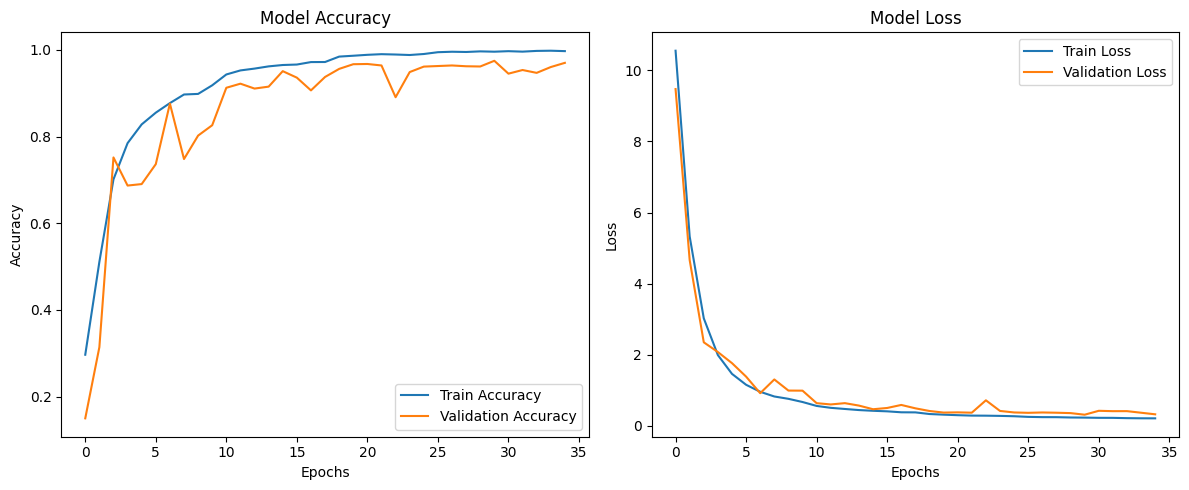

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Global Average Pooling for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout for regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_stronger_cnn_model(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,949,447 (7.44 MB)

 Trainable params: 1,947,527 (7.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 72s 172ms/step - accuracy: 0.3417 - loss: 14.6448 - val_accuracy: 0.1497 - val_loss: 16.6580 - learning_rate: 1.0000e-04
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.6987 - loss: 8.9553 - val_accuracy: 0.1500 - val_loss: 20.8336 - learning_rate: 1.0000e-04
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.8109 - loss: 5.9012 - val_accuracy: 0.3037 - val_loss: 9.7294 - learning_rate: 1.0000e-04
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.8668 - loss: 4.0529 - val_accuracy: 0.3830 - val_loss: 6.2952 - learning_rate: 1.0000e-04
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.8946 - loss: 2.8832 - val_accuracy: 0.7996 - val_loss: 2.5860 - learning_rate: 1.0000e-04
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.9135 - loss: 2.1245 - val_accuracy: 0.2742 - val_loss: 4.9074 - learning_rate: 1.0000e-04
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 56ms

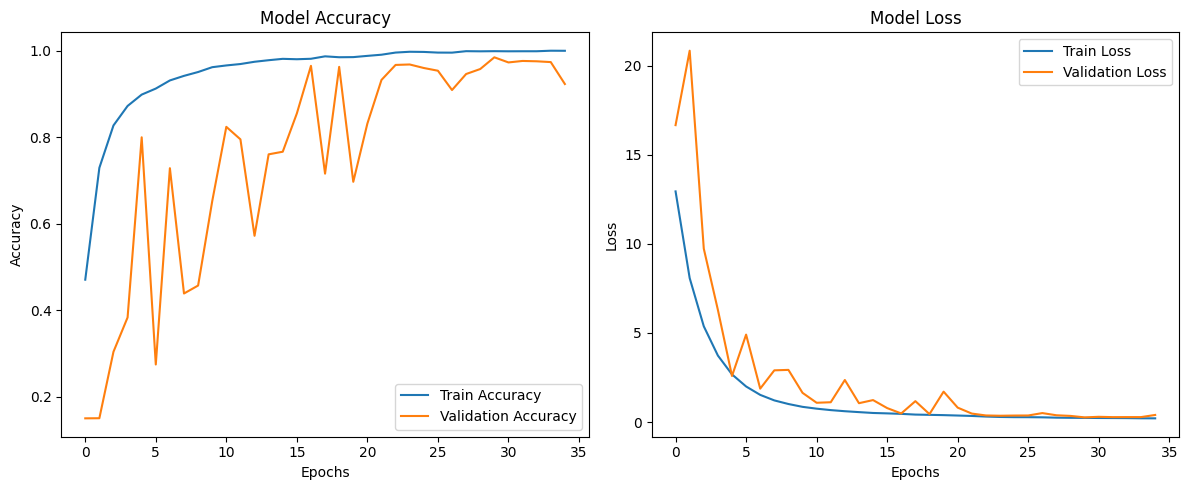

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


119/119 - 1s - 8ms/step - accuracy: 0.9824 - loss: 0.2705
Test Loss: 0.2705
Test Accuracy: 0.9824
Final Accuracy of the model: 98.24%
119/119 - 4s - 34ms/step
Sample Predictions:
True Labels: [1 6 0 2 0 5 1 6 1 4]
Predicted Labels: [1 6 0 2 0 5 1 6 1 4]


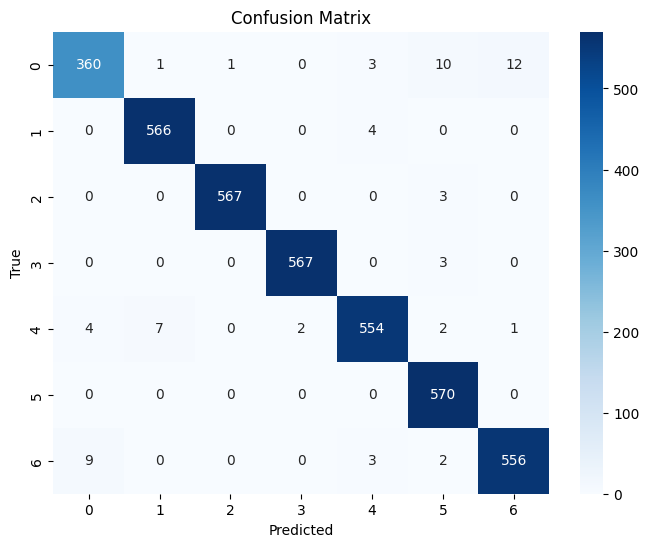

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    Dense,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2


In [ ]:
def build_efficientnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Convert 1-channel Mel spectrogram → 3 channels
    x = Conv2D(
        filters=3,
        kernel_size=(3, 3),
        padding="same",
        activation="linear",
        name="channel_adapter"
    )(inputs)

    # Load EfficientNet backbone
    base_model = EfficientNetB0(
        include_top=False,
        weights="imagenet",
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Freeze backbone initially
    base_model.trainable = False

    # Forward pass
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)

    # Classification head
    x = Dense(512, activation="relu", kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)

    x = Dense(256, activation="relu", kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model


In [ ]:
input_shape = (256, 256, 1)
num_classes = 7

model = build_efficientnet_model(input_shape, num_classes)

model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ channel_adapter (Conv2D)        │ (None, 256, 256, 3)    │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,843,720 (18.48 MB)

 Trainable params: 791,589 (3.02 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 139s 297ms/step - accuracy: 0.1483 - loss: 2.2395 - val_accuracy: 0.1502 - val_loss: 2.0508 - learning_rate: 1.0000e-04
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1493 - loss: 2.1155 - val_accuracy: 0.1495 - val_loss: 2.0495 - learning_rate: 1.0000e-04
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1437 - loss: 2.0859 - val_accuracy: 0.1636 - val_loss: 2.0474 - learning_rate: 1.0000e-04
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1497 - loss: 2.0761 - val_accuracy: 0.1497 - val_loss: 2.0476 - learning_rate: 1.0000e-04
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1473 - loss: 2.0729 - val_accuracy: 0.1489 - val_loss: 2.0467 - learning_rate: 1.0000e-04
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1491 - loss: 2.0625 - val_accuracy: 0.1531 - val_loss: 2.0467 - learning_rate: 1.0000e-04
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/s

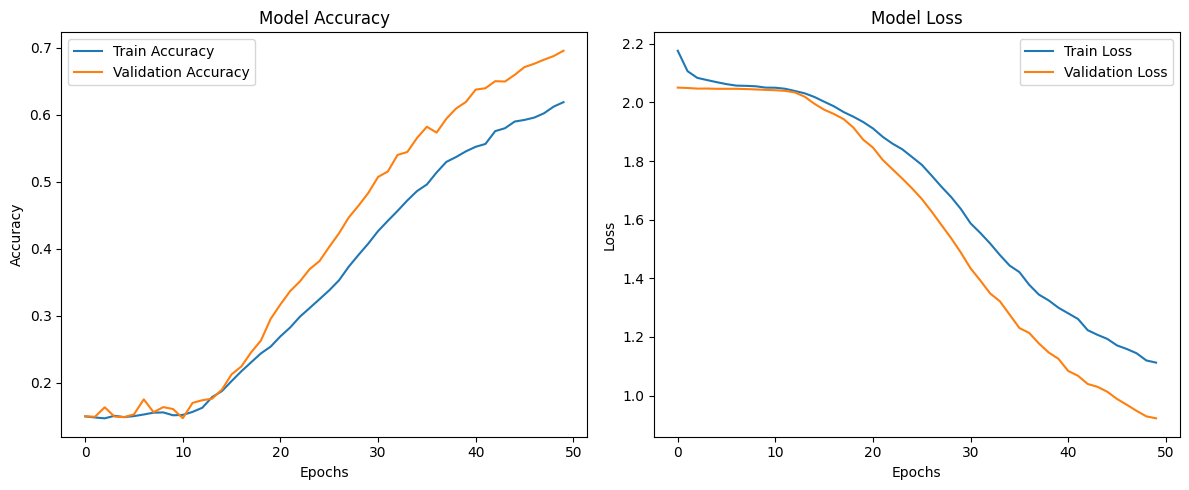

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


119/119 - 1s - 12ms/step - accuracy: 0.6921 - loss: 0.9392
Test Loss: 0.9392
Test Accuracy: 0.6921
Final Accuracy of the model: 69.21%
119/119 - 16s - 133ms/step
Sample Predictions:
True Labels: [1 6 0 2 0 5 1 6 1 4]
Predicted Labels: [1 6 6 2 5 5 6 6 1 4]


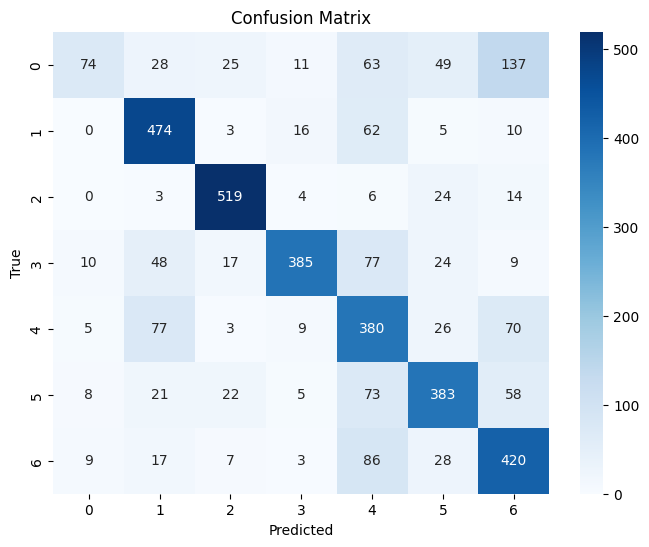

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()